## 📌 Dataset Overview - Hospital Infections

This dataset contains information about hospital-acquired infections in various hospitals across the United States. The data is provided in raw form, reflecting different infection metrics, hospital information, and performance comparisons to national benchmarks.

### 📊 Basic Information:
- **Number of Rows:** 222,864  
- **Number of Columns:** 16  
- **Source:** Kaggle  
- **Domain:** Healthcare / Public Health  
- **Problem Type:** Real-world health problem related to infection control

In [1]:
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt   
import seaborn as sns             
import plotly.express as px

# loading data :

In [3]:
df=pd.read_csv('Hospital_infections.Csv.csv')

In [4]:
df.head()

Provider ID                  Hospital Name                     Address  \
0        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
3        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
4        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   

   City State  ZIP Code County Name  Phone Number  \
0  BOAZ    AL     35957    MARSHALL    2565938310   
1  BOAZ    AL     35957    MARSHALL    2565938310   
2  BOAZ    AL     35957    MARSHALL    2565938310   
3  BOAZ    AL     35957    MARSHALL    2565938310   
4  BOAZ    AL     35957    MARSHALL    2565938310   

                     Measure Name       Measure ID  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER   
2    CLABSI: Number of Procedures  HAI_1_DOPC_DAYS   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR   

                   Compared to National  Score Footnote Measure Start Date  \
0  No Different than National Benchmark  0.165      NaN         01/01/2015   
1  No Different than National Benchmark  3.249      NaN         01/01/2015   
2  No Different than National Benchmark   1485      NaN         01/01/2015   
3  No Different than National Benchmark  2.034      NaN         01/01/2015   
4  No Different than National Benchmark      2      NaN         01/01/2015   

  Measure End Date                                      Location  
0       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
1       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
2       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
3       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n  
4       06/30/2015  2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n

# Data understanding :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [7]:
df.shape

(222864, 16)

In [8]:
list(df.columns)

['Provider ID',
 'Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number',
 'Measure Name',
 'Measure ID',
 'Compared to National',
 'Score',
 'Footnote',
 'Measure Start Date',
 'Measure End Date',
 'Location']

In [9]:
df.isnull().sum()

Provider ID                 0
Hospital Name               0
Address                     0
City                        0
State                       0
ZIP Code                    0
County Name               624
Phone Number                0
Measure Name                0
Measure ID                  0
Compared to National        0
Score                       0
Footnote                81180
Measure Start Date          0
Measure End Date            0
Location                    0
dtype: int64

In [10]:
#the percentage of null values
df.isnull().mean() * 100         

Provider ID              0.000000
Hospital Name            0.000000
Address                  0.000000
City                     0.000000
State                    0.000000
ZIP Code                 0.000000
County Name              0.279991
Phone Number             0.000000
Measure Name             0.000000
Measure ID               0.000000
Compared to National     0.000000
Score                    0.000000
Footnote                36.425802
Measure Start Date       0.000000
Measure End Date         0.000000
Location                 0.000000
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
# Display the top 5 most frequent values in each object (text) column
for col in df.select_dtypes(include='object').columns:
    print(f"\n Top values in column: {col}")
    print(df[col].value_counts(dropna=False).head(5))


 Top values in column: Hospital Name
Hospital Name
MEMORIAL HOSPITAL              624
ST JOSEPH HOSPITAL             384
GOOD SAMARITAN HOSPITAL        336
MERCY HOSPITAL                 288
COMMUNITY MEMORIAL HOSPITAL    288
Name: count, dtype: int64

 Top values in column: Address
Address
100 HOSPITAL DRIVE          336
100 MEDICAL CENTER DRIVE    192
ONE HOSPITAL DRIVE          192
200 HOSPITAL DRIVE          192
1 HOSPITAL DRIVE             96
Name: count, dtype: int64

 Top values in column: City
City
CHICAGO         1248
HOUSTON         1056
PHILADELPHIA     864
LOS ANGELES      864
DALLAS           816
Name: count, dtype: int64

 Top values in column: State
State
TX    17568
CA    15888
FL     8640
IL     8496
NY     8208
Name: count, dtype: int64

 Top values in column: County Name
County Name
LOS ANGELES    3792
COOK           2304
JEFFERSON      2160
WASHINGTON     2112
MONTGOMERY     1920
Name: count, dtype: int64

 Top values in column: Measure Name
Measure Name
CLABSI: Lo

In [13]:
df.describe()

Provider ID       ZIP Code  Phone Number
count  222864.000000  222864.000000  2.228640e+05
mean   266354.500754   53726.338574  5.844578e+09
std    155621.920262   26905.006858  2.332326e+09
min     10001.000000     603.000000  9.369338e+08
25%    140177.000000   32806.000000  3.867199e+09
50%    251336.000000   55009.000000  6.038823e+09
75%    390138.000000   75701.000000  7.877276e+09
max    670107.000000   99929.000000  9.898943e+09

In [14]:
print(df['Measure Name'].unique())


['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [15]:
import pandas as pd

mapping = {
    # CLABSI
    'clabsi: lower confidence limit': "Lower bound of infection rate (percentage)",
    'clabsi: upper confidence limit': "Upper bound of infection rate (percentage)",
    'clabsi: number of procedures': "Number of procedures done (sample size)",
    'clabsi: predicted cases': "Expected number of infection cases",
    'clabsi: observed cases': "Actual observed number of infection cases",
    'central line-associated bloodstream infections (clabsi) in icus and select wards': "Description of infection type/location",
    'clabsi lower confidence limit': "Lower bound of infection rate (percentage)",
    'clabsi upper confidence limit': "Upper bound of infection rate (percentage)",
    'clabsi central line days': "Number of central line days (sample exposure time)",
    'clabsi predicted cases': "Expected number of infection cases",
    'clabsi observed cases': "Actual observed number of infection cases",
    'central line-associated blood stream infections (clabsi) in icus only': "Description of infection type/location",

    # CAUTI
    'cauti: lower confidence limit': "Lower bound of infection rate (percentage)",
    'cauti: upper confidence limit': "Upper bound of infection rate (percentage)",
    'cauti: number of procedures': "Number of procedures done (sample size)",
    'cauti: predicted cases': "Expected number of infection cases",
    'cauti: observed cases': "Actual observed number of infection cases",
    'catheter-associated urinary tract infections (cauti) in icus and select wards': "Description of infection type/location",
    'cauti lower confidence limit': "Lower bound of infection rate (percentage)",
    'cauti upper confidence limit': "Upper bound of infection rate (percentage)",
    'cauti urinary catheter days': "Number of urinary catheter days (sample exposure time)",
    'cauti predicted cases': "Expected number of infection cases",
    'cauti observed cases': "Actual observed number of infection cases",
    'catheter-associated urinary tract infections (cauti) in icus only': "Description of infection type/location",

    # SSI: colon
    'ssi: colon lower confidence limit': "Lower bound of infection rate (percentage)",
    'ssi: colon upper confidence limit': "Upper bound of infection rate (percentage)",
    'c.diff patient days': "Number of patient days (sample exposure time)",
    'ssi: colon, number of procedures': "Number of procedures done (sample size)",
    'ssi: colon predicted cases': "Expected number of infection cases",
    'ssi: colon observed cases': "Actual observed number of infection cases",
    'surgical site infection from colon surgery (ssi: colon)': "Description of infection type/location",

    # SSI: abdominal
    'ssi: abdominal lower confidence limit': "Lower bound of infection rate (percentage)",
    'ssi: abdominal upper confidence limit': "Upper bound of infection rate (percentage)",
    'ssi: abdominal, number of procedures': "Number of procedures done (sample size)",
    'ssi: abdominal predicted cases': "Expected number of infection cases",
    'ssi: abdominal observed cases': "Actual observed number of infection cases",
    'surgical site infection from abdominal hysterectomy (ssi: hysterectomy)': "Description of infection type/location",

    # MRSA
    'mrsa lower confidence limit': "Lower bound of infection rate (percentage)",
    'mrsa upper confidence limit': "Upper bound of infection rate (percentage)",
    'mrsa patient days': "Number of patient days (sample exposure time)",
    'mrsa predicted cases': "Expected number of infection cases",
    'mrsa observed cases': "Actual observed number of infection cases",
    'methicillin-resistant staphylococcus aureus (mrsa) blood laboratory-identified events (bloodstream infections)': "Description of infection type/location",

    # C. diff
    'c.diff lower confidence limit': "Lower bound of infection rate (percentage)",
    'c.diff upper confidence limit': "Upper bound of infection rate (percentage)",
    'c.diff predicted cases': "Expected number of infection cases",
    'c.diff observed cases': "Actual observed number of infection cases",
    'clostridium difficile (c.diff.) laboratory-identified events (intestinal infections)': "Description of infection type/location",
}

mapping_df = pd.DataFrame(list(mapping.items()), columns=['Measure Name', 'Score Meaning'])
print(mapping_df)


                                         Measure Name  \
0                      clabsi: lower confidence limit   
1                      clabsi: upper confidence limit   
2                        clabsi: number of procedures   
3                             clabsi: predicted cases   
4                              clabsi: observed cases   
5   central line-associated bloodstream infections...   
6                       clabsi lower confidence limit   
7                       clabsi upper confidence limit   
8                            clabsi central line days   
9                              clabsi predicted cases   
10                              clabsi observed cases   
11  central line-associated blood stream infection...   
12                      cauti: lower confidence limit   
13                      cauti: upper confidence limit   
14                        cauti: number of procedures   
15                             cauti: predicted cases   
16                             

# Data cleaning :

In [17]:
df.drop(columns=['Footnote'], inplace=True)

In [18]:
df['County Name'] = df['County Name'].fillna('Unknown')

In [19]:
#Convert 'Score' column from object to numeric (float), forcing errors to NaN
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Score'].dtype

dtype('float64')

In [20]:
#Convert 'Measure Start Date' to datetime format
df['Measure Start Date'] = pd.to_datetime(df['Measure Start Date'], errors='coerce')
print(df['Measure Start Date'].dtype)

datetime64[ns]


In [21]:
#Convert 'Measure End Date' to datetime format
df['Measure End Date'] = pd.to_datetime(df['Measure End Date'], errors='coerce')
print(df['Measure End Date'].dtype)

datetime64[ns]


In [22]:
# Strip whitespace and lowercase all string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


# Feature Engineering :

In [42]:
df['Score Meaning'] = df['Measure Name'].map(mapping)

In [45]:
df.head()

Provider ID                  Hospital Name                     Address  \
0        10005  marshall medical center south  2505 u s highway 431 north   
1        10005  marshall medical center south  2505 u s highway 431 north   
2        10005  marshall medical center south  2505 u s highway 431 north   
3        10005  marshall medical center south  2505 u s highway 431 north   
4        10005  marshall medical center south  2505 u s highway 431 north   

   City State  ZIP Code County Name  Phone Number  \
0  boaz    al     35957    marshall    2565938310   
1  boaz    al     35957    marshall    2565938310   
2  boaz    al     35957    marshall    2565938310   
3  boaz    al     35957    marshall    2565938310   
4  boaz    al     35957    marshall    2565938310   

                     Measure Name       Measure ID  \
0  clabsi: lower confidence limit   hai_1_ci_lower   
1  clabsi: upper confidence limit   hai_1_ci_upper   
2    clabsi: number of procedures  hai_1_dopc_days   
3         clabsi: predicted cases  hai_1_eligcases   
4          clabsi: observed cases  hai_1_numerator   

                   Compared to National     Score Measure Start Date  \
0  no different than national benchmark     0.165         2015-01-01   
1  no different than national benchmark     3.249         2015-01-01   
2  no different than national benchmark  1485.000         2015-01-01   
3  no different than national benchmark     2.034         2015-01-01   
4  no different than national benchmark     2.000         2015-01-01   

  Measure End Date                                    Location  \
0       2015-06-30  2505 u s highway 431 north\nboaz, al 35957   
1       2015-06-30  2505 u s highway 431 north\nboaz, al 35957   
2       2015-06-30  2505 u s highway 431 north\nboaz, al 35957   
3       2015-06-30  2505 u s highway 431 north\nboaz, al 35957   
4       2015-06-30  2505 u s highway 431 north\nboaz, al 35957   

                                Score Meaning  
0  Lower bound of infection rate (percentage)  
1  Upper bound of infection rate (percentage)  
2     Number of procedures done (sample size)  
3          Expected number of infection cases  
4   Actual observed number of infection cases

In [47]:
df['Score'].describe()

count     98147.000000
mean       3333.035495
std       18142.087098
min           0.000000
25%           0.667000
50%           1.946000
75%          11.000000
max      692659.000000
Name: Score, dtype: float64

In [49]:
# Create Score Category
def categorize_score(x):
    if pd.isna(x):
        return 'Unknown'
    elif x < 0.667:
        return 'Low'
    elif x < 11:
        return 'Medium'
    else:
        return 'High'

df['Score_Category'] = df['Score'].apply(categorize_score)
df[['Score', 'Score_Category','Measure Name',  
    'Measure ID']].head(5)

Score Score_Category                    Measure Name       Measure ID
0     0.165            Low  clabsi: lower confidence limit   hai_1_ci_lower
1     3.249         Medium  clabsi: upper confidence limit   hai_1_ci_upper
2  1485.000           High    clabsi: number of procedures  hai_1_dopc_days
3     2.034         Medium         clabsi: predicted cases  hai_1_eligcases
4     2.000         Medium          clabsi: observed cases  hai_1_numerator

In [51]:
def Priority_classification (value):
    if value == 'High':
        return 'background-color: red; color: white;'
    elif value == 'Medium':
        return 'background-color: orange; color: black;'
    elif value == 'Low':
        return 'background-color: lightgreen; color: black;'

df.head(5).style.map(Priority_classification, subset=['Score_Category'])



# Univariate analysis :

for numerical

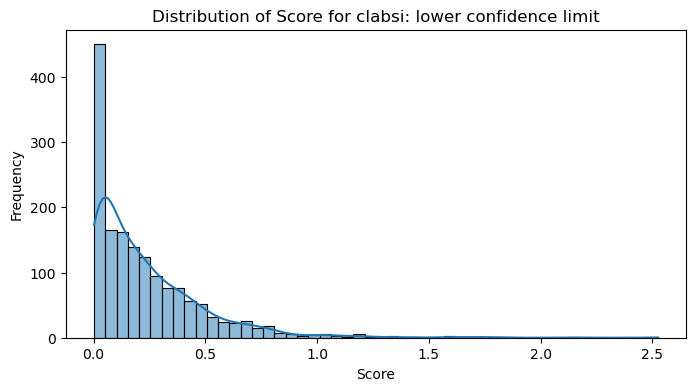

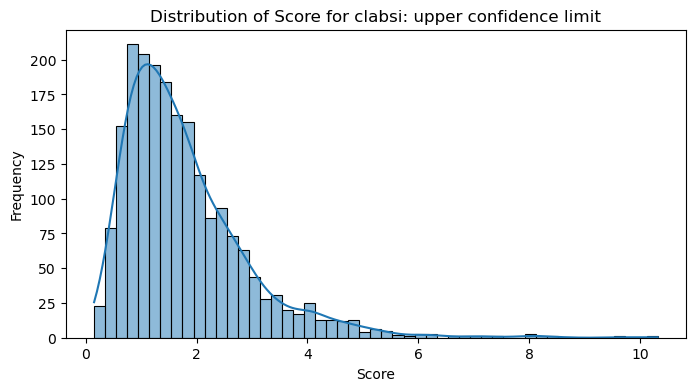

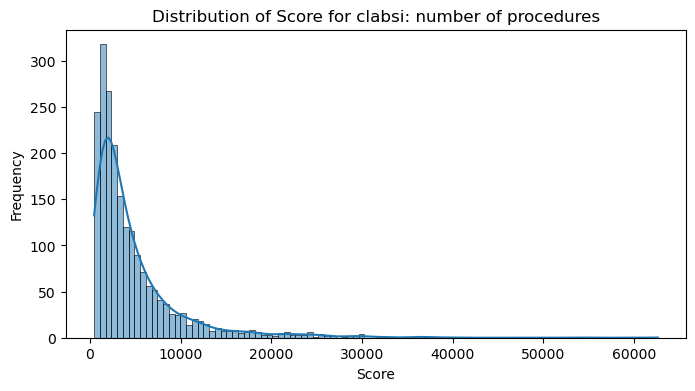

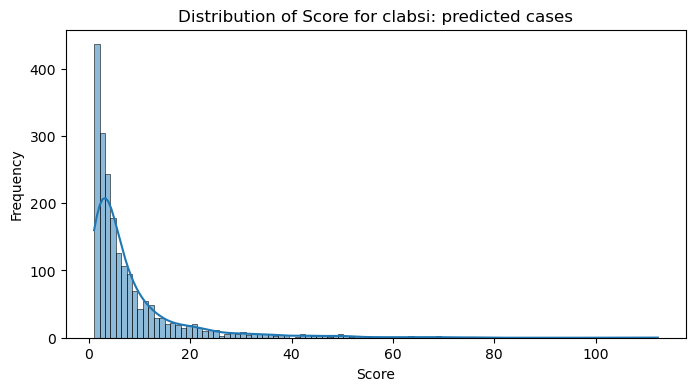

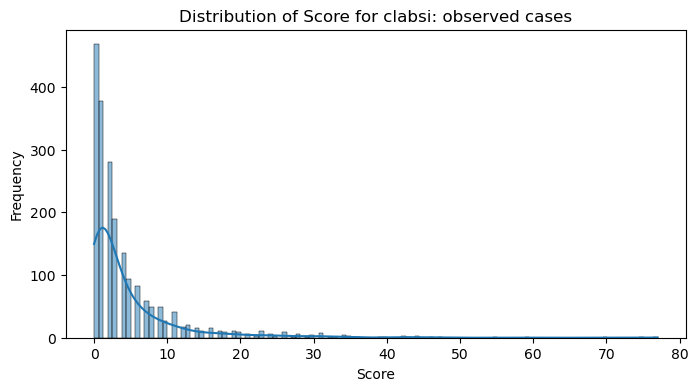

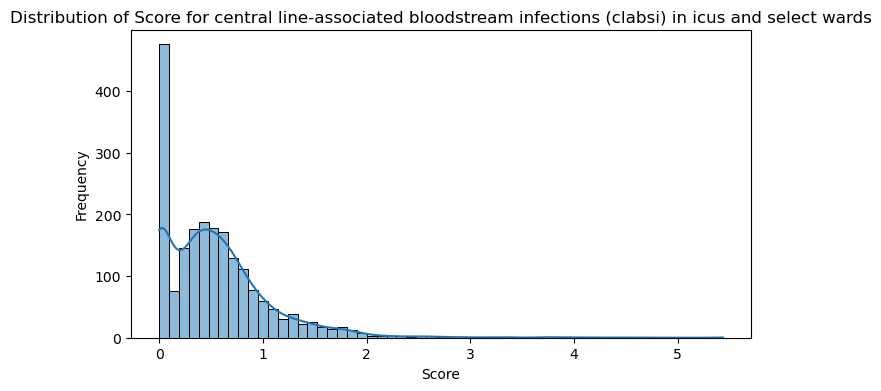

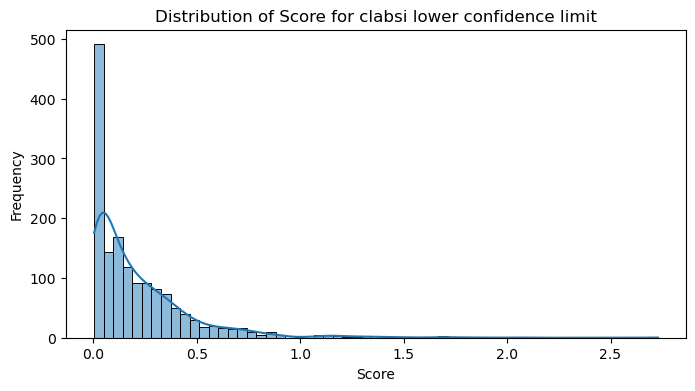

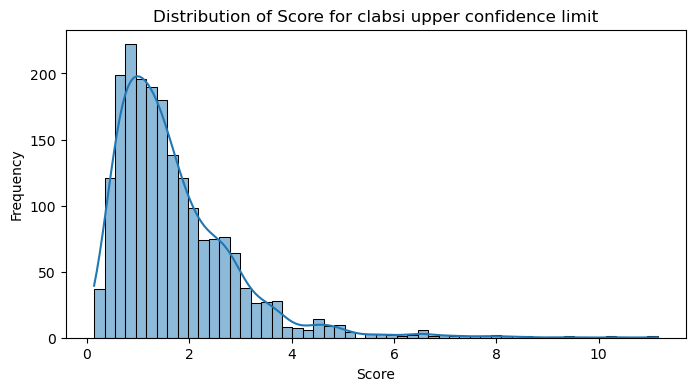

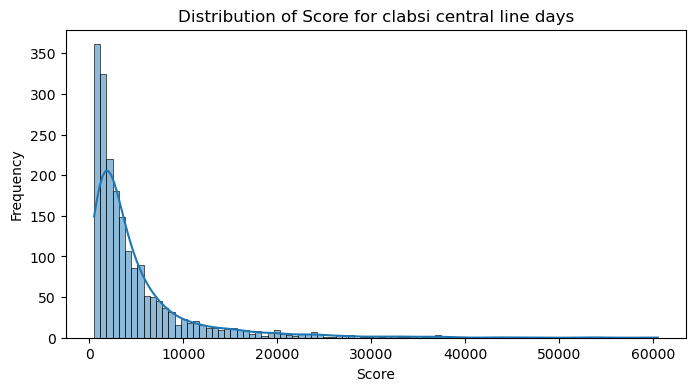

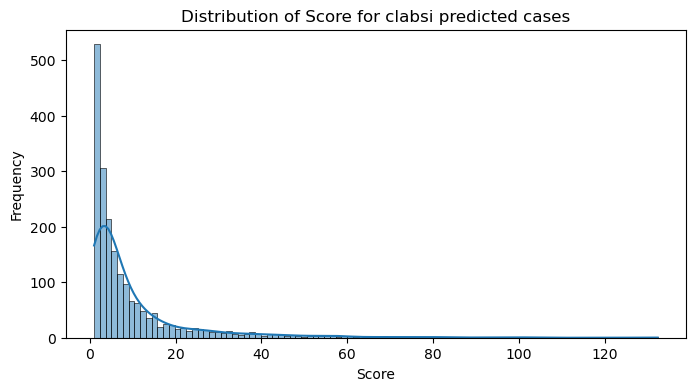

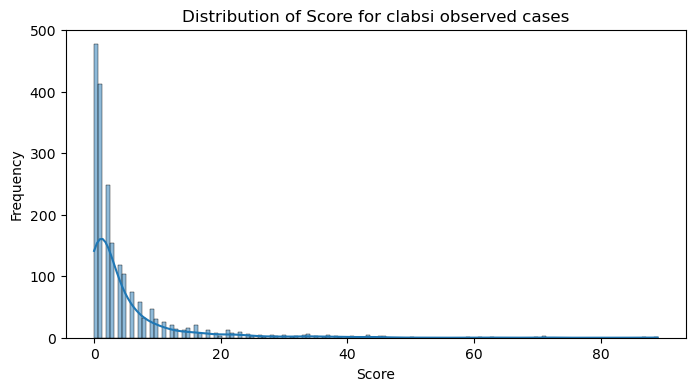

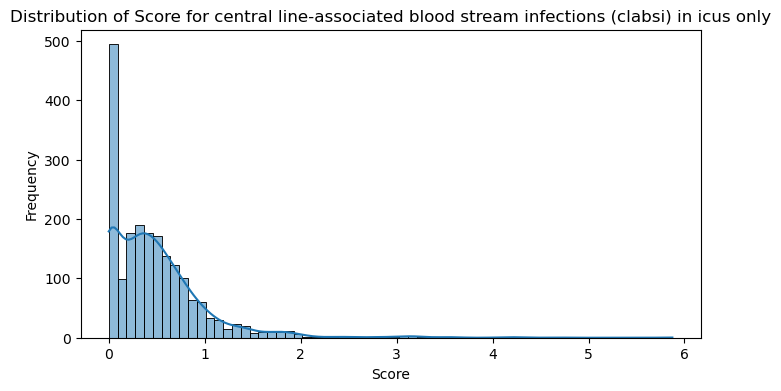

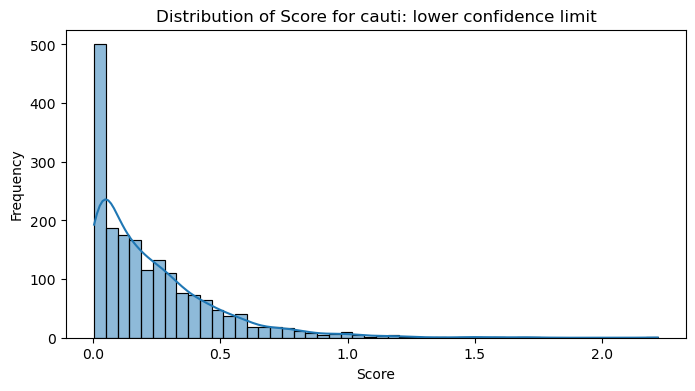

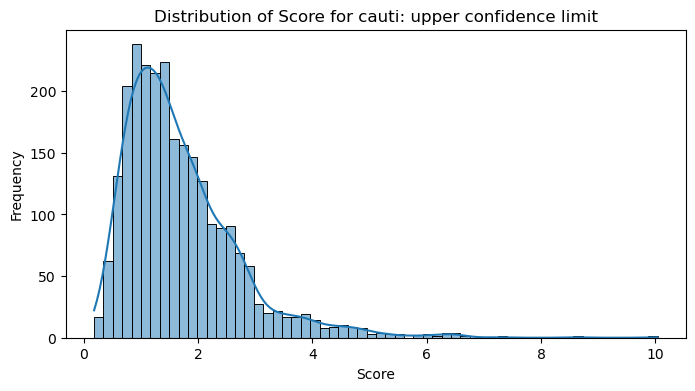

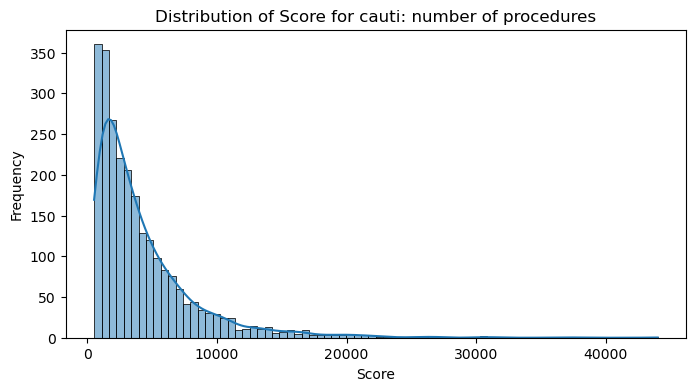

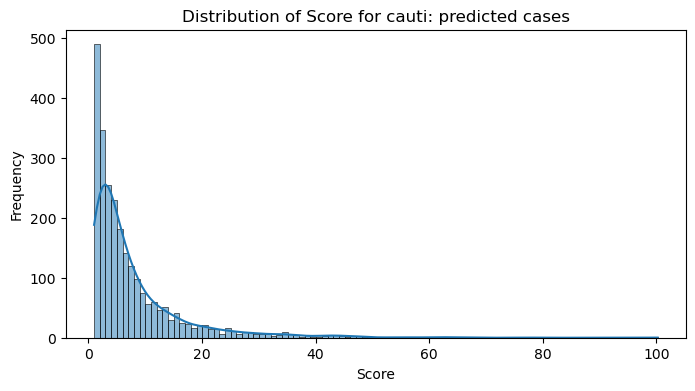

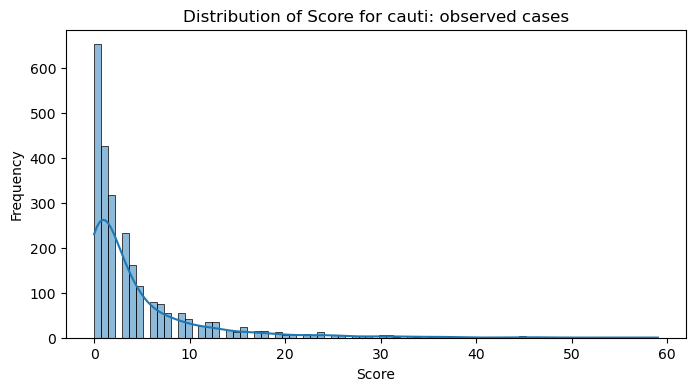

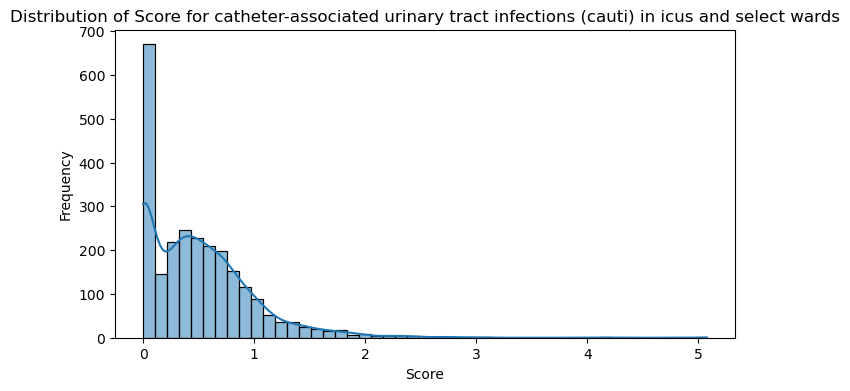

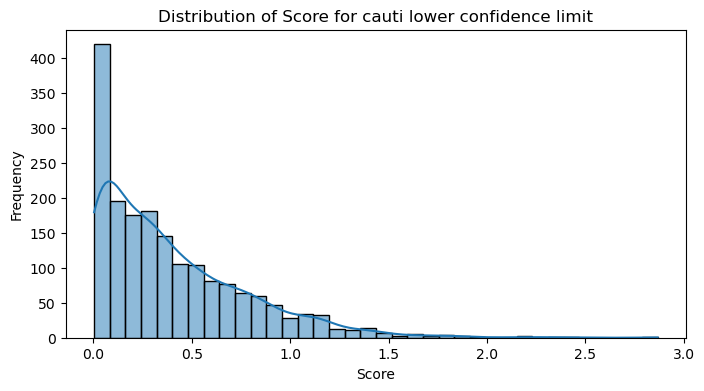

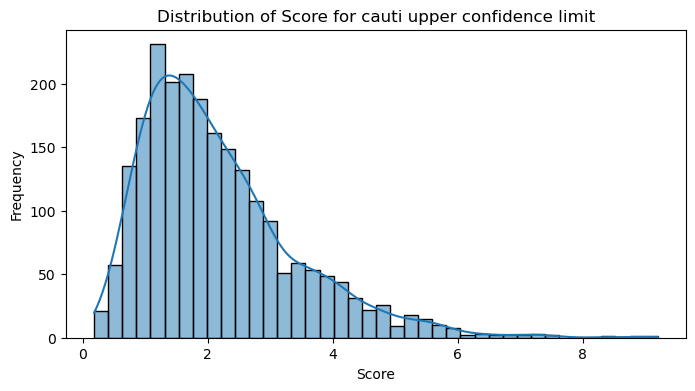

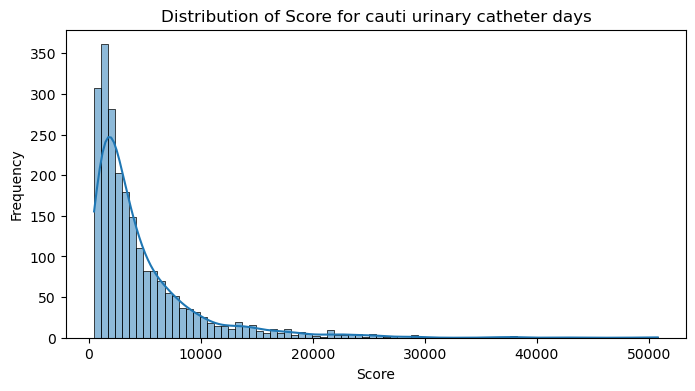

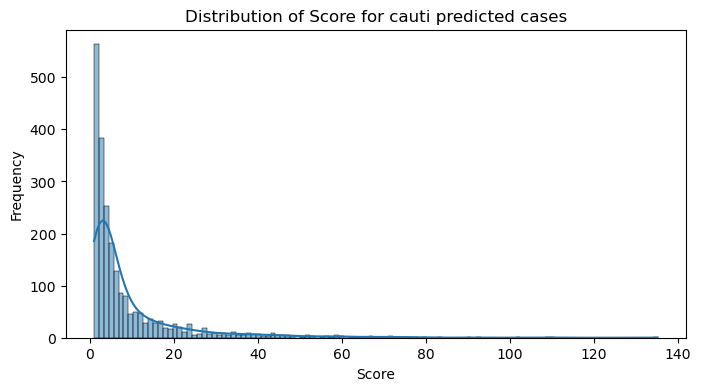

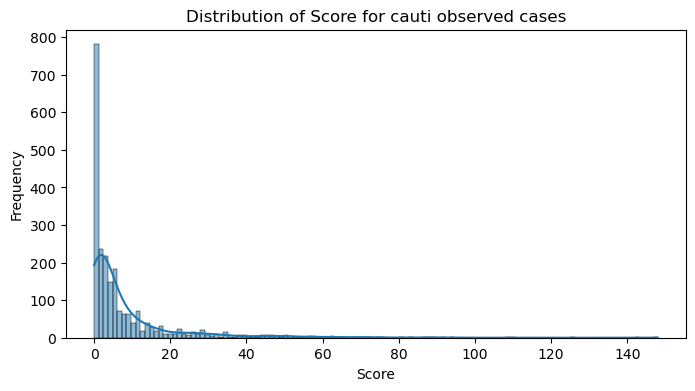

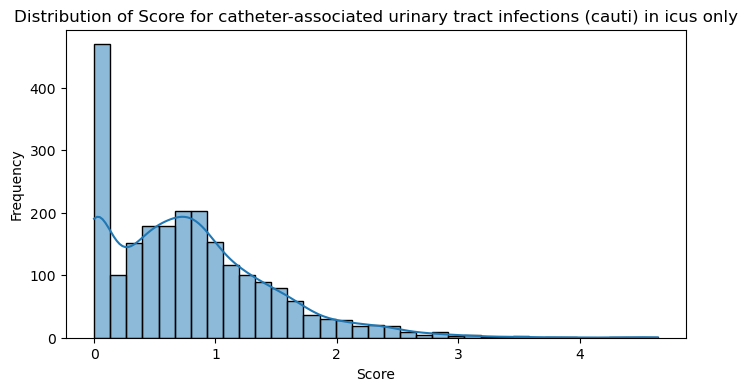

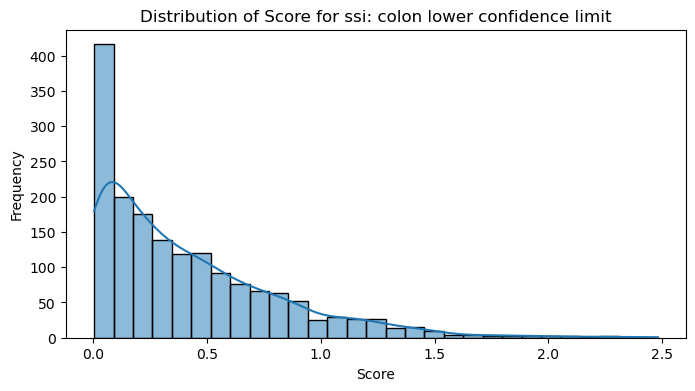

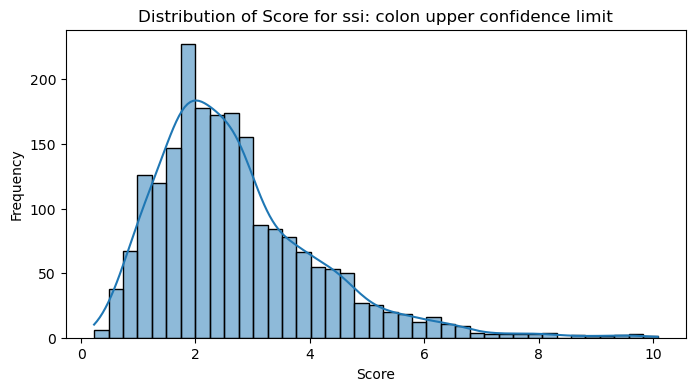

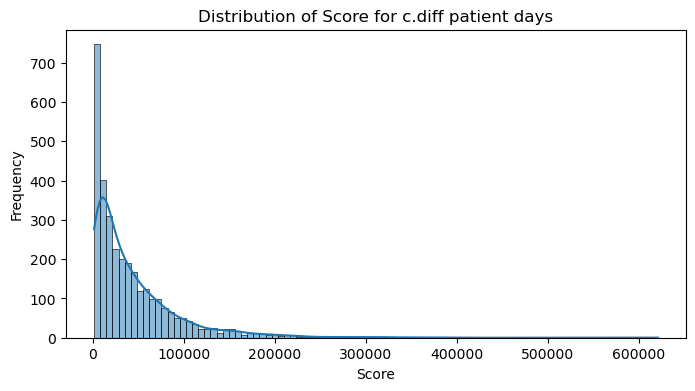

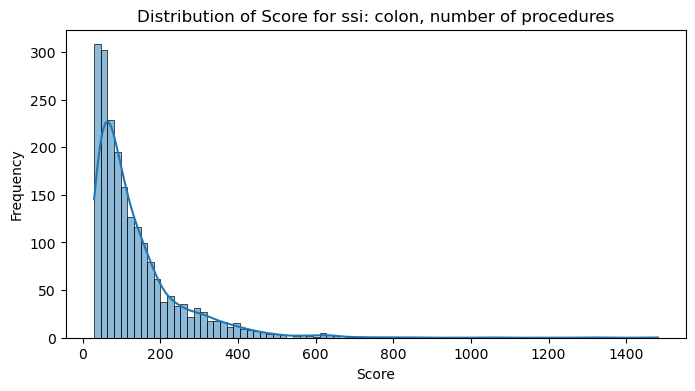

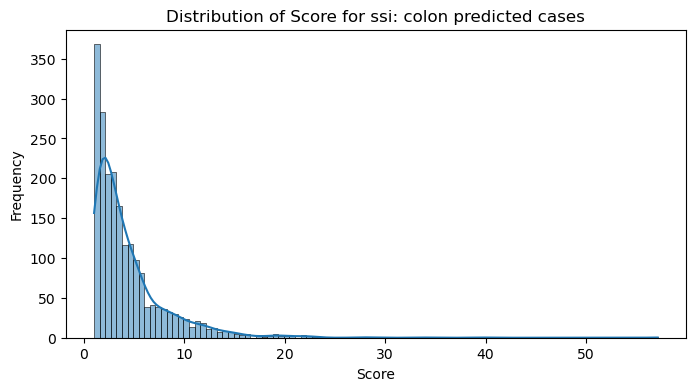

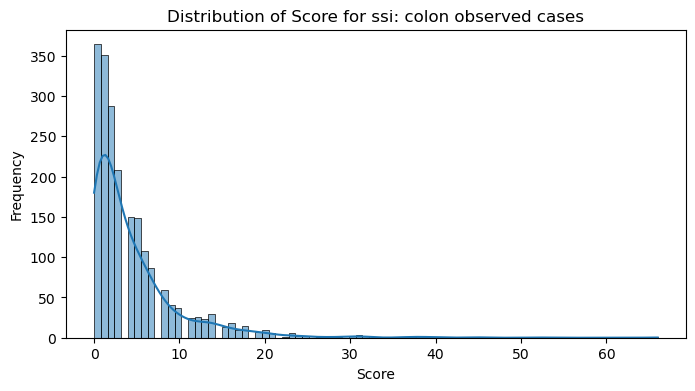

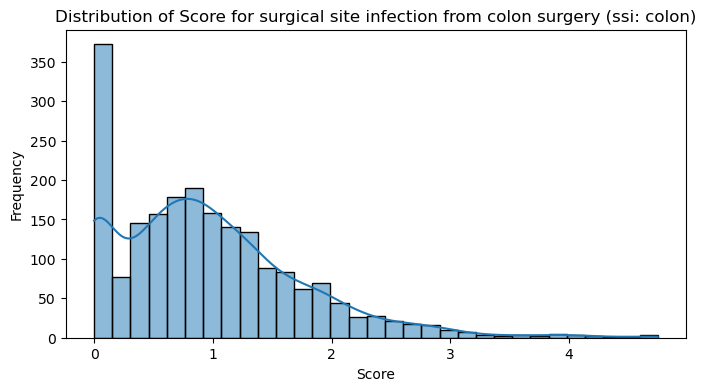

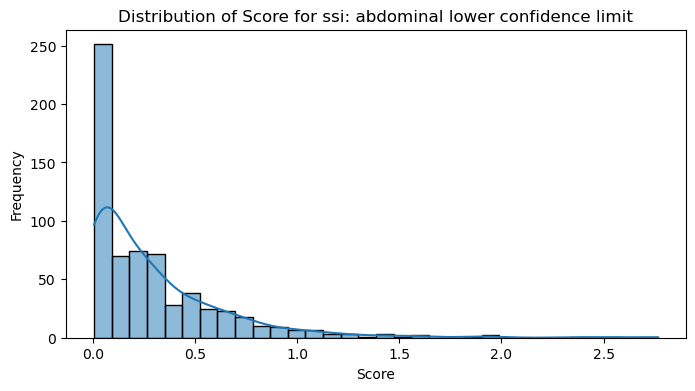

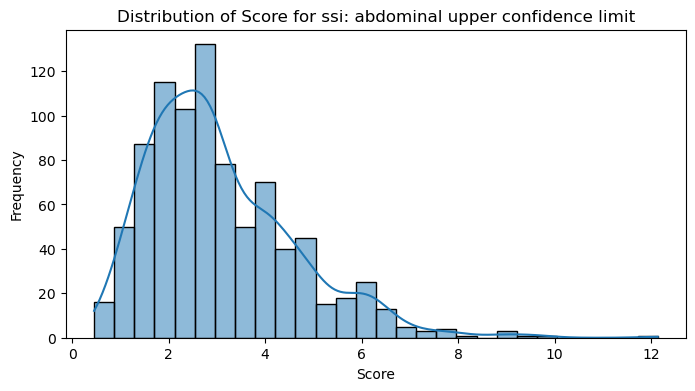

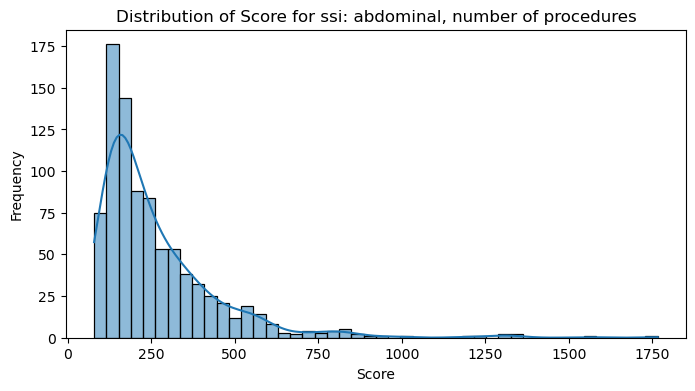

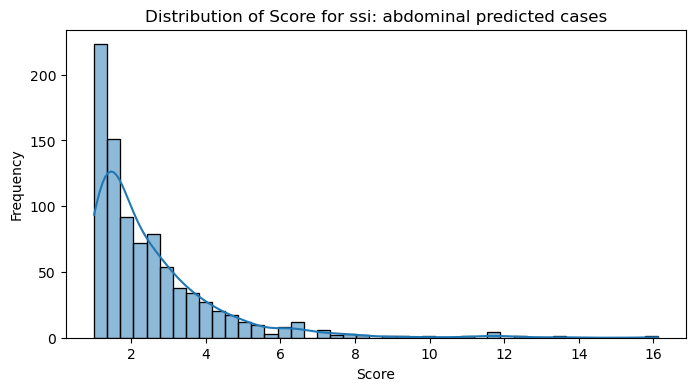

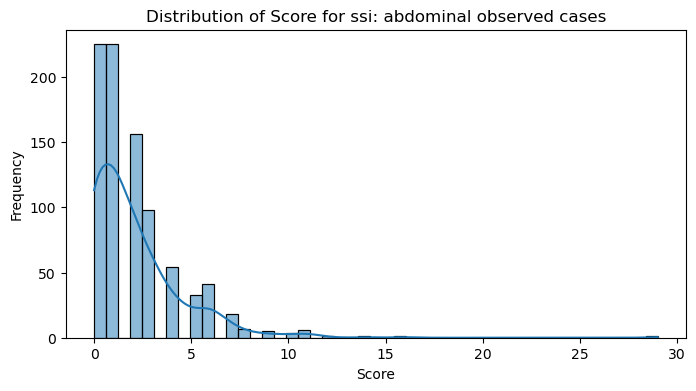

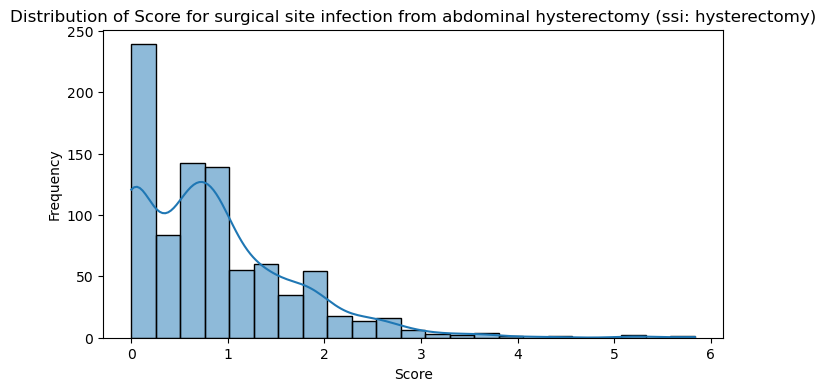

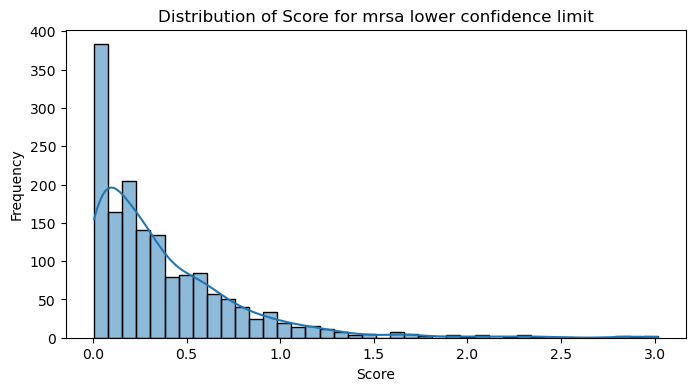

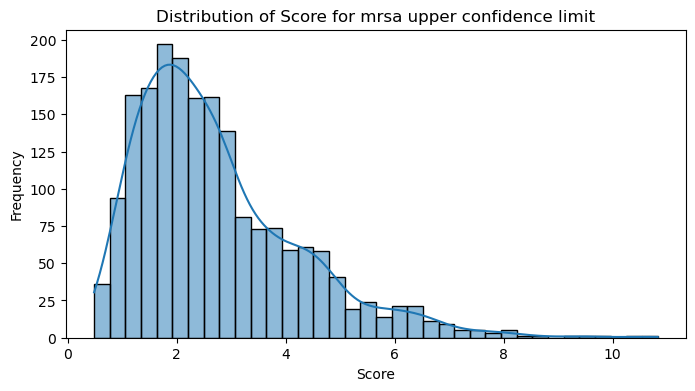

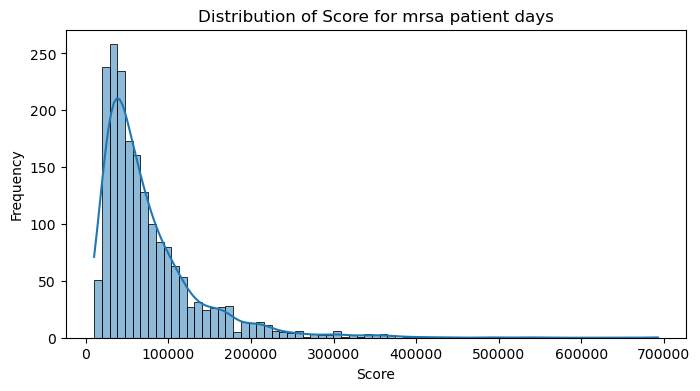

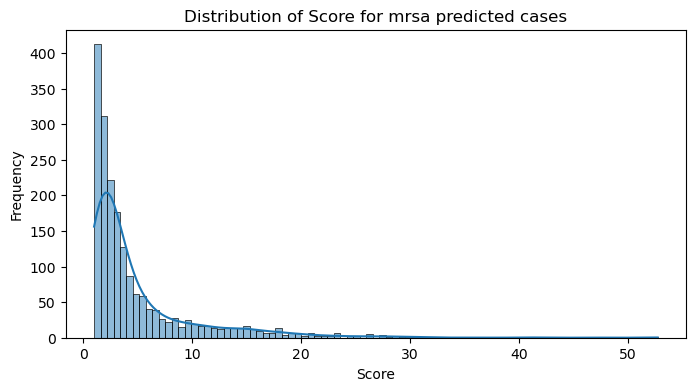

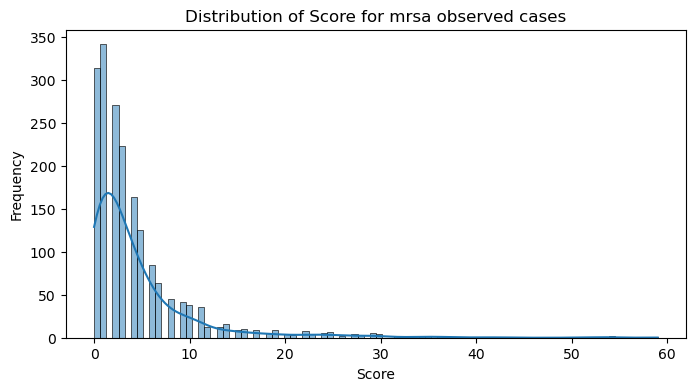

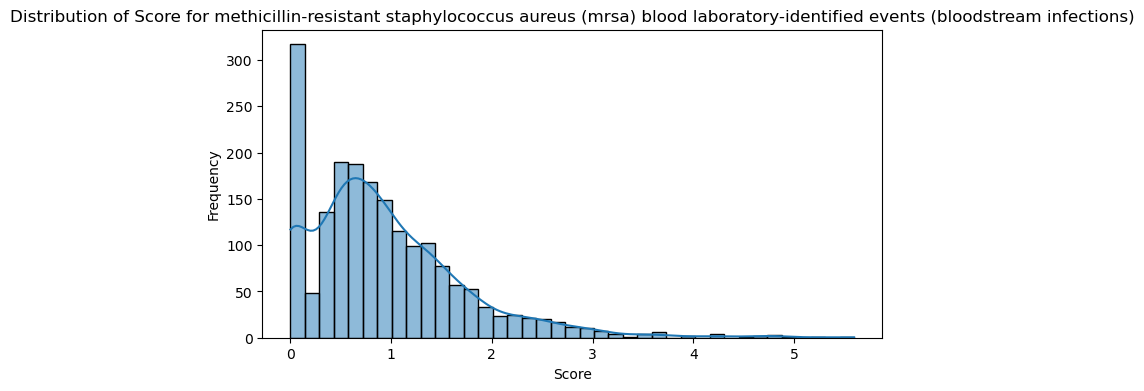

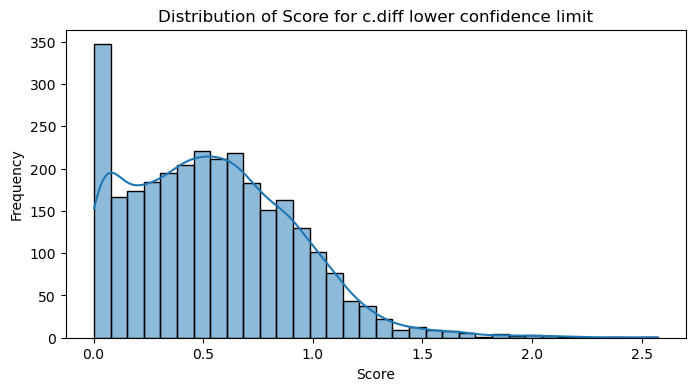

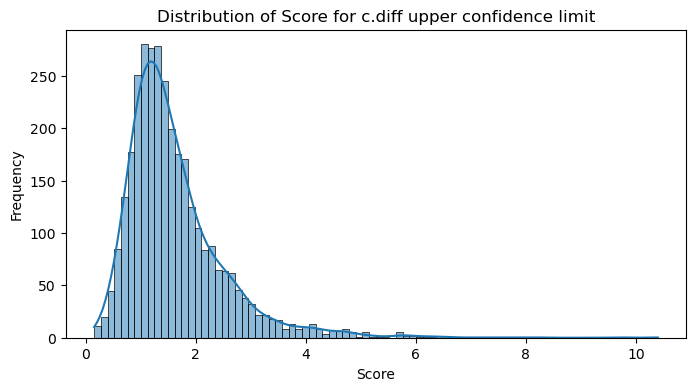

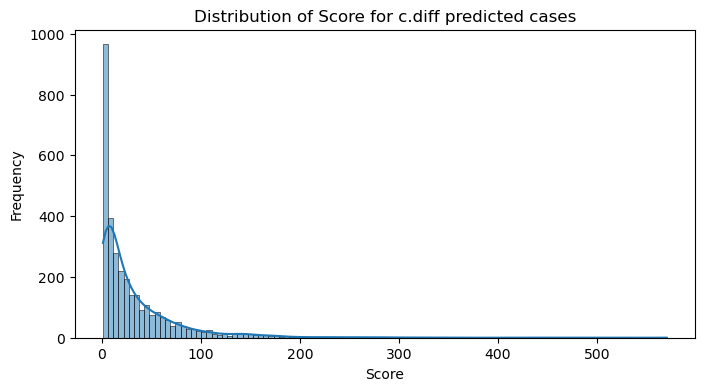

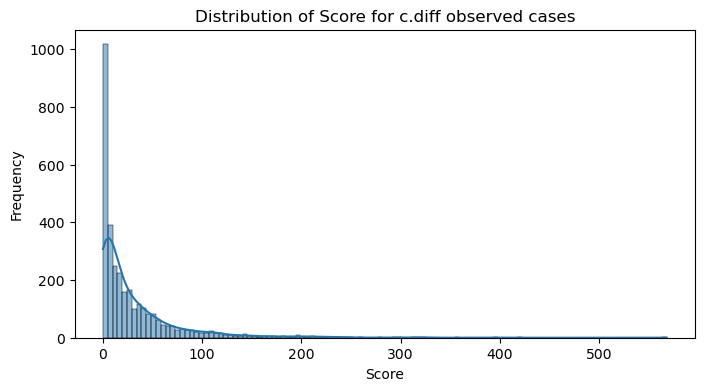

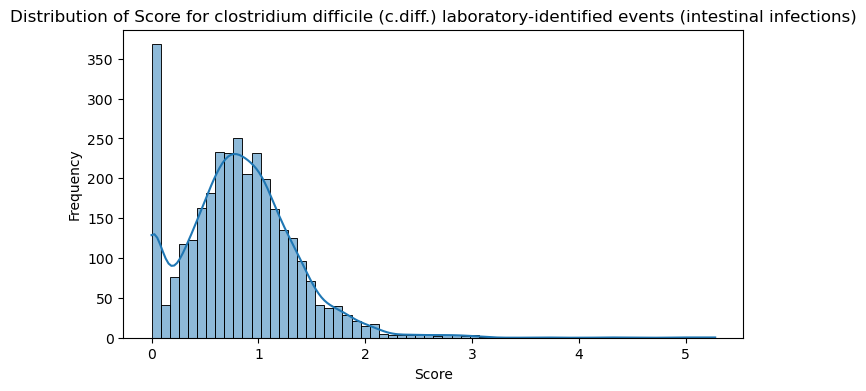

In [55]:
unique_measures = df['Measure Name'].unique()


for measure in unique_measures:
    subset = df[df['Measure Name'] == measure]['Score']
    plt.figure(figsize=(8,4))
    sns.histplot(subset, kde=True)
    plt.title(f'Distribution of Score for {measure}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


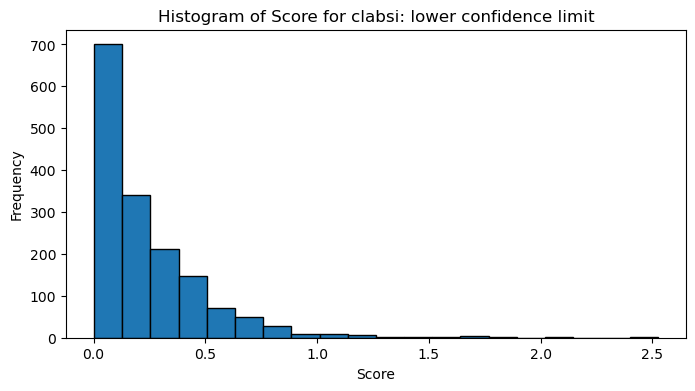

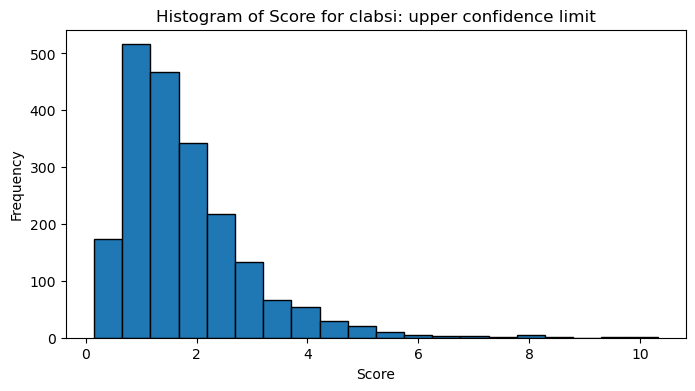

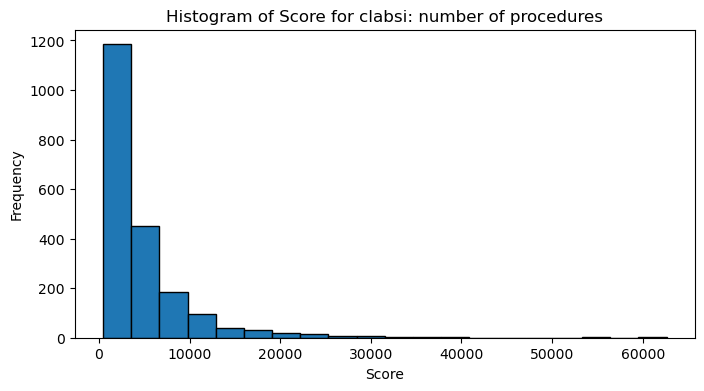

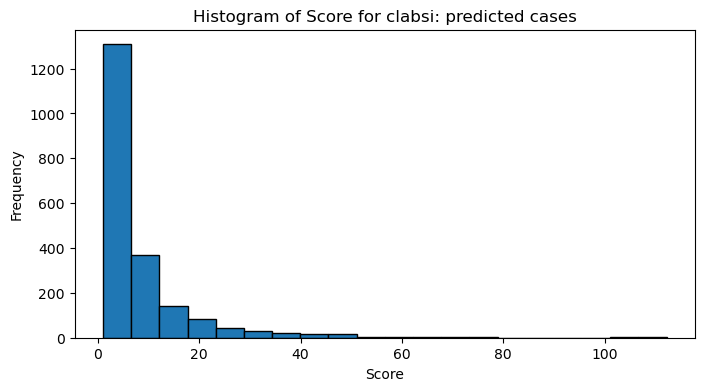

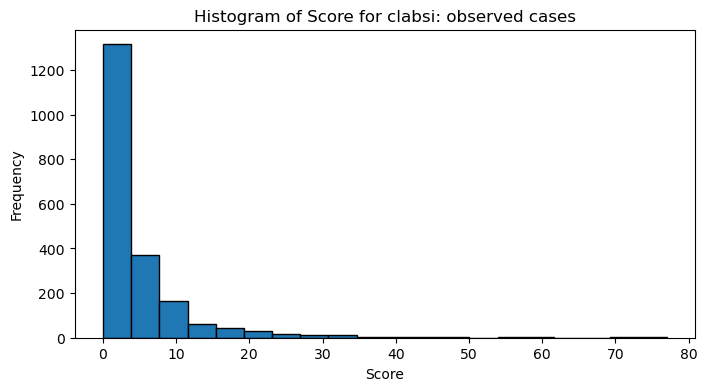

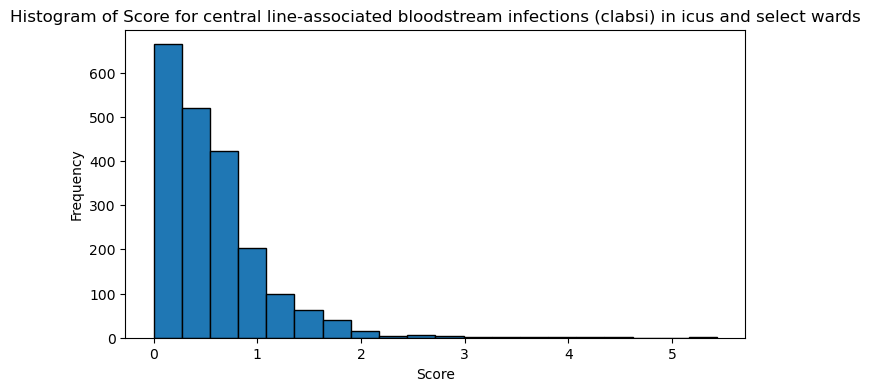

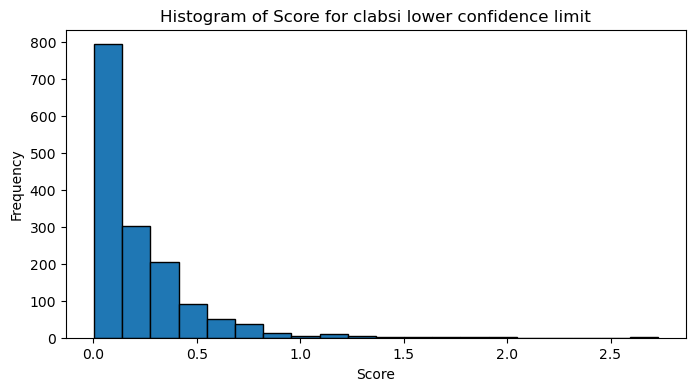

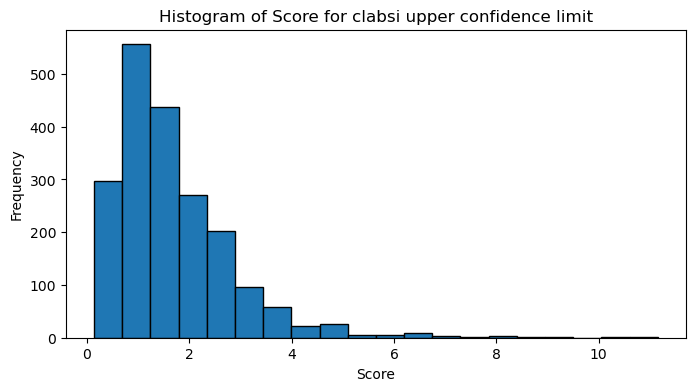

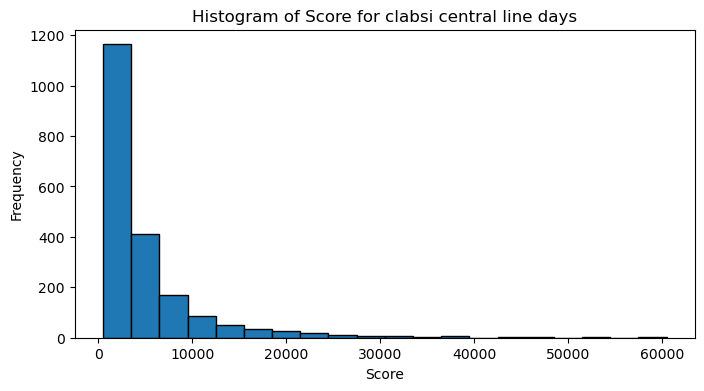

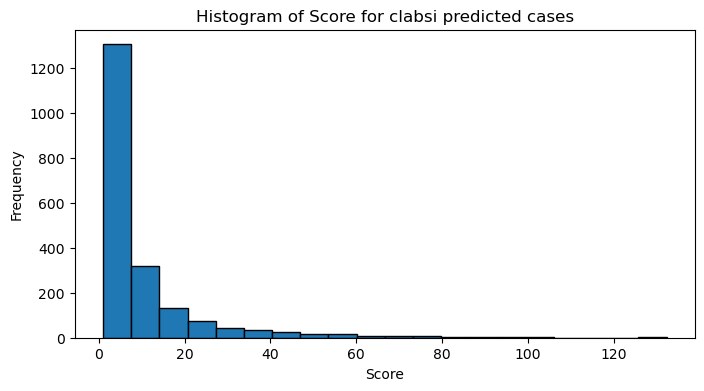

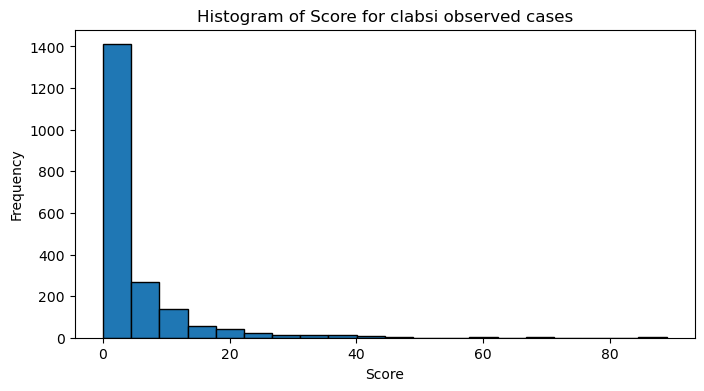

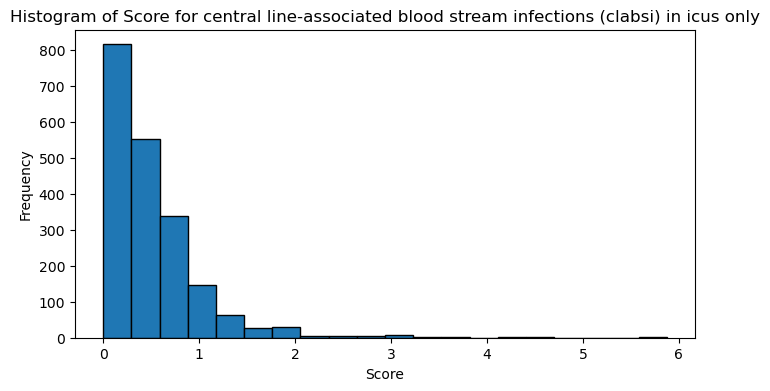

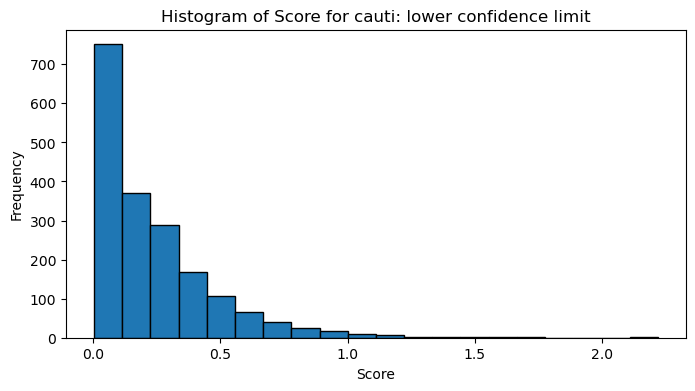

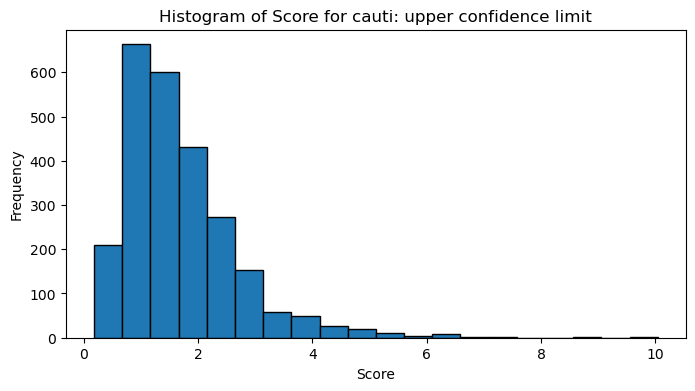

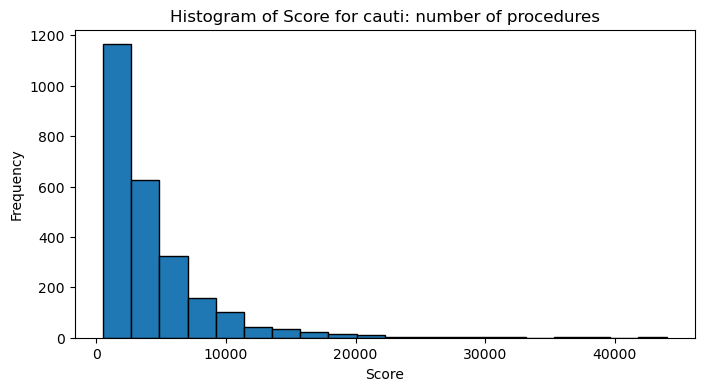

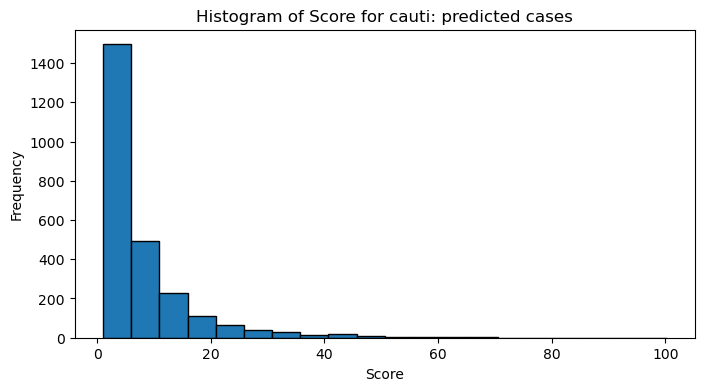

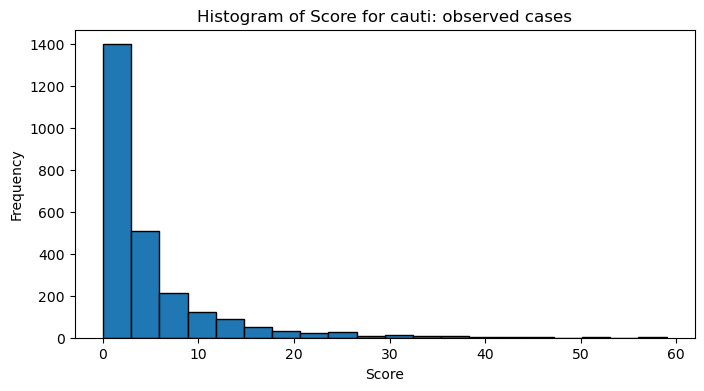

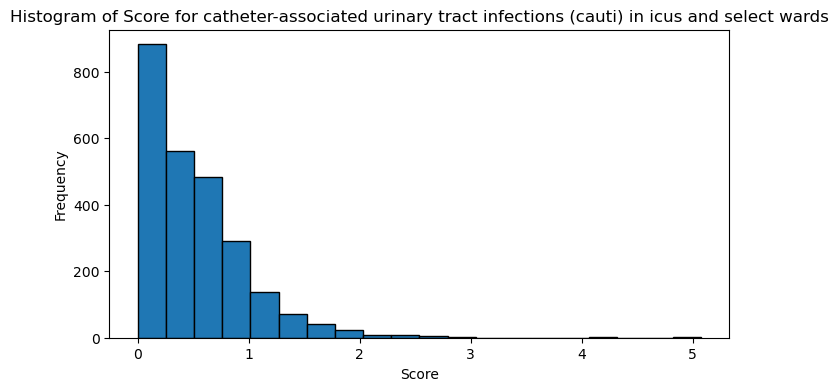

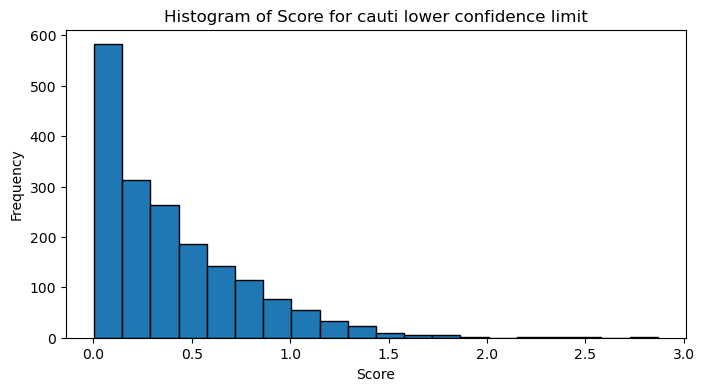

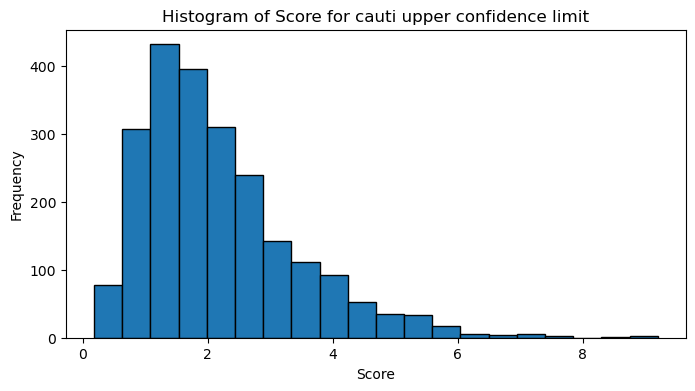

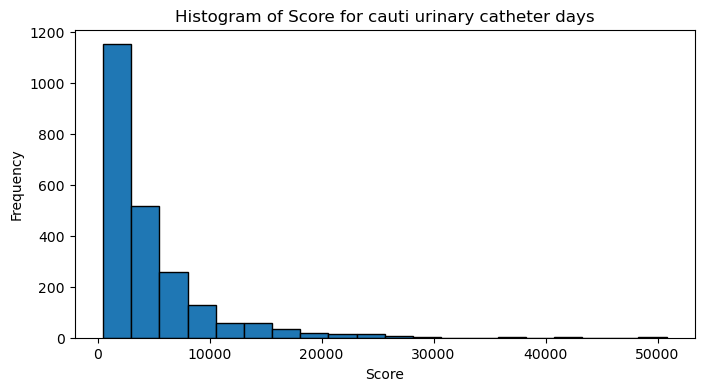

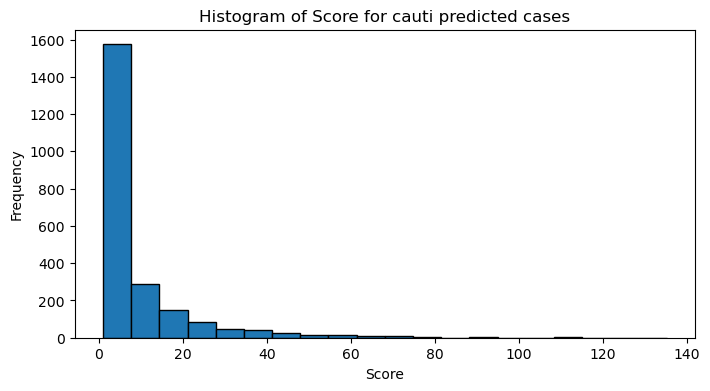

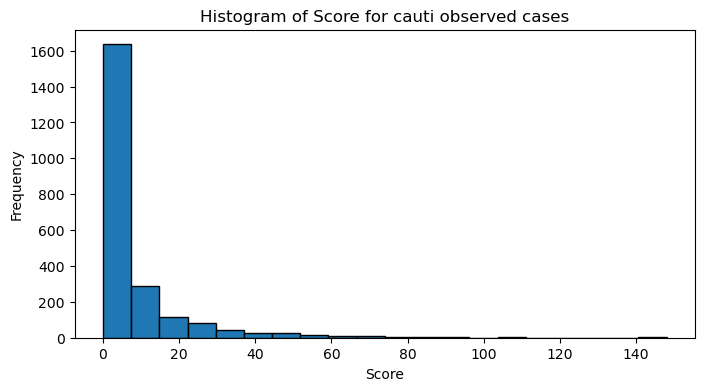

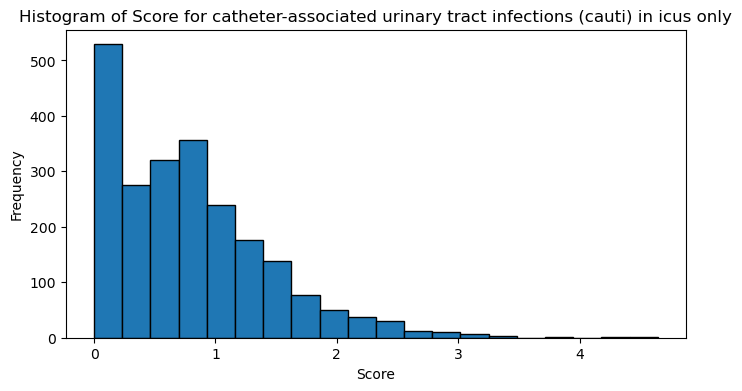

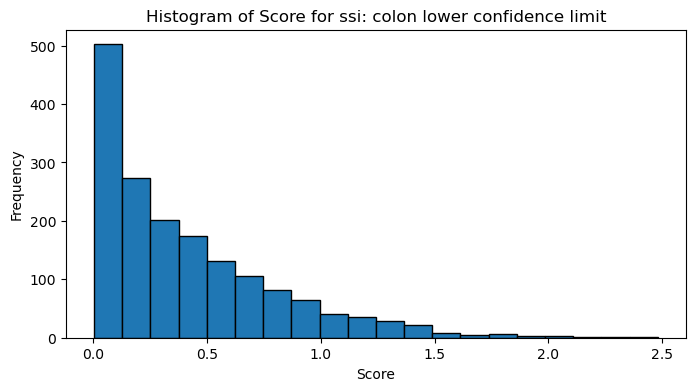

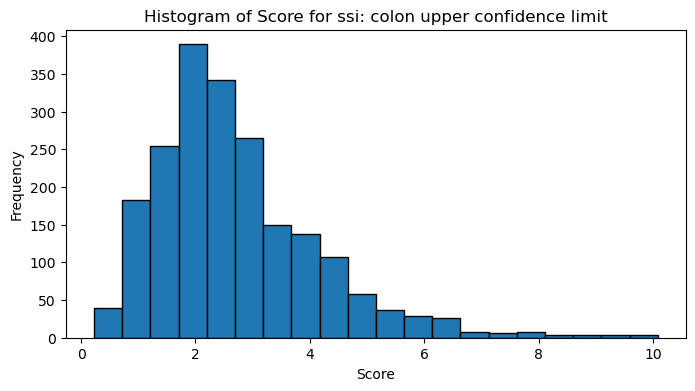

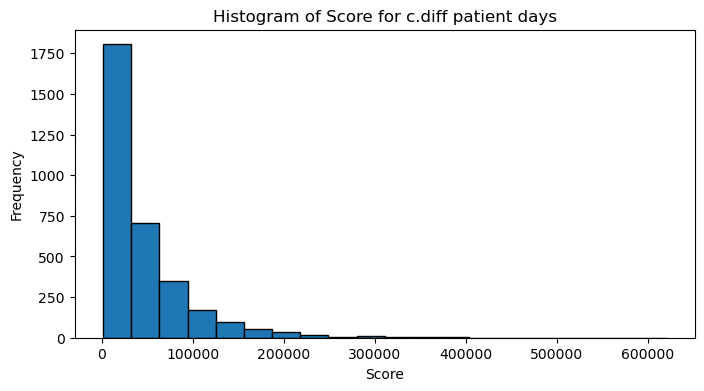

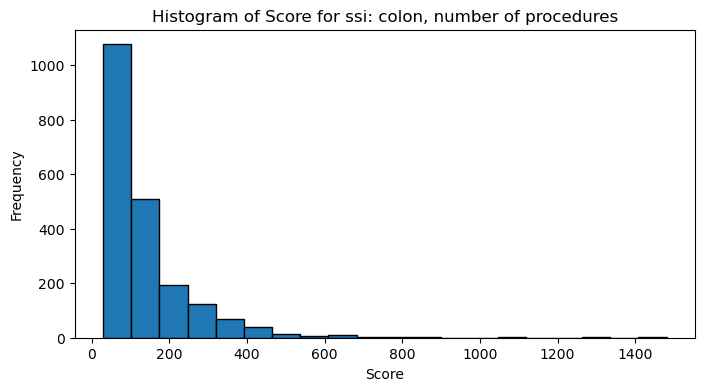

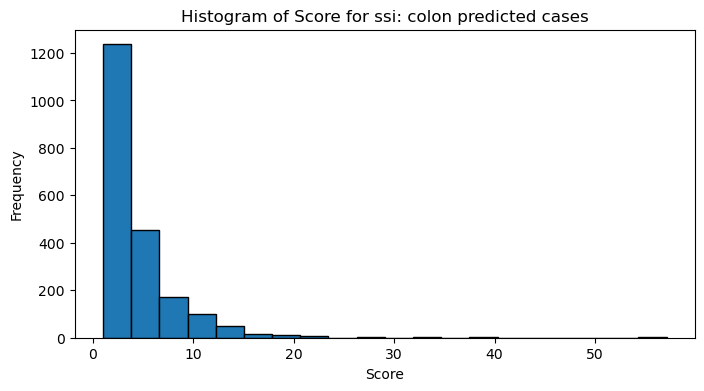

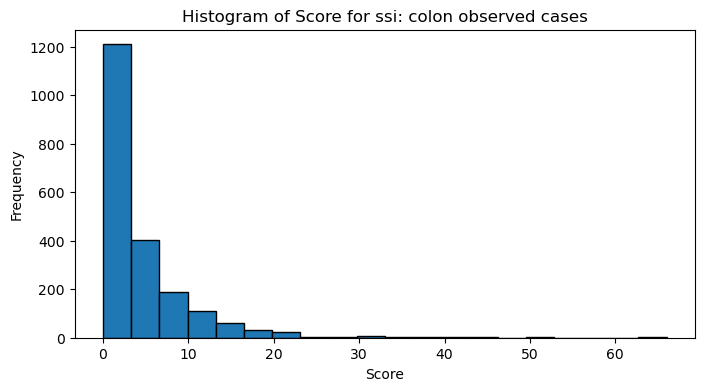

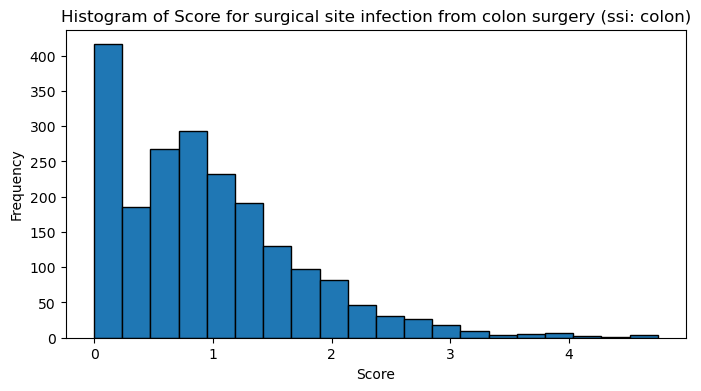

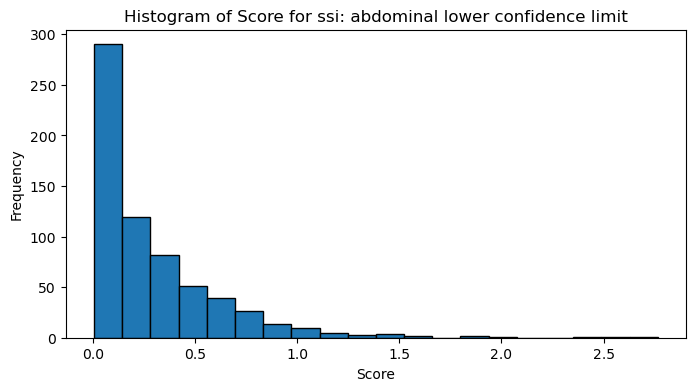

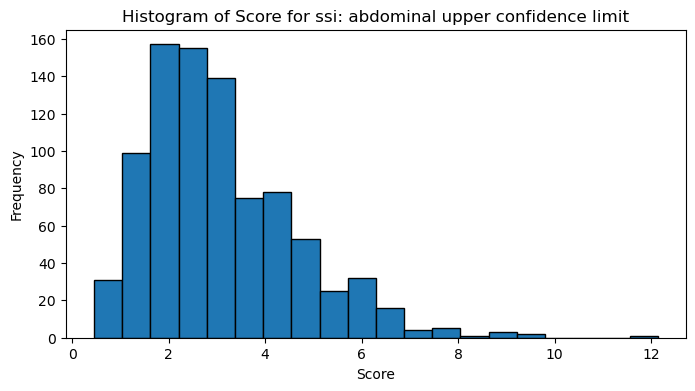

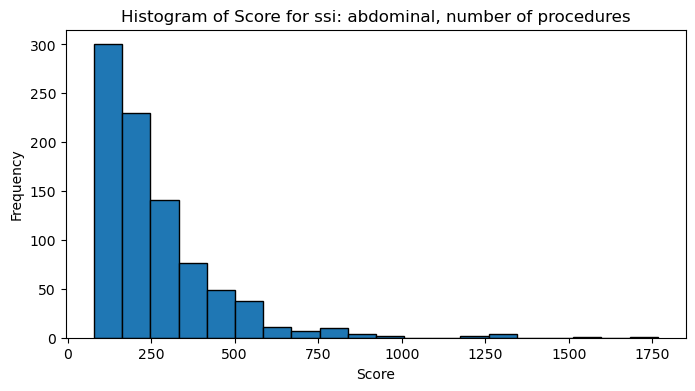

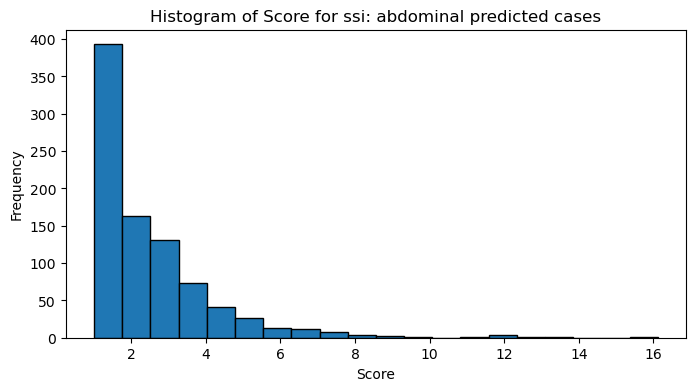

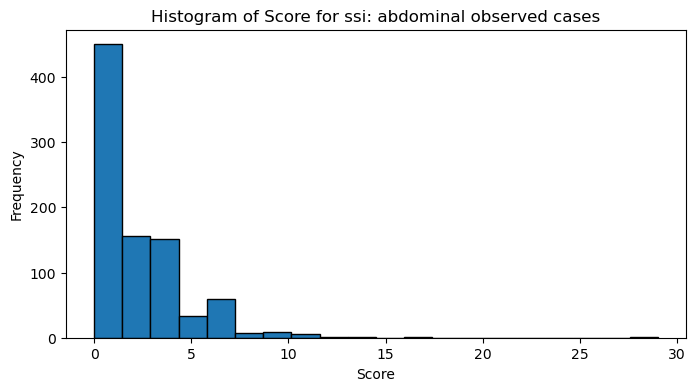

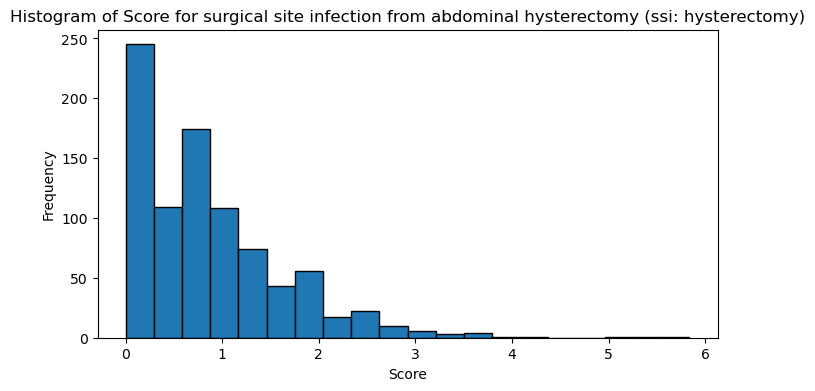

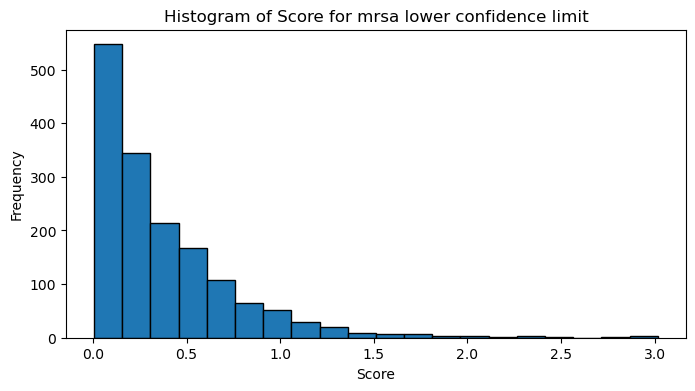

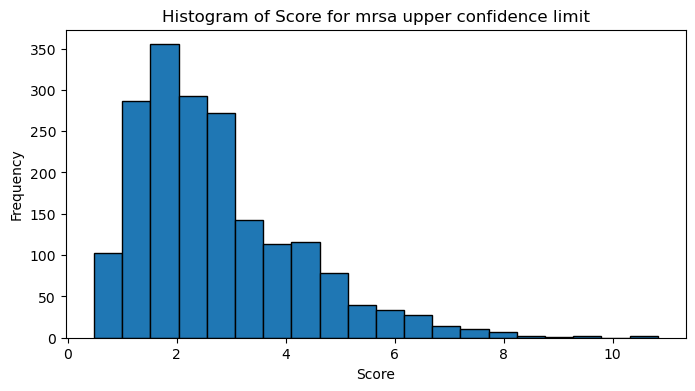

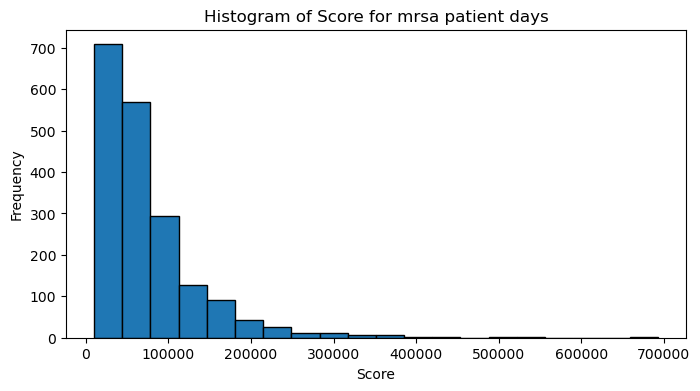

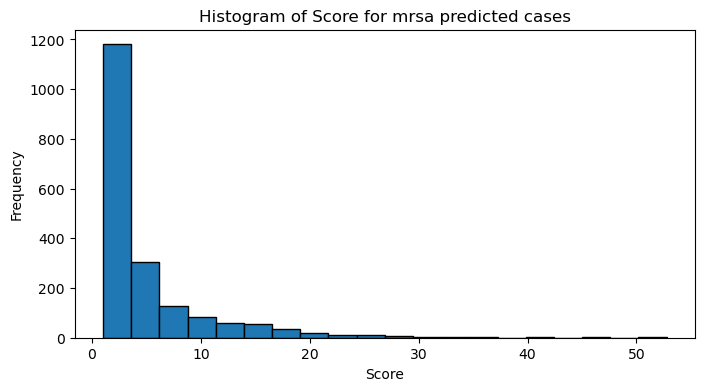

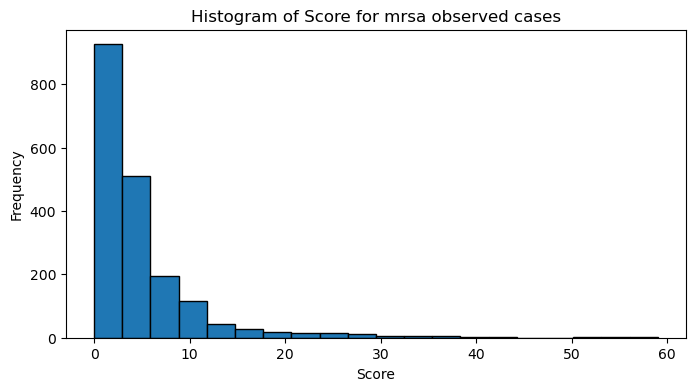

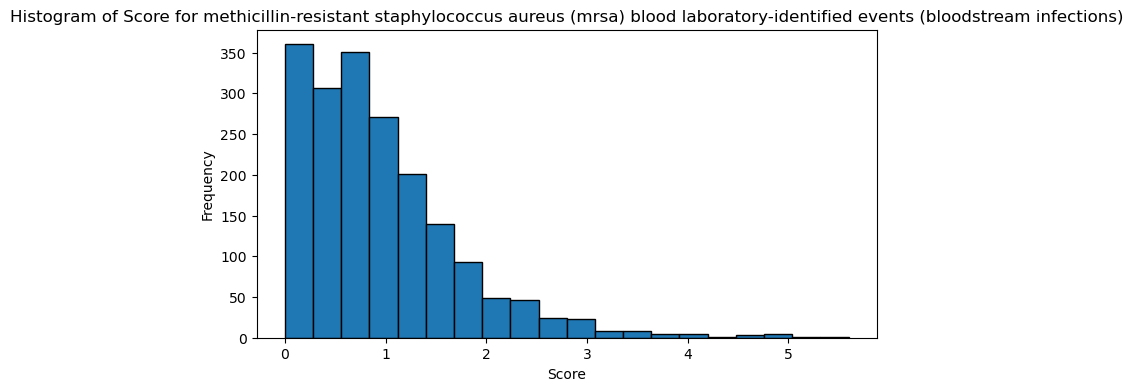

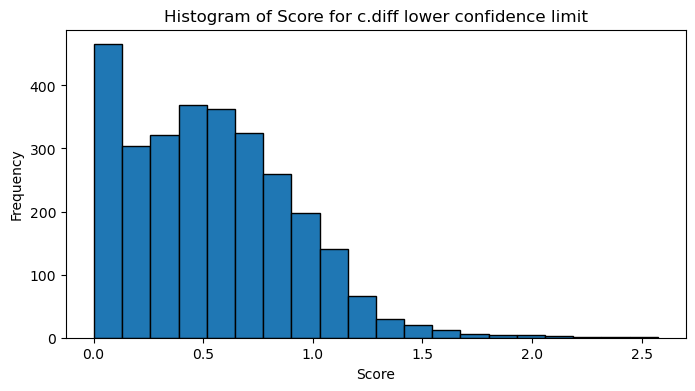

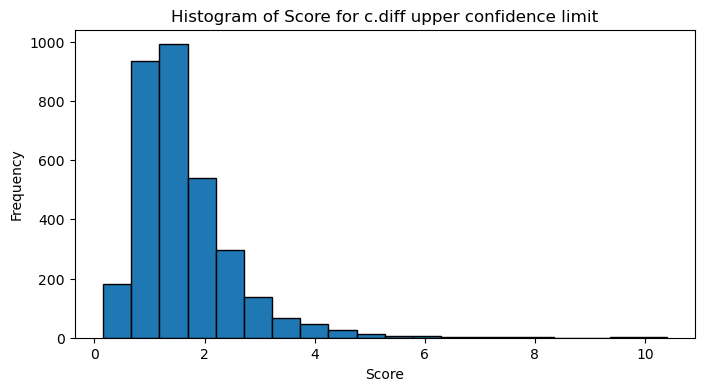

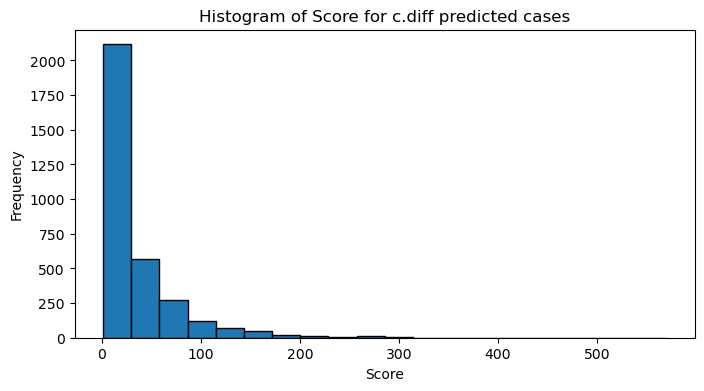

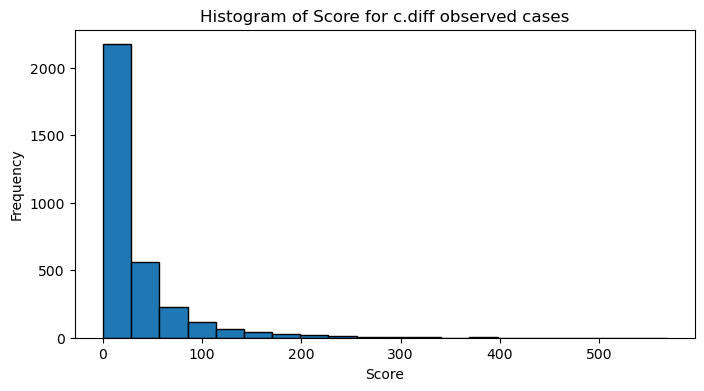

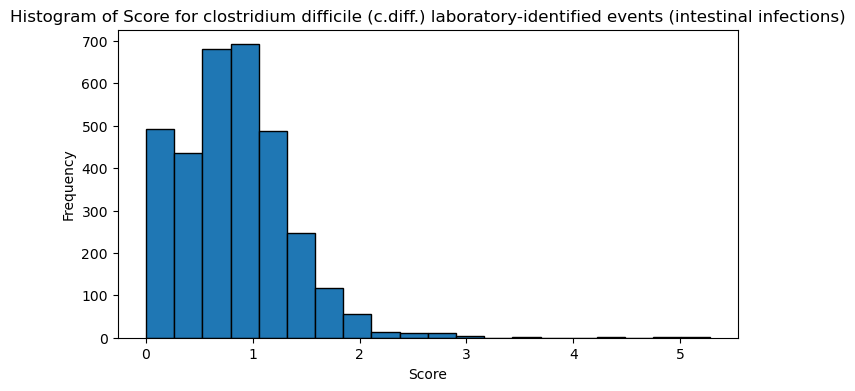

In [56]:
unique_measures = df['Measure Name'].unique()

for measure in unique_measures:
    subset = df[df['Measure Name'] == measure]['Score']
    plt.figure(figsize=(8,4))
    plt.hist(subset, bins=20, edgecolor='black') 
    plt.title(f'Histogram of Score for {measure}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

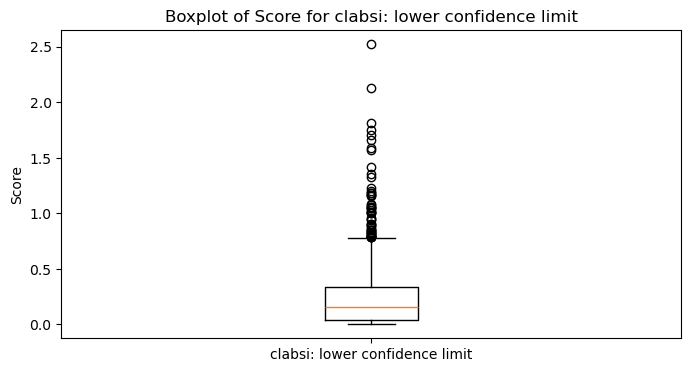

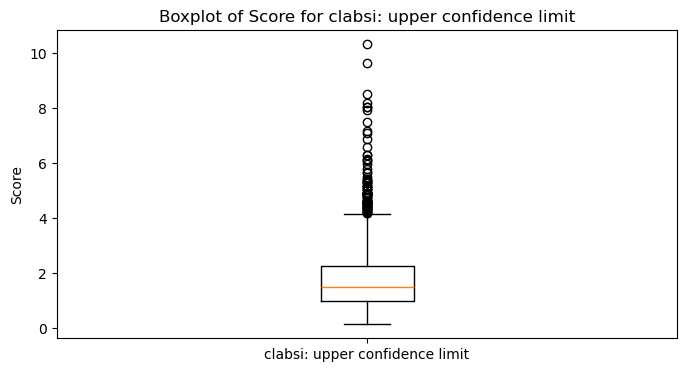

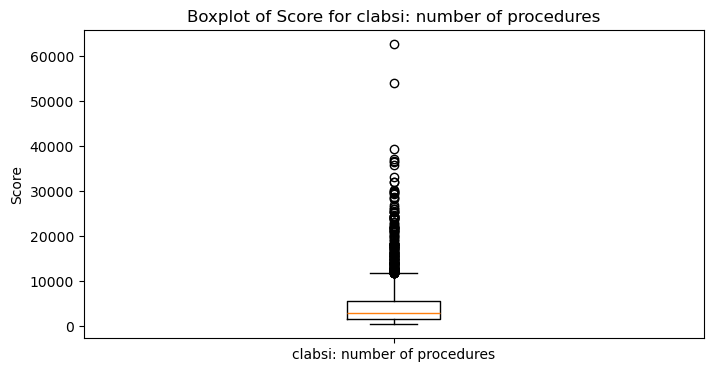

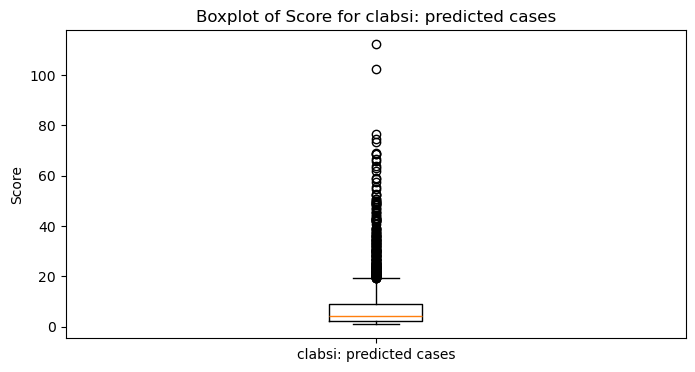

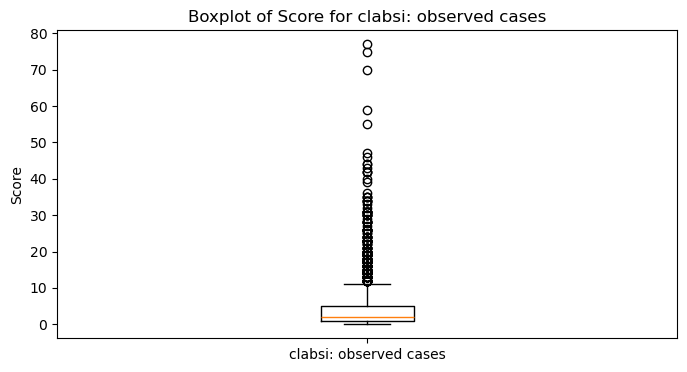

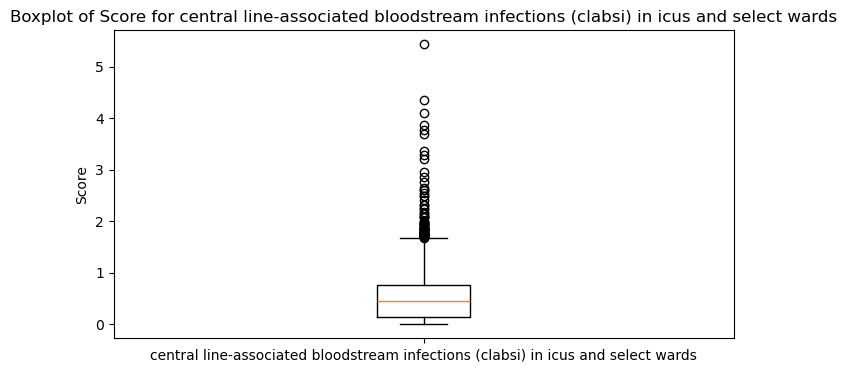

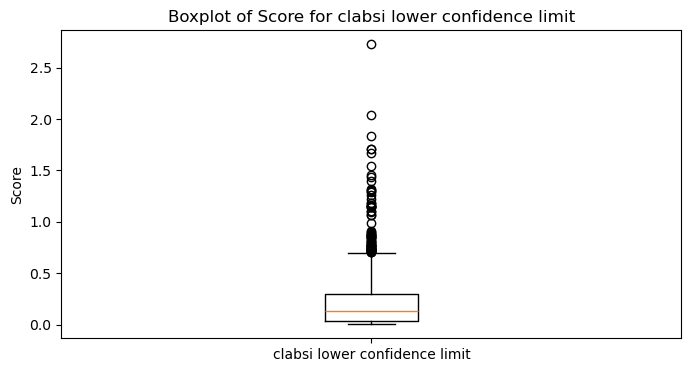

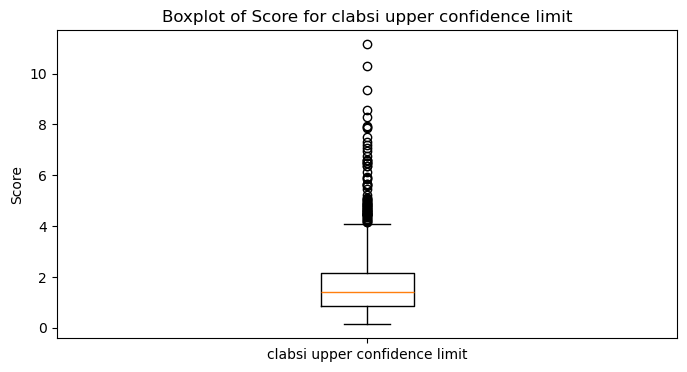

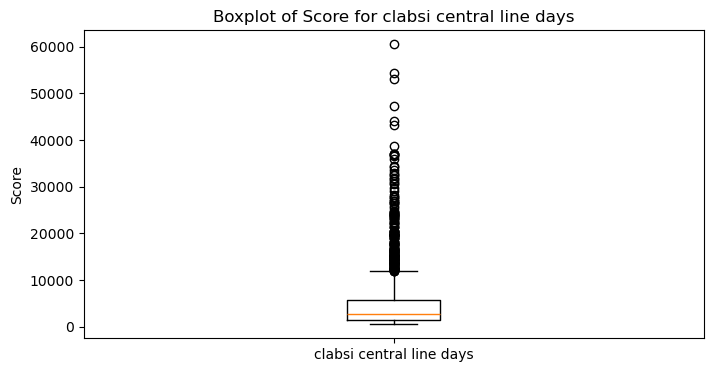

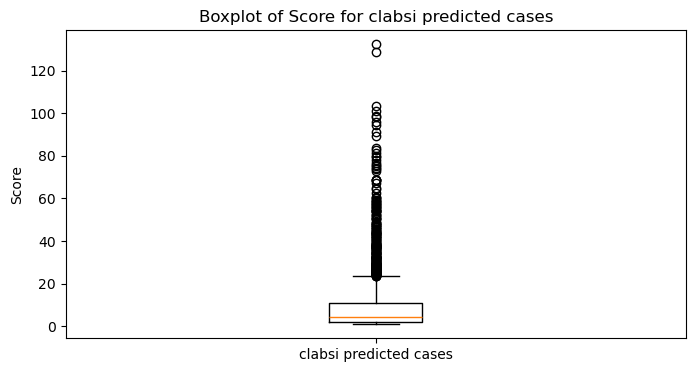

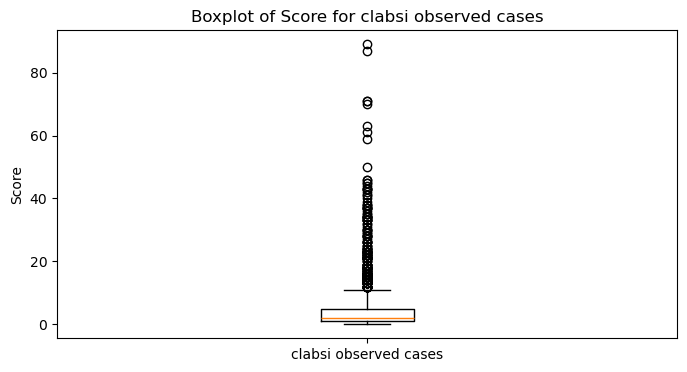

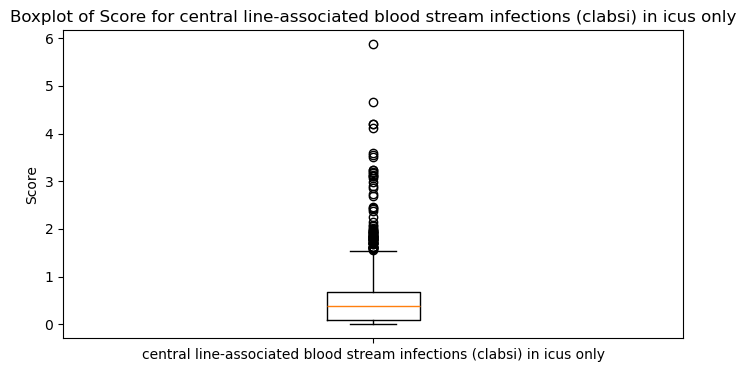

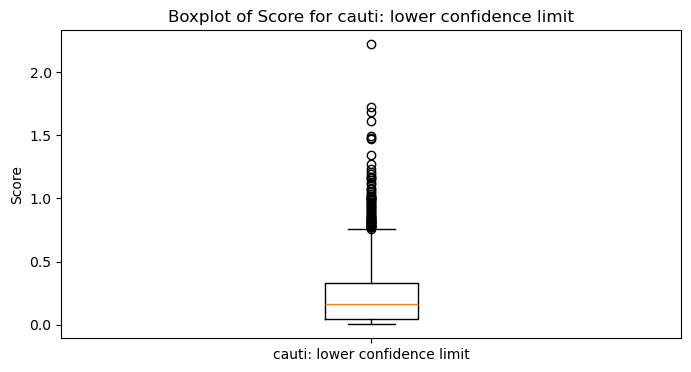

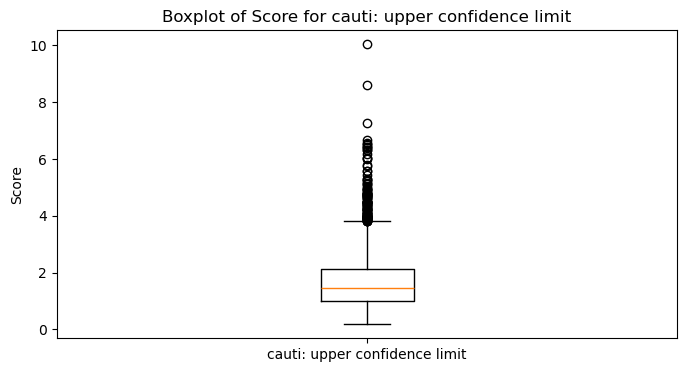

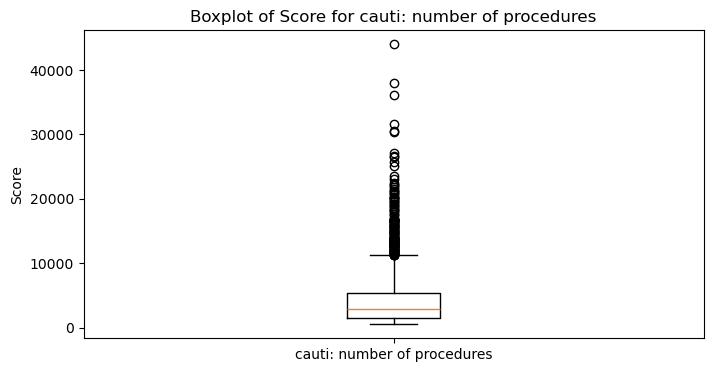

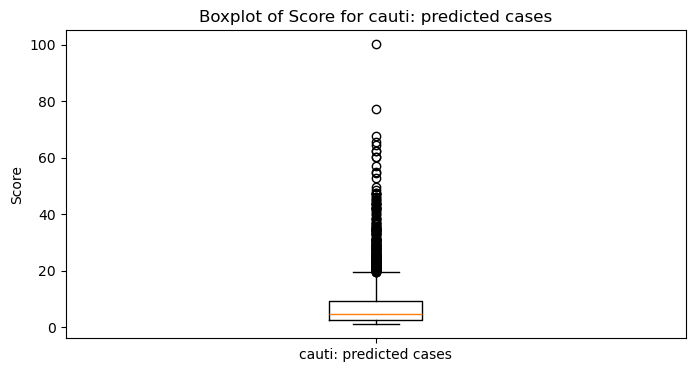

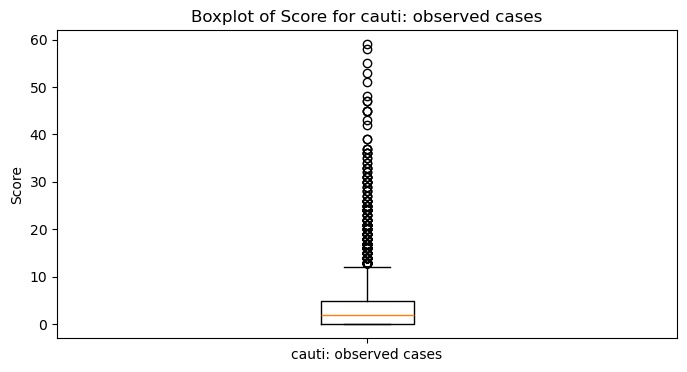

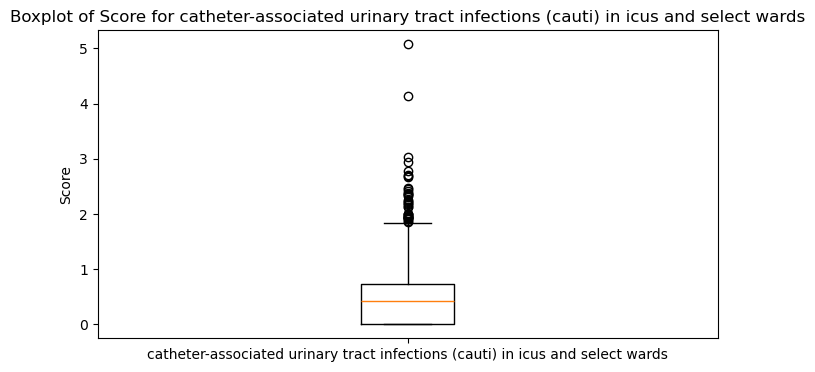

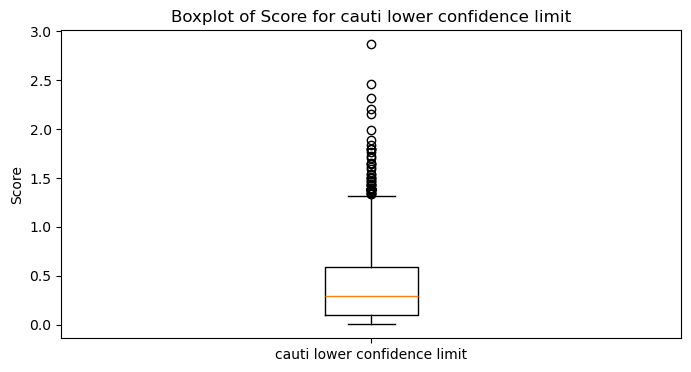

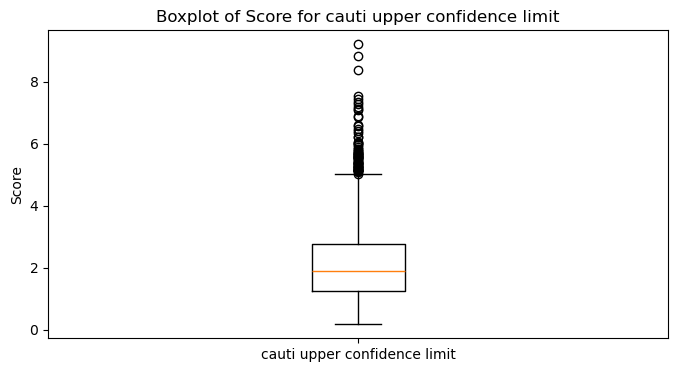

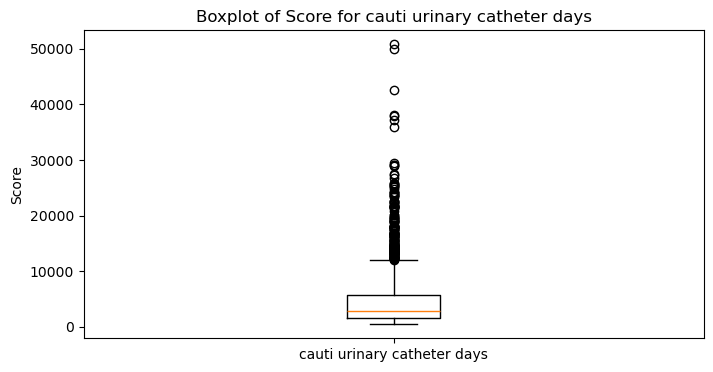

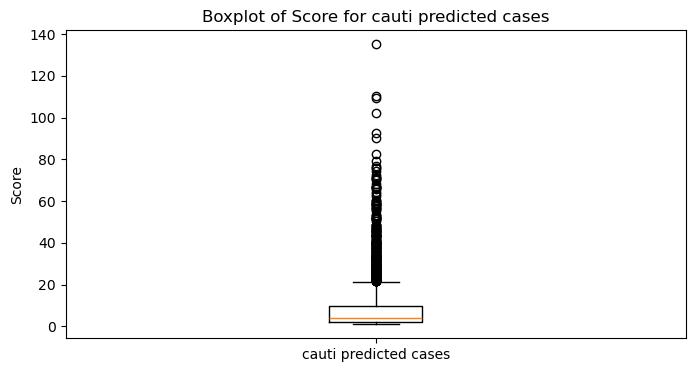

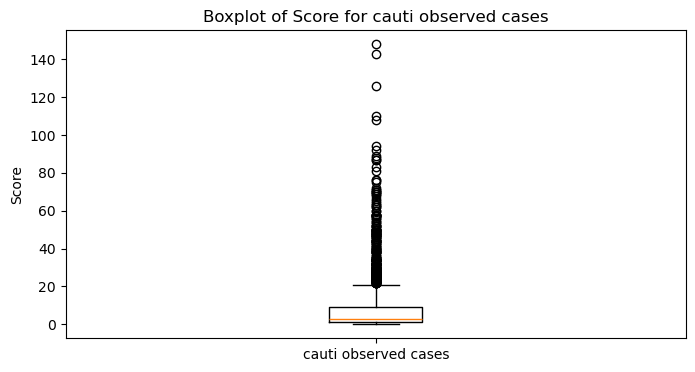

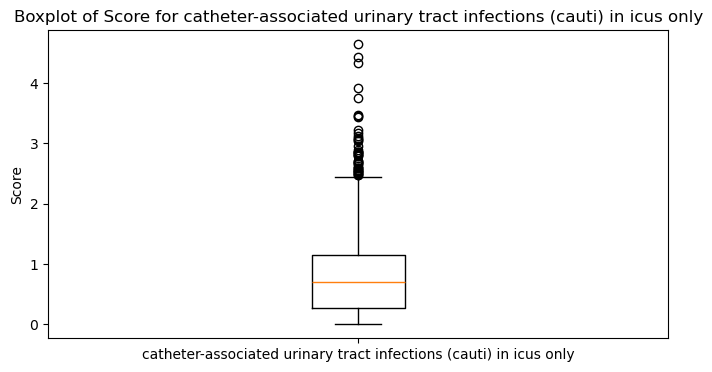

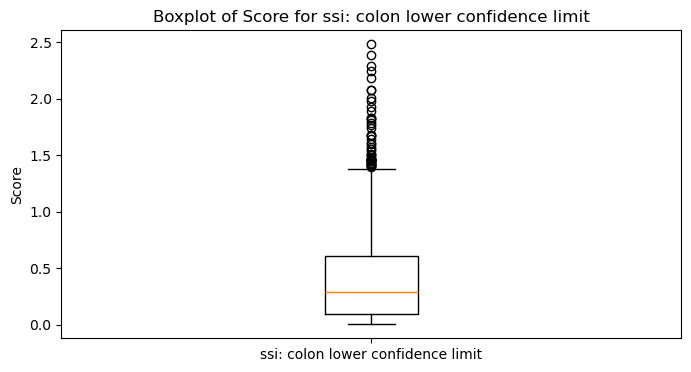

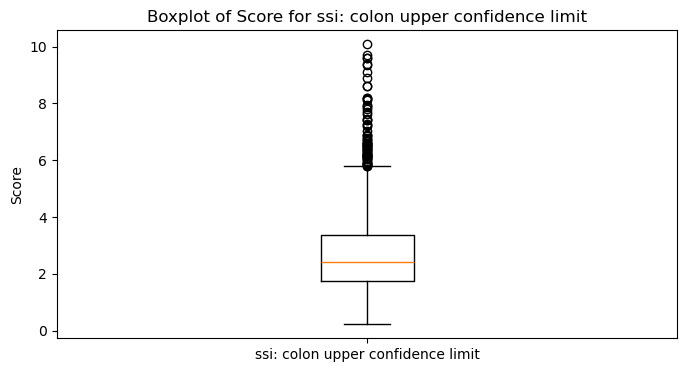

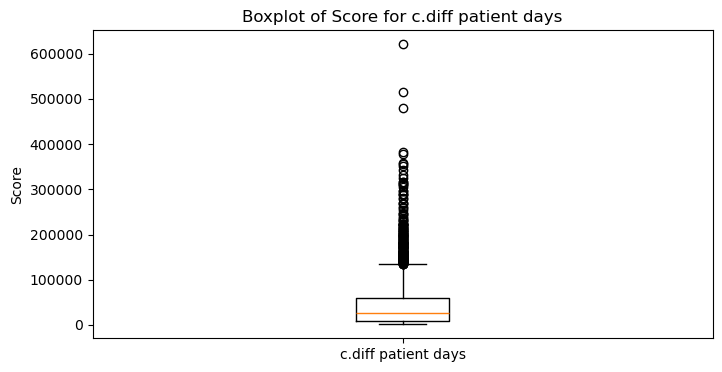

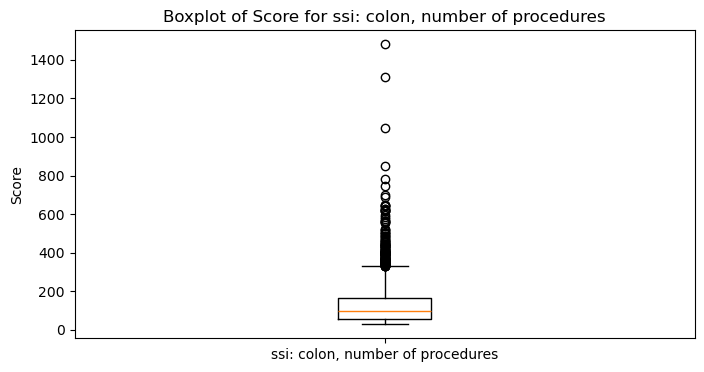

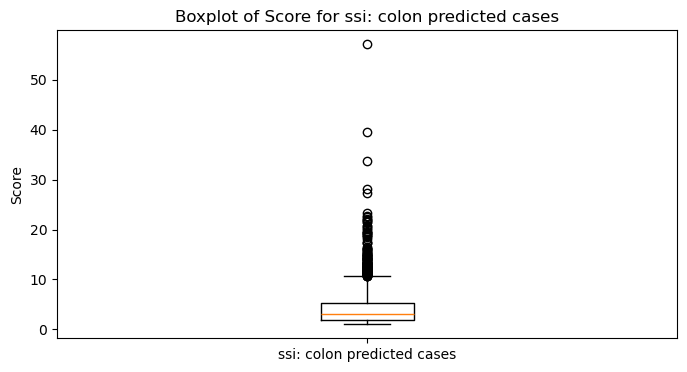

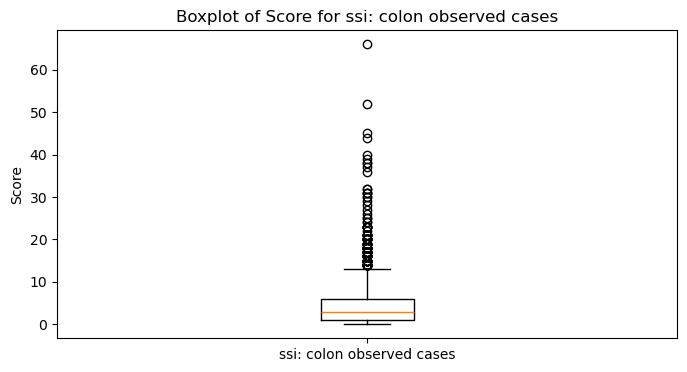

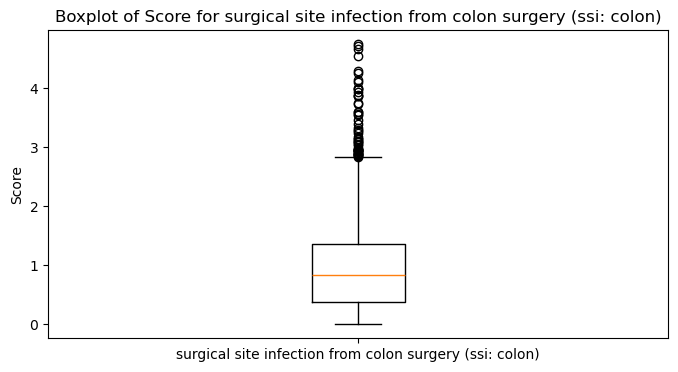

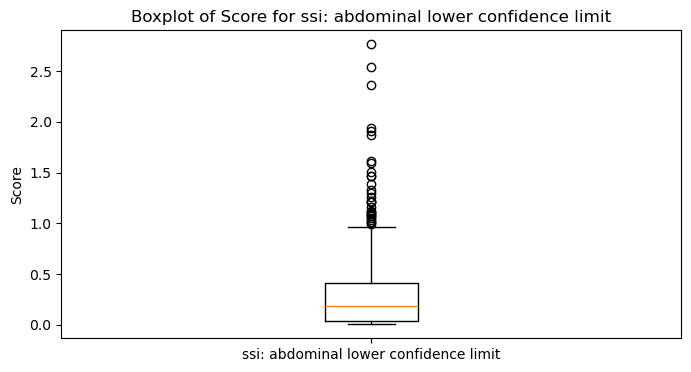

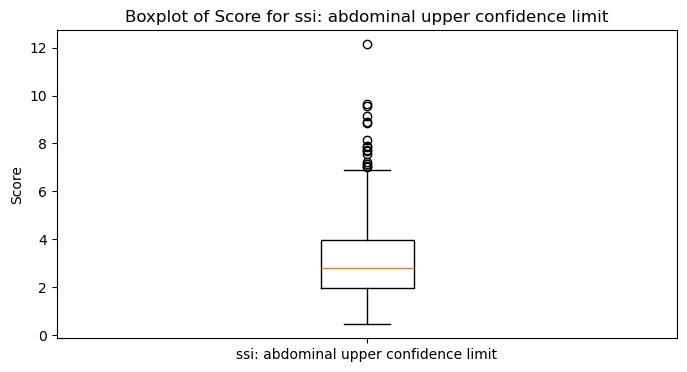

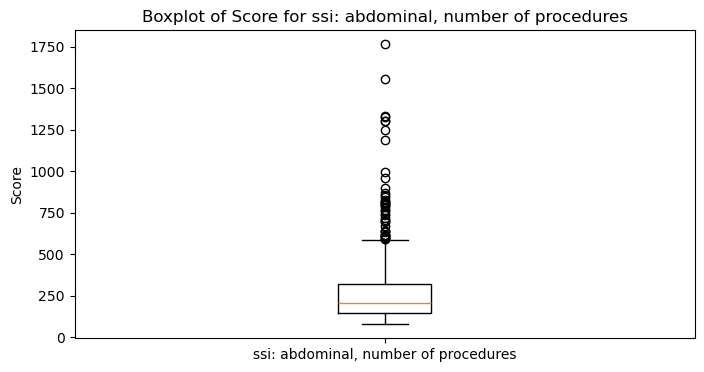

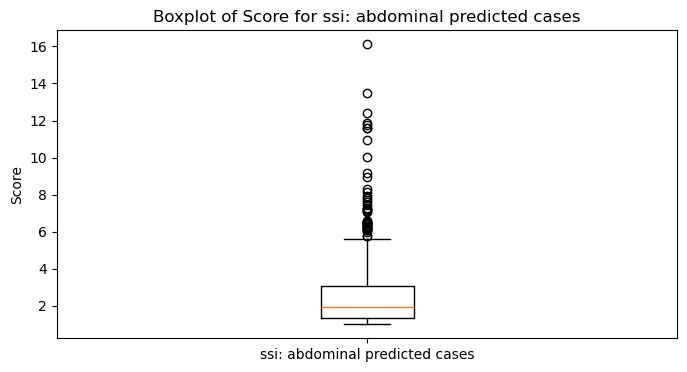

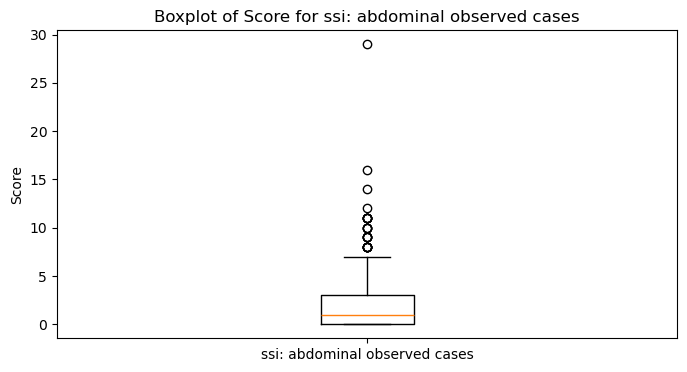

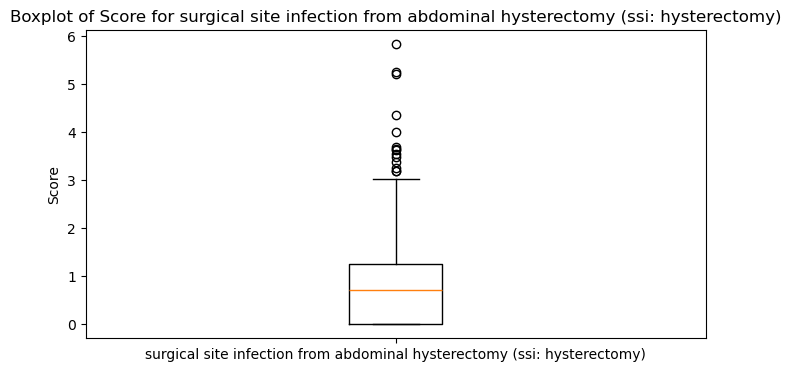

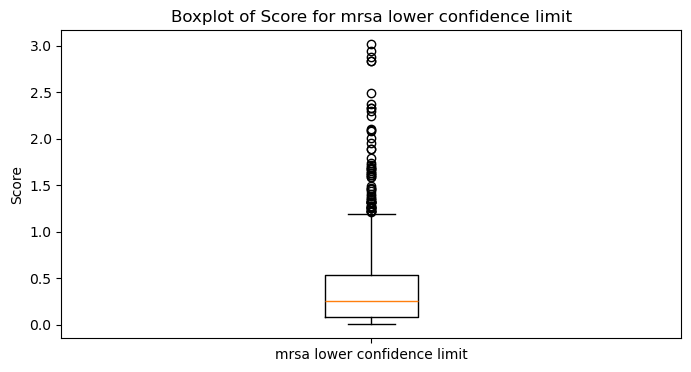

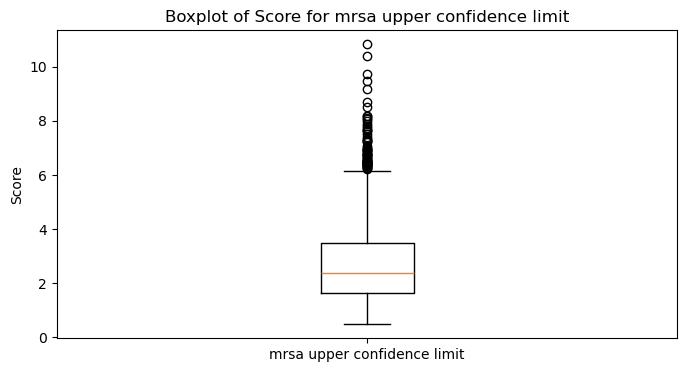

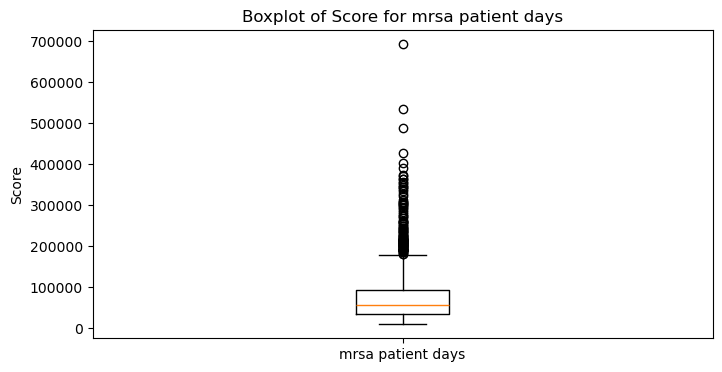

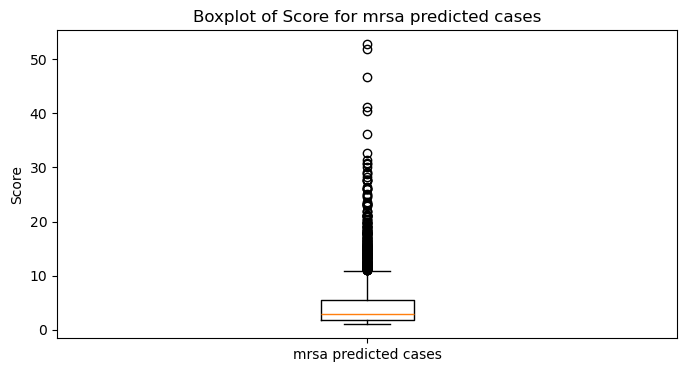

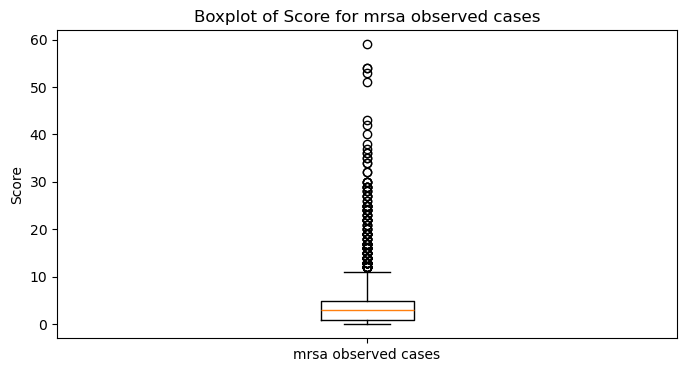

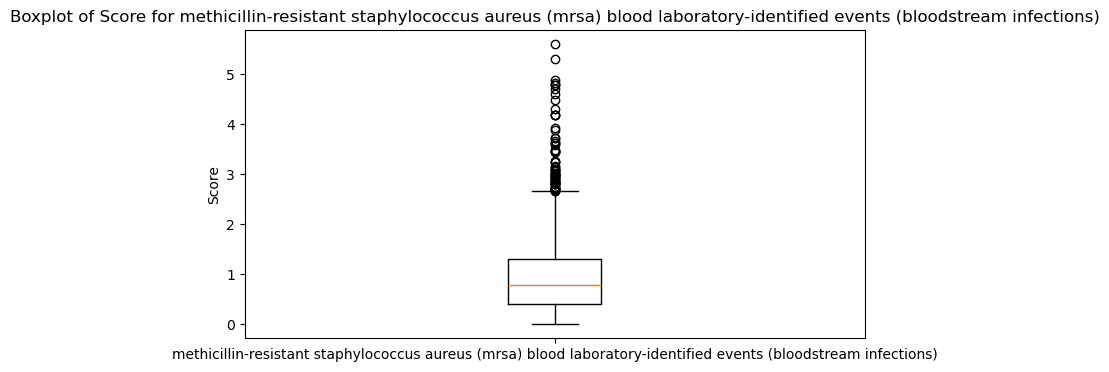

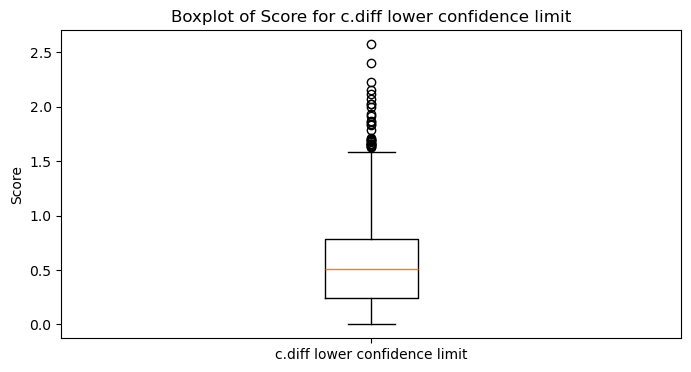

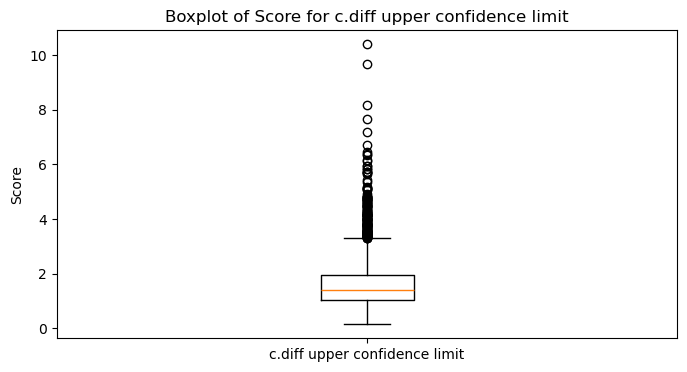

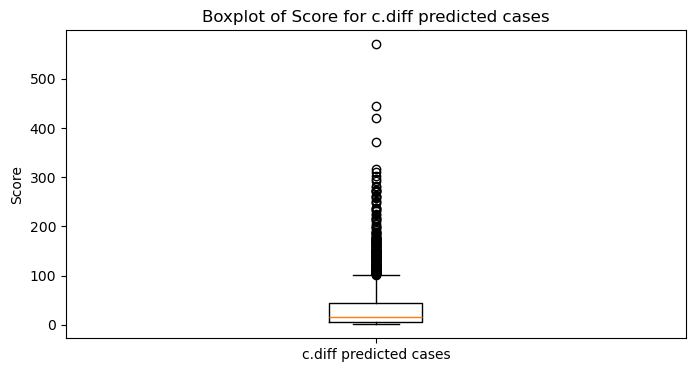

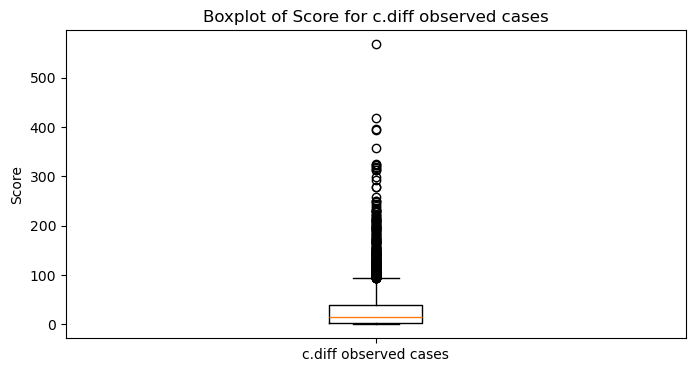

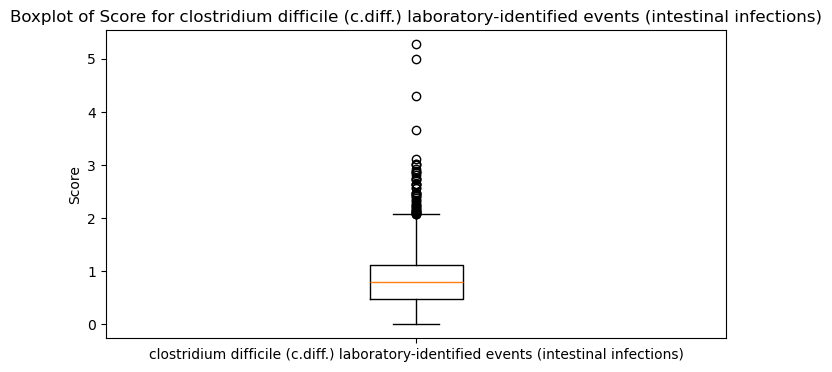

In [57]:
unique_measures = df['Measure Name'].unique()

for measure in unique_measures:
    subset = df[df['Measure Name'] == measure]['Score']
    plt.figure(figsize=(8, 4))
    plt.boxplot(subset.dropna()) 
    plt.title(f'Boxplot of Score for {measure}')
    plt.ylabel('Score')
    plt.xticks([1], [measure]) 
    plt.show()

 for categorical 

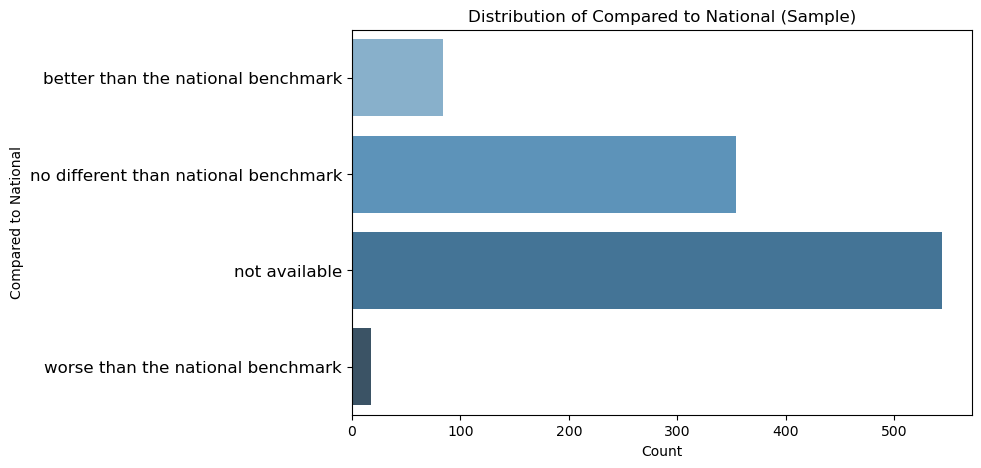

In [72]:
sample_df = df.sample(1000, random_state=42)  

plt.figure(figsize=(8, 5))
sns.countplot(
    data=sample_df,
    y='Compared to National',
    palette='Blues_d',
    hue='Compared to National',
    dodge=False,
    legend=False
)
plt.title('Distribution of Compared to National (Sample)')
plt.xlabel('Count')
plt.ylabel('Compared to National')
plt.yticks(rotation=0, fontsize=12)
plt.show()

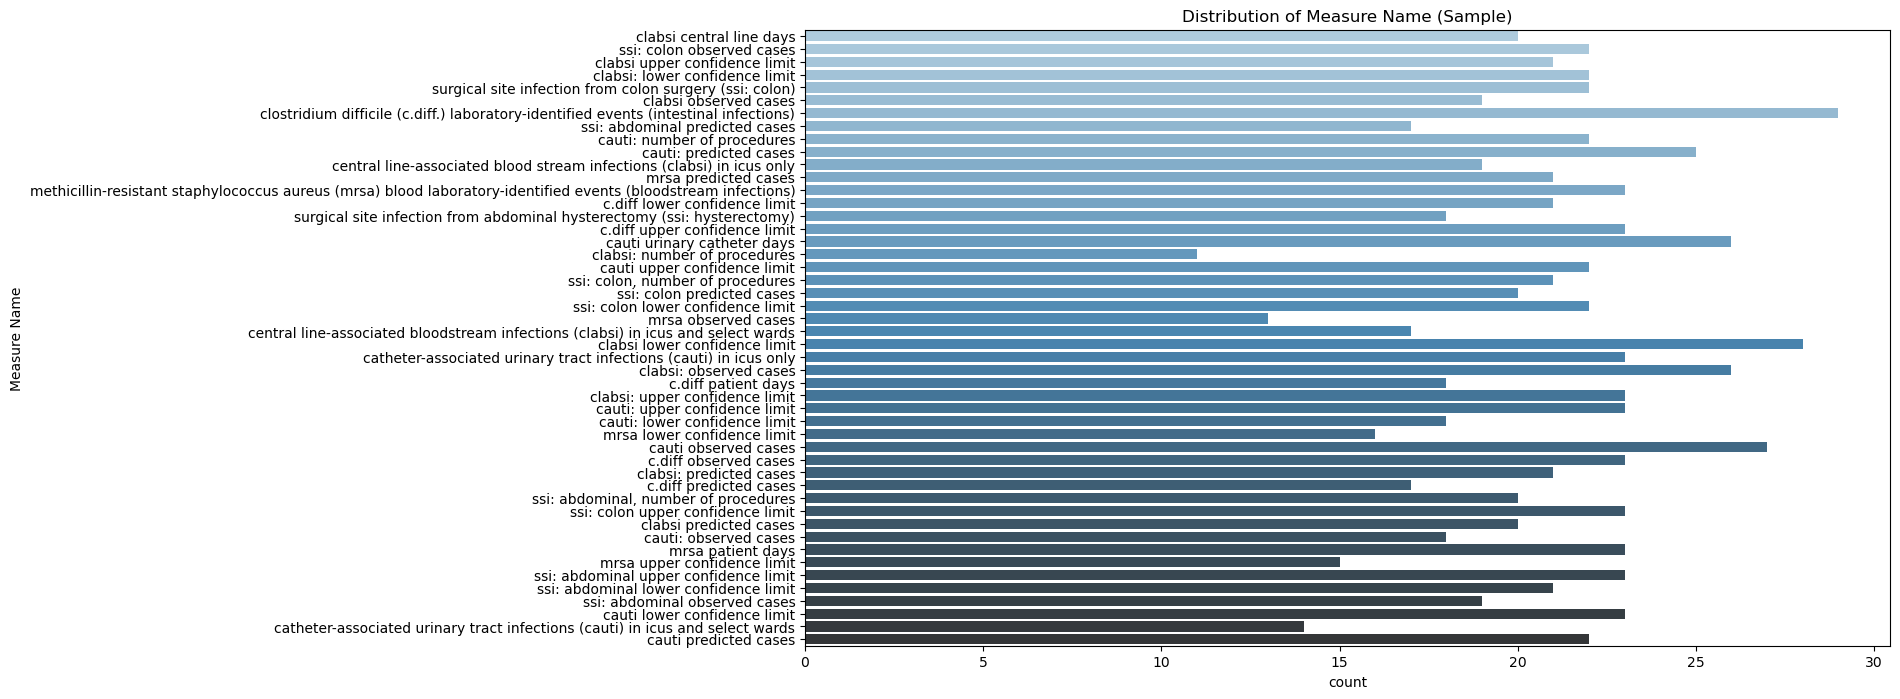

In [82]:
sample_df = df.sample(1000, random_state=42)

plt.figure(figsize=(14, 8))
sns.countplot(
    y='Measure Name',
    data=sample_df,
    palette='Blues_d',
    hue='Measure Name',  
    legend=False
)
plt.title('Distribution of Measure Name (Sample)')
plt.show()

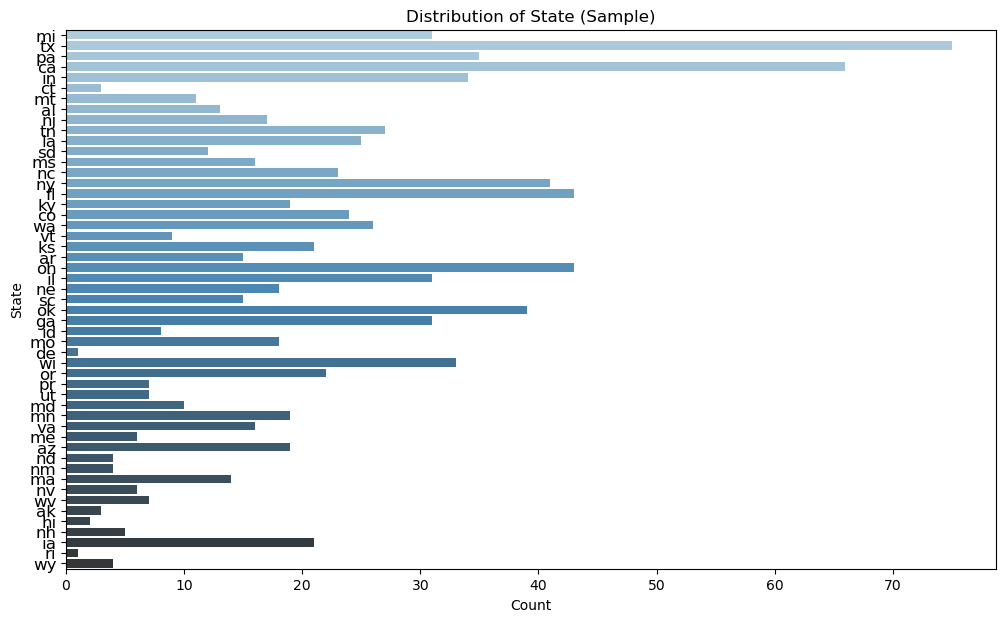

In [84]:
sample_df = df.sample(1000, random_state=42)  # عينة صغيرة عشان الأداء

plt.figure(figsize=(12, 7))
sns.countplot(
    data=sample_df,
    y='State',
    palette='Blues_d',
    hue='State',
    dodge=False,
    legend=False
)
plt.title('Distribution of State (Sample)')
plt.xlabel('Count')
plt.ylabel('State')
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Bivariate analysis :

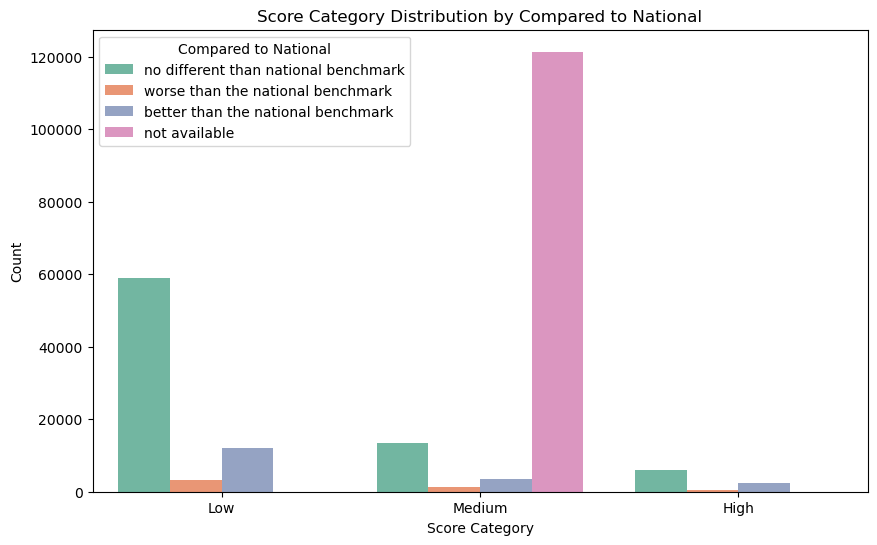

In [155]:
df['Score Category'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Score Category', hue='Compared to National', palette='Set2')
plt.title('Score Category Distribution by Compared to National')
plt.xlabel('Score Category')
plt.ylabel('Count')
plt.show()


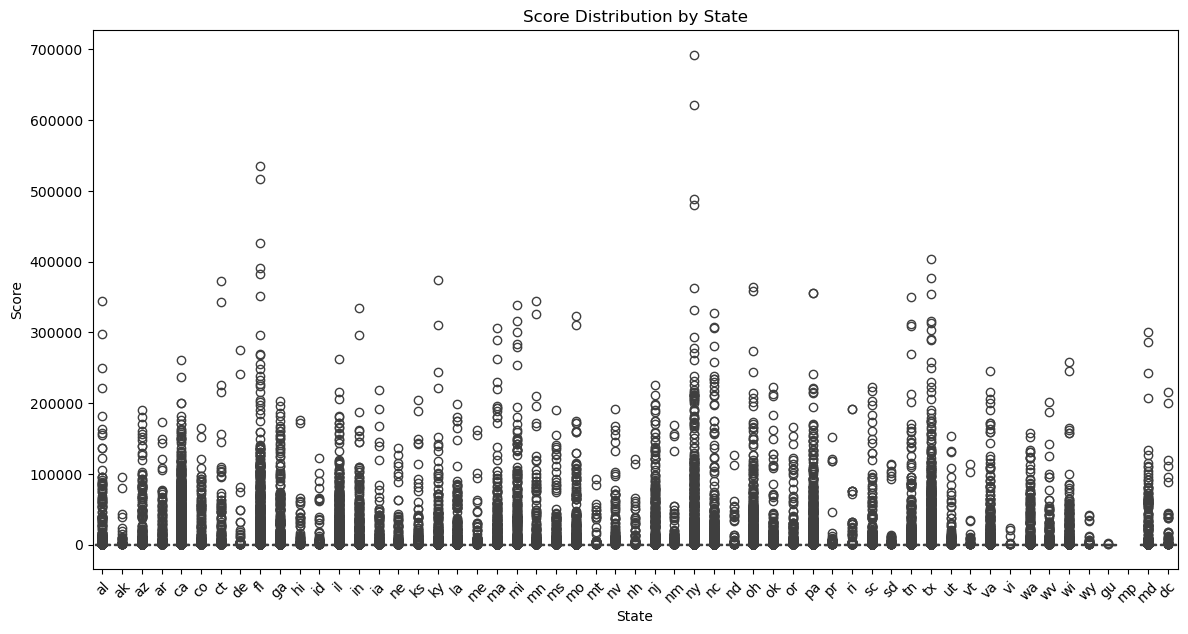

In [93]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='State', y='Score', data=df)
plt.title('Score Distribution by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

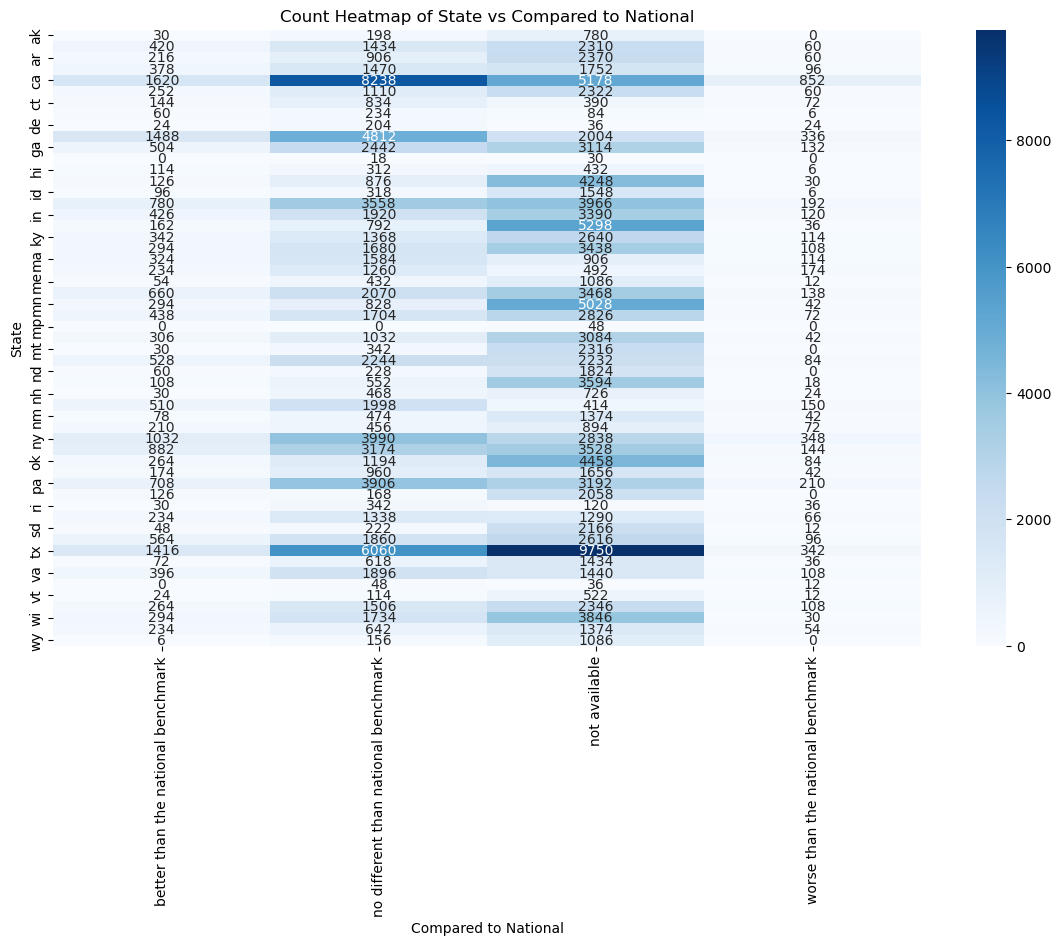

In [115]:
cross_tab = pd.crosstab(df['State'], df['Compared to National'])

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

plt.title('Count Heatmap of State vs Compared to National')
plt.xlabel('Compared to National')
plt.ylabel('State')
plt.show()

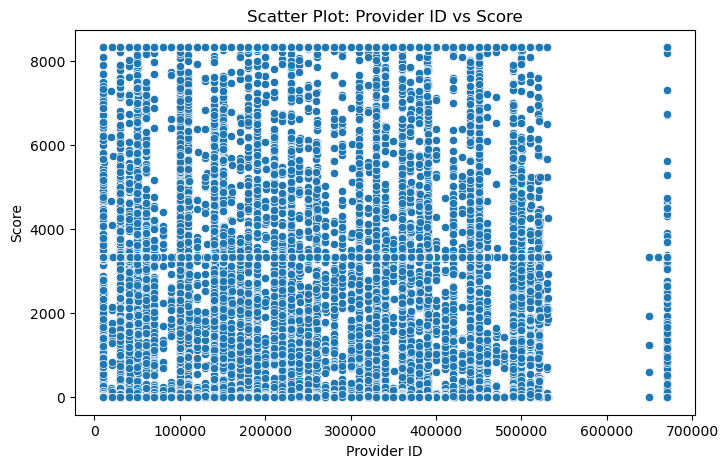

In [269]:
# Create scatter plot for Score vs Provider ID
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Provider ID", y="Score")
plt.title("Scatter Plot: Provider ID vs Score")
plt.xlabel("Provider ID")
plt.ylabel("Score")
plt.show()

# Feature transformation :

# Detect and handle outliers

In [183]:
# Keep a copy of the dataset before any transformations
df_original = df.copy()


In [184]:
# Calculate IQR for the Score column
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (replace values outside bounds with the bounds)
df['Score'] = df['Score'].clip(lower=lower_bound, upper=upper_bound)

# Print bounds for documentation
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -4993.2332432066205
Upper Bound: 8328.796738677702


In [185]:

# Create a new column with Log Transformation
# log1p is used to handle zero values safely
df['Score_log'] = np.log1p(df['Score'])



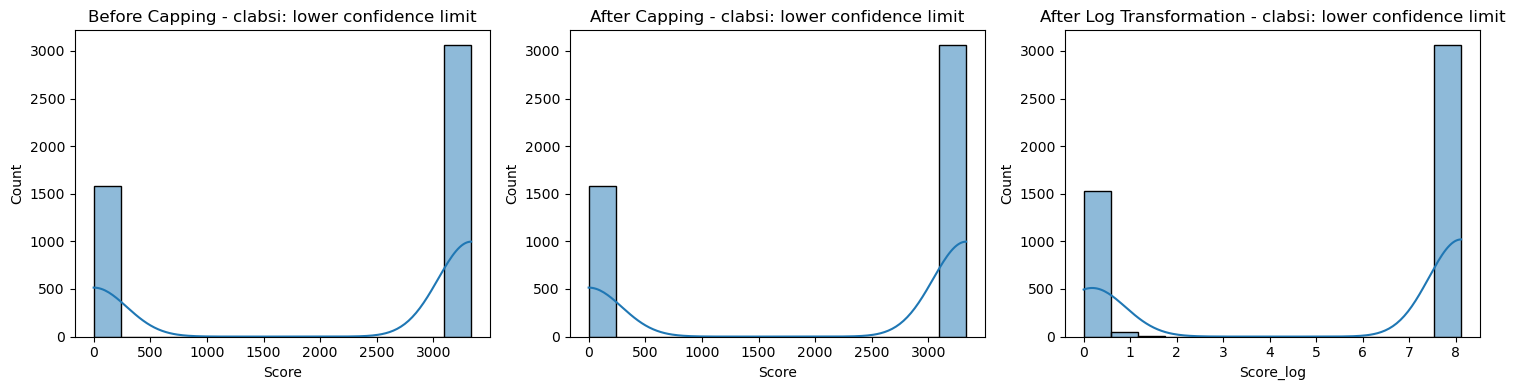

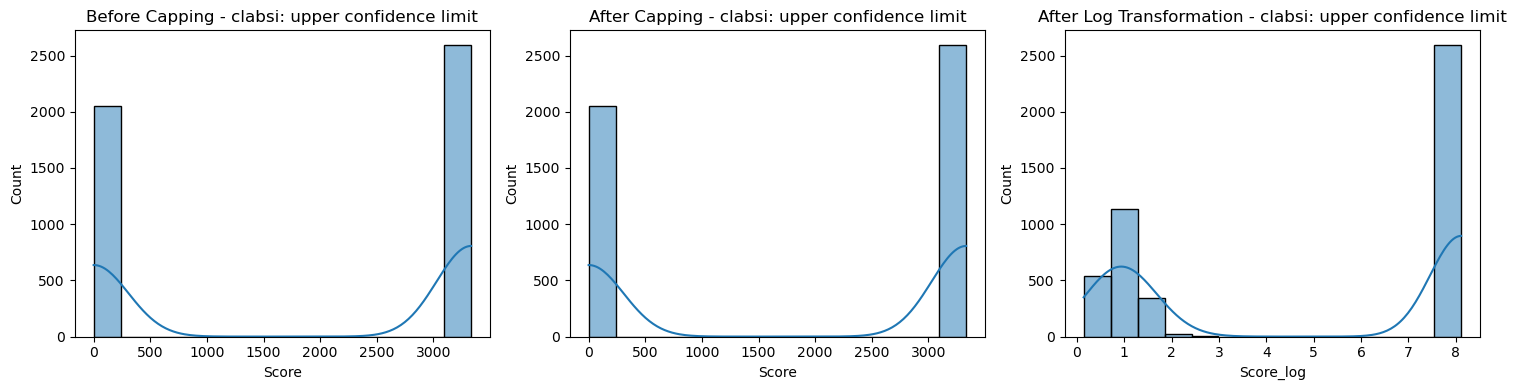

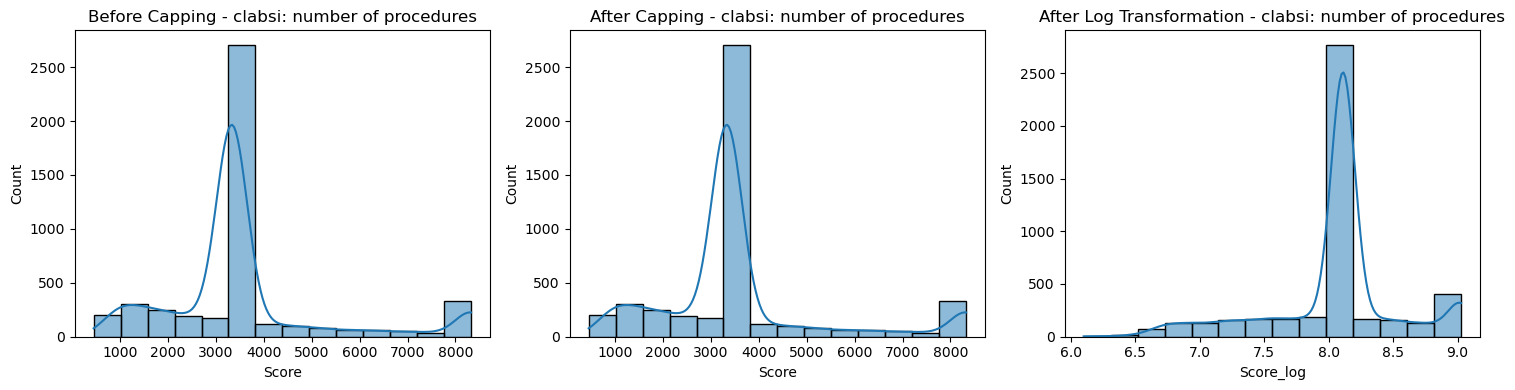

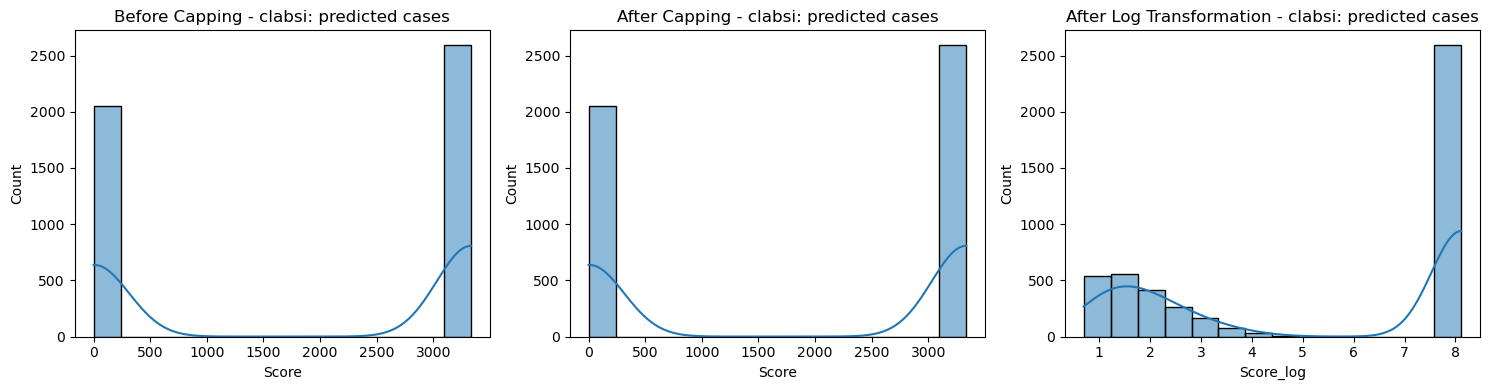

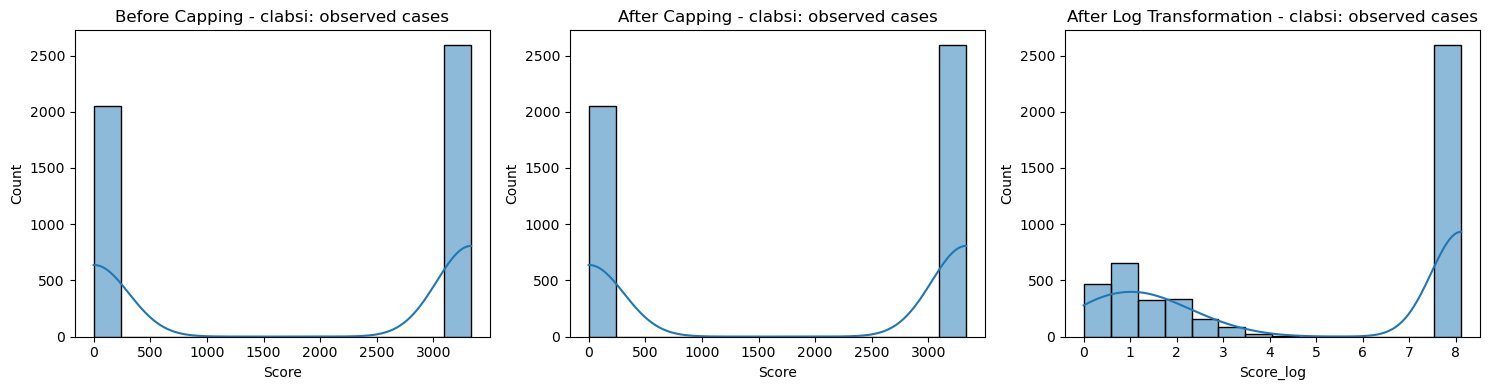

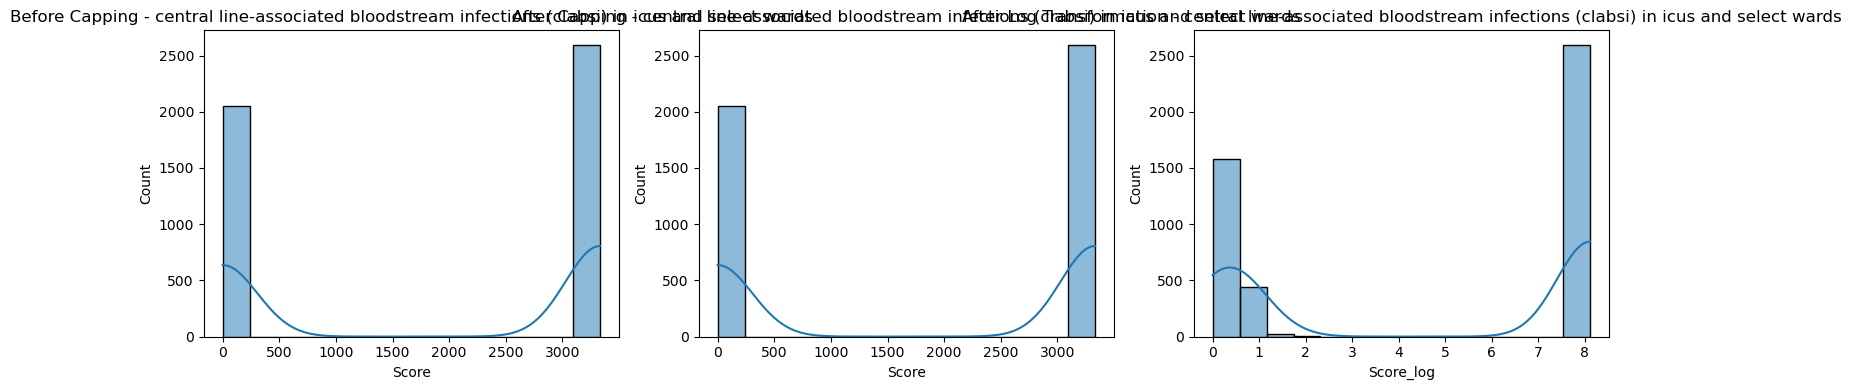

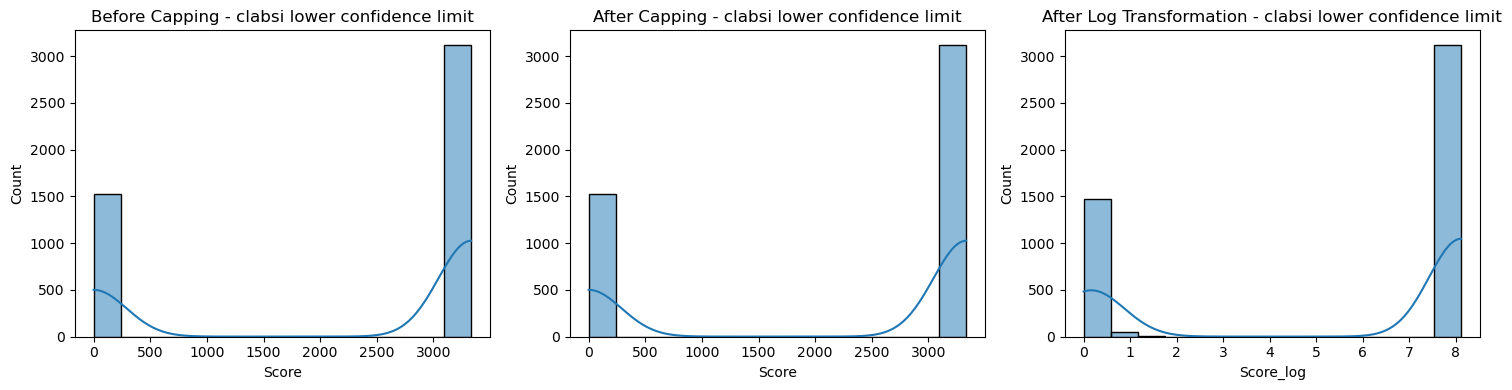

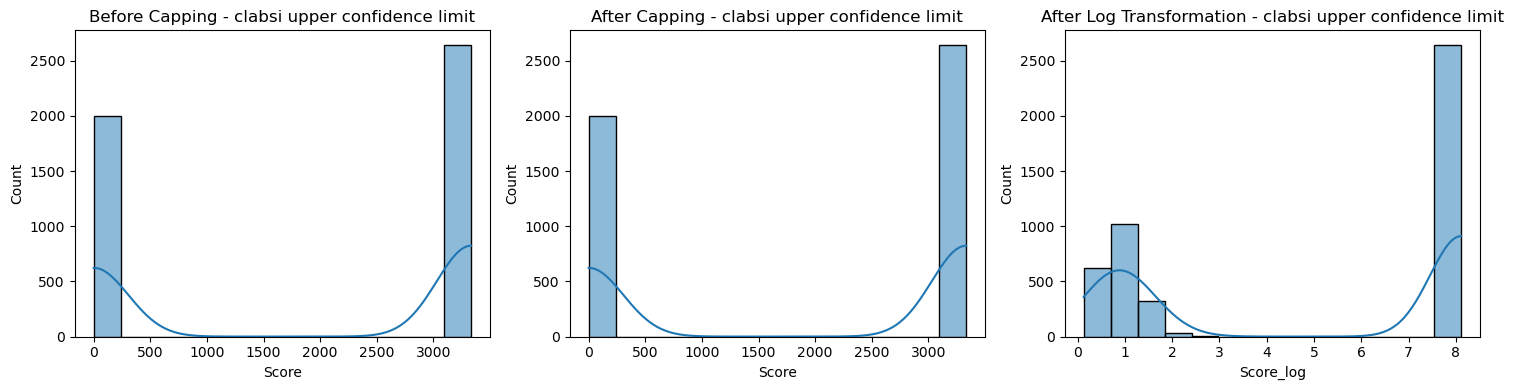

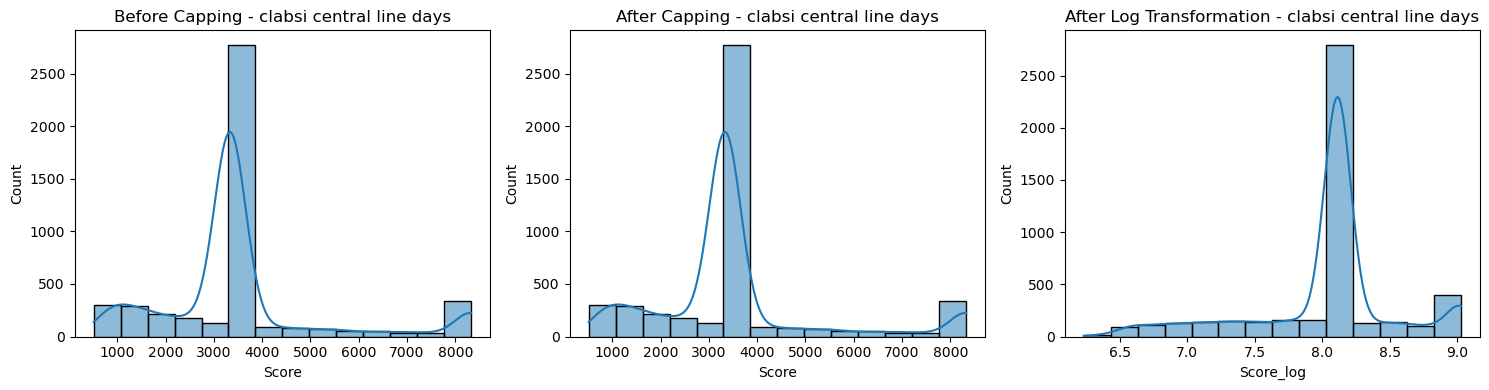

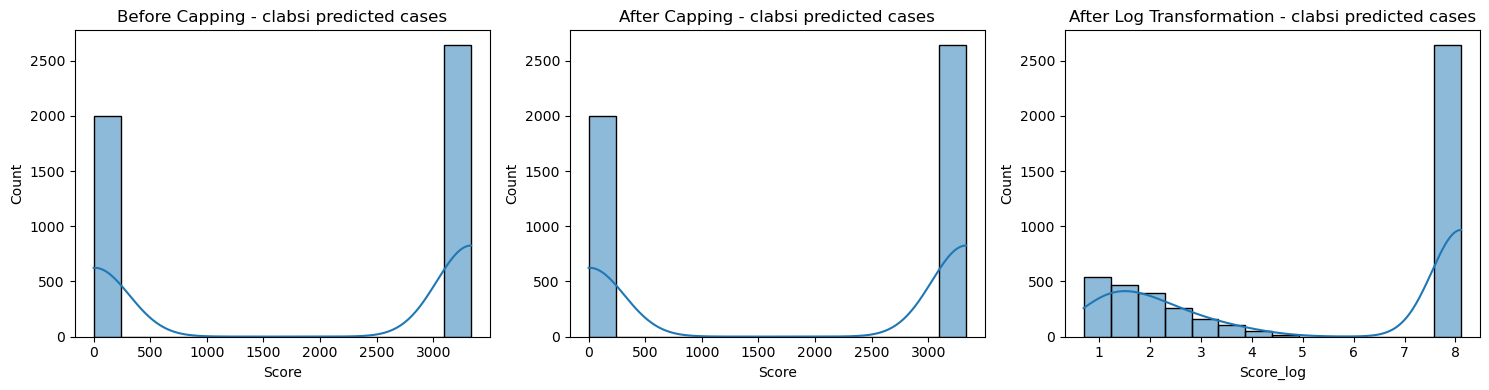

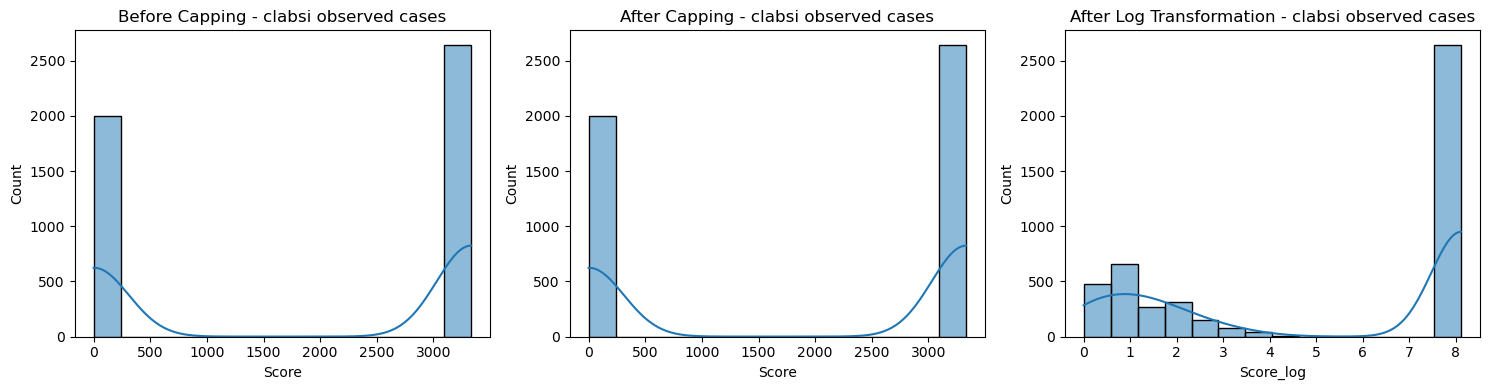

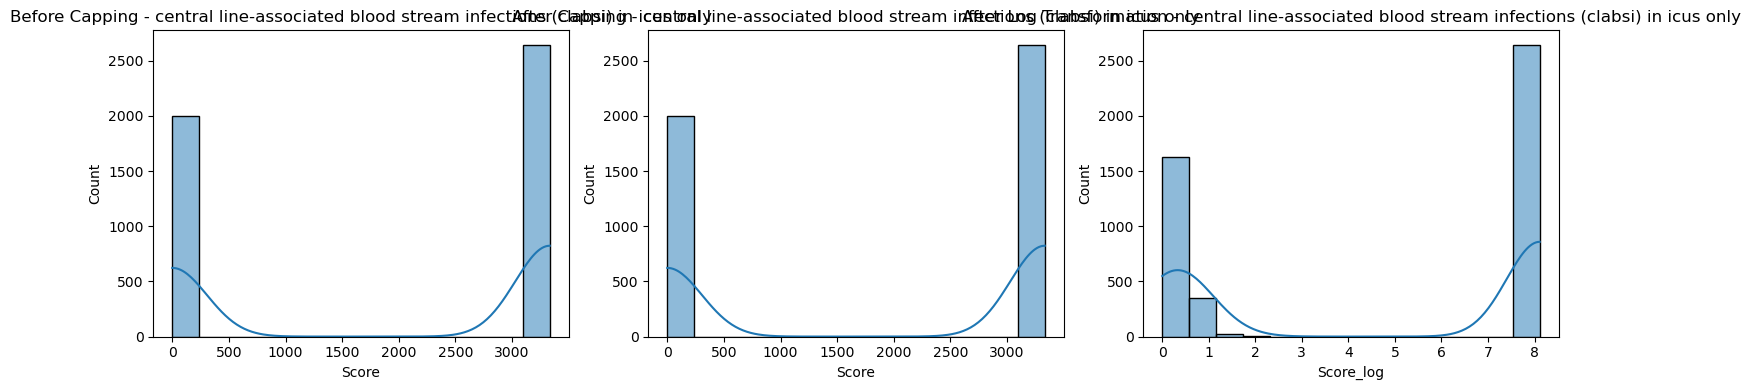

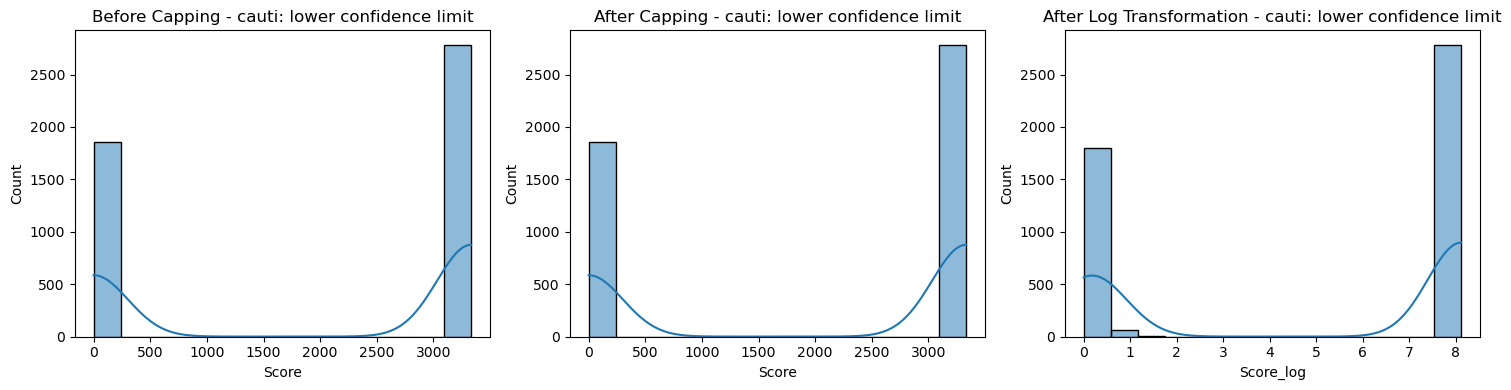

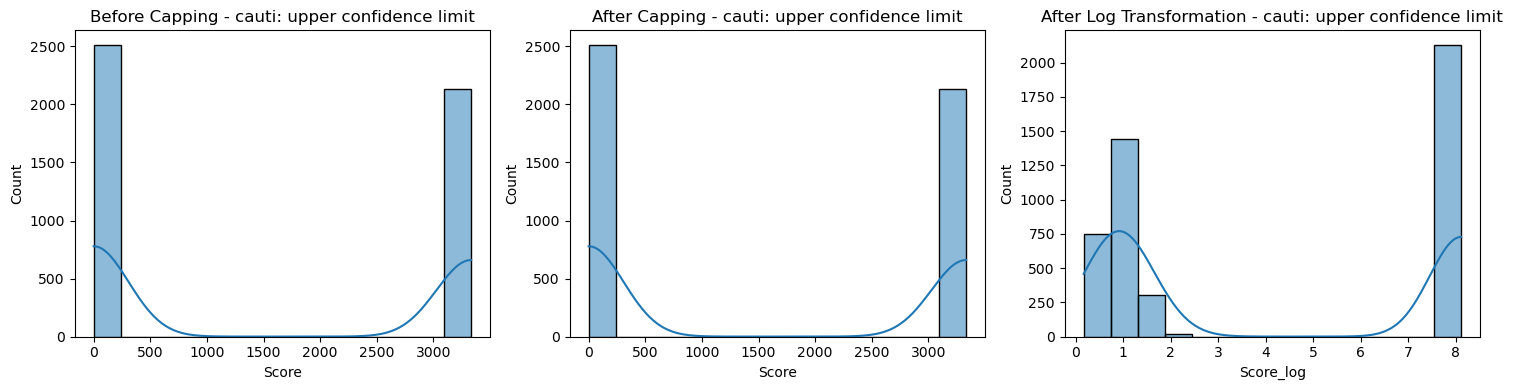

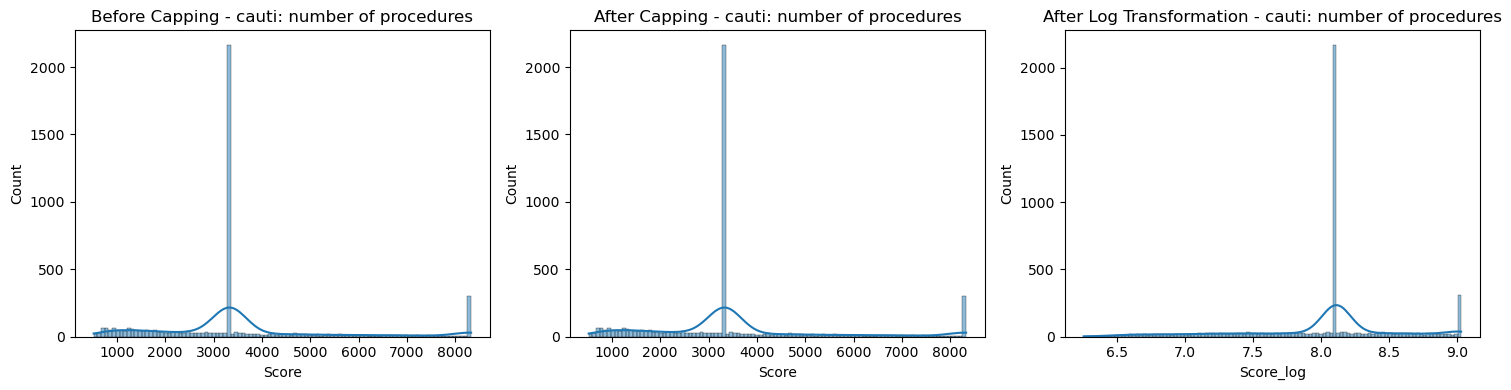

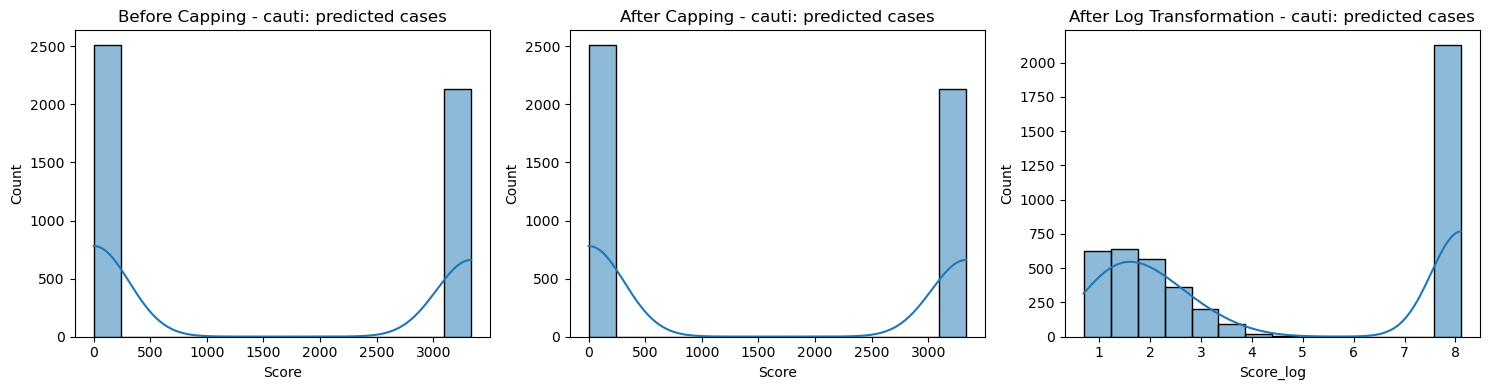

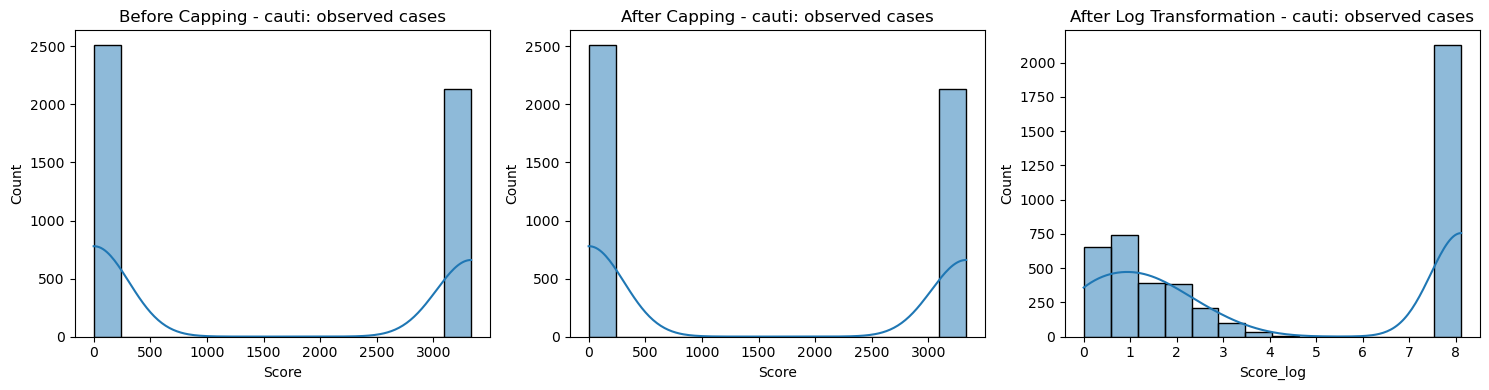

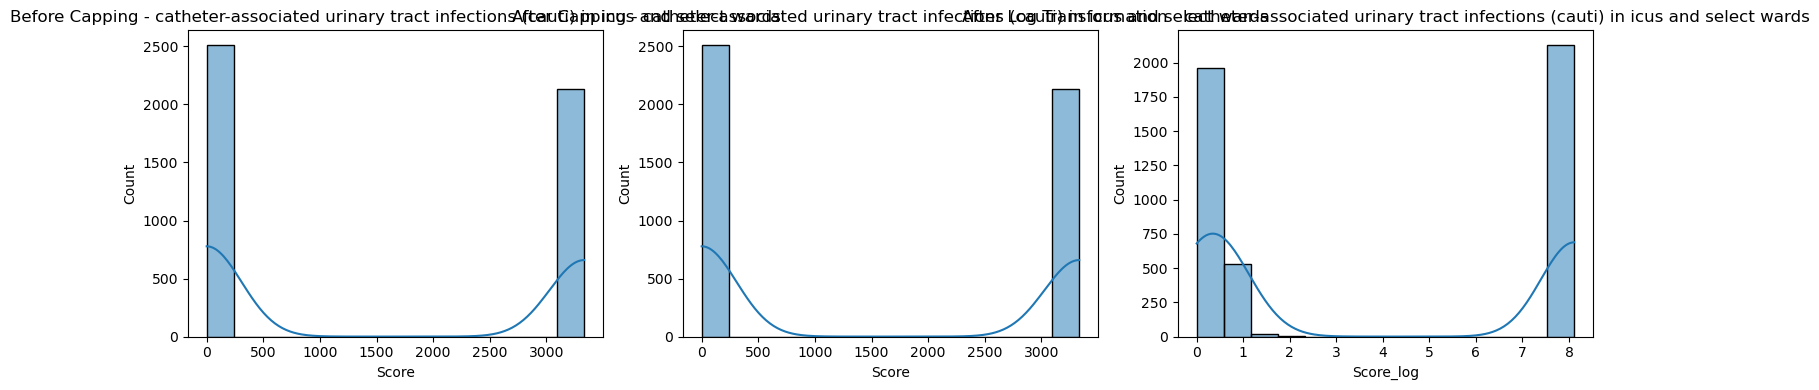

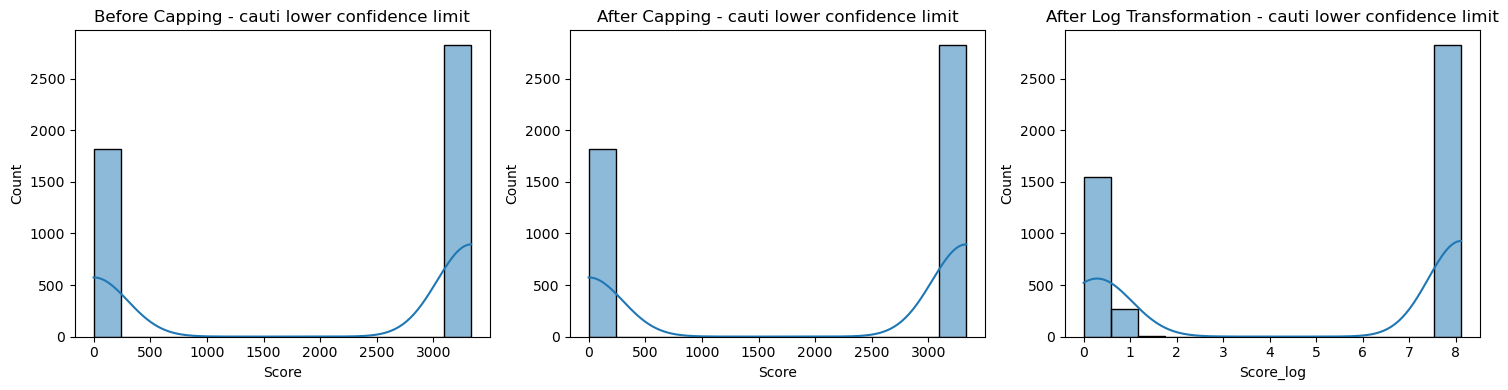

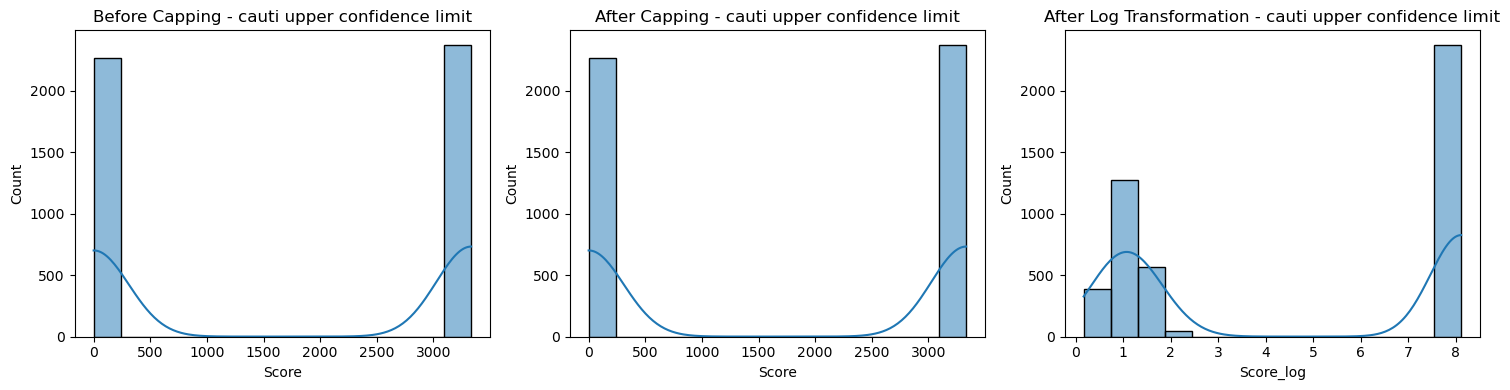

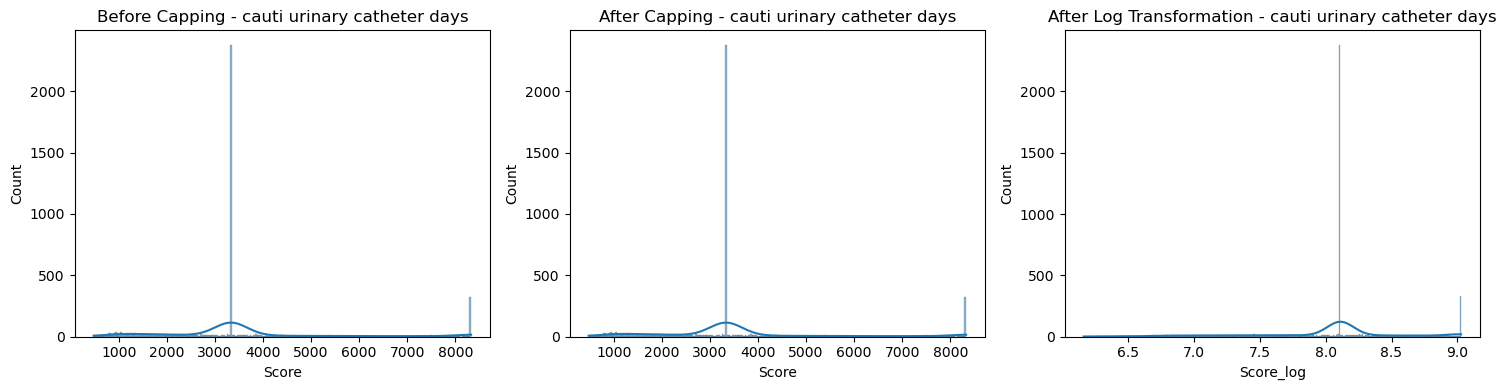

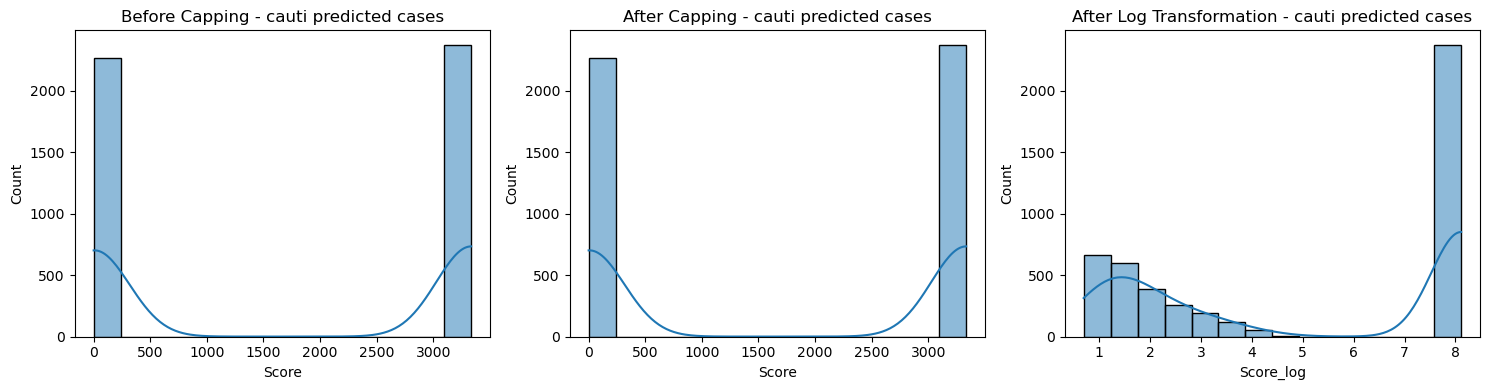

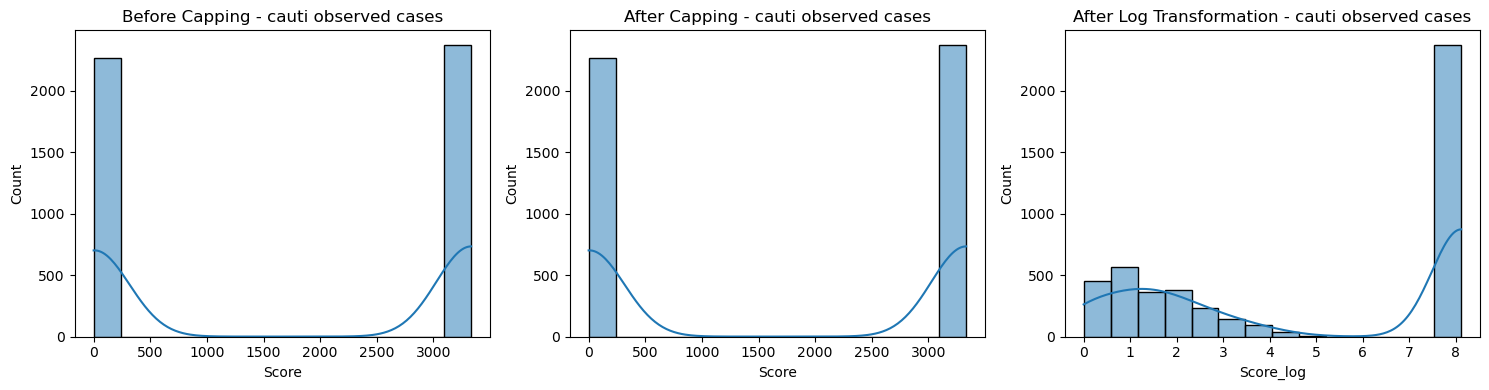

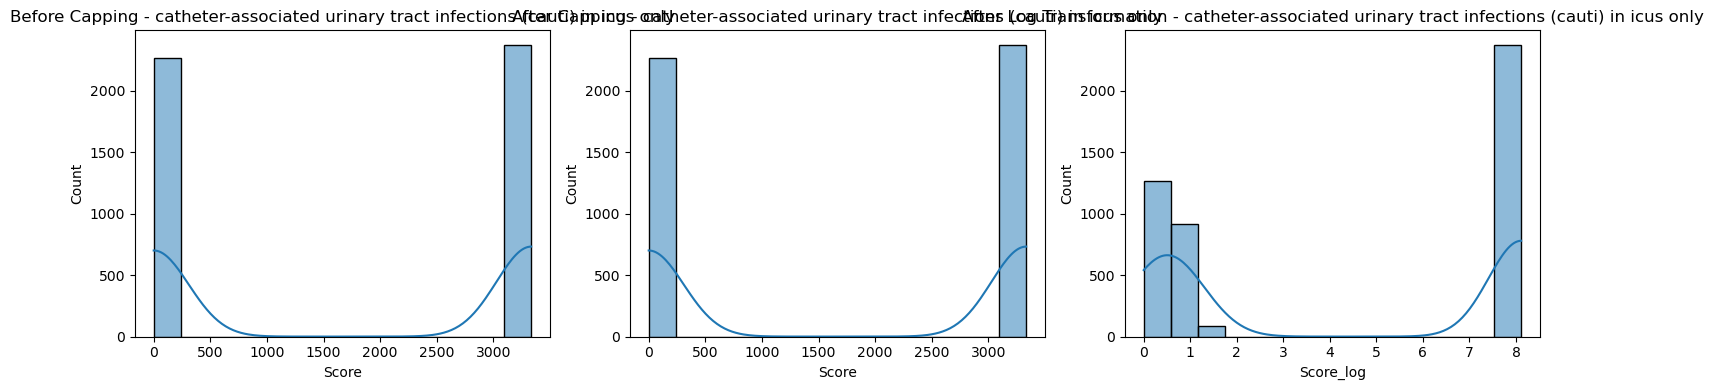

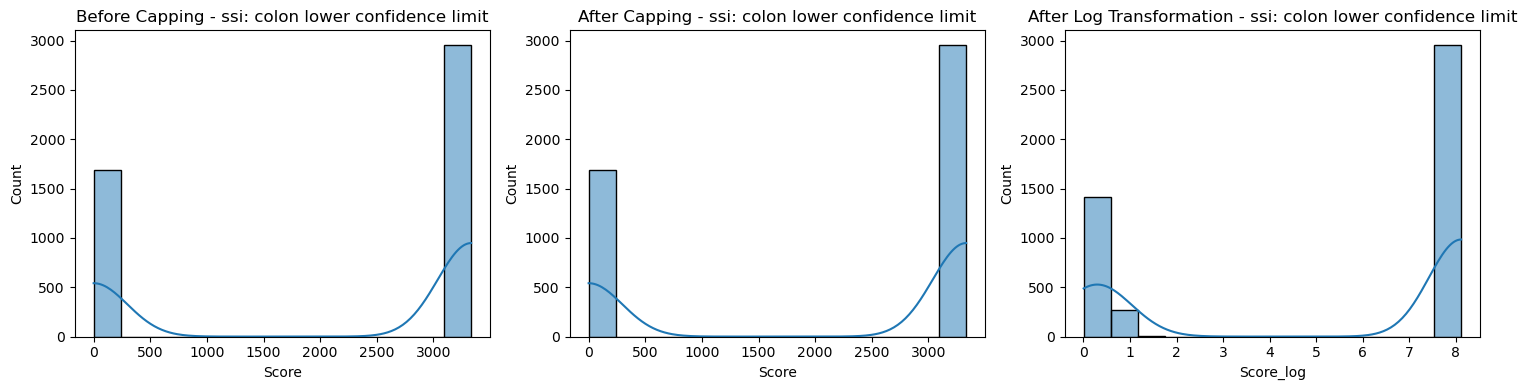

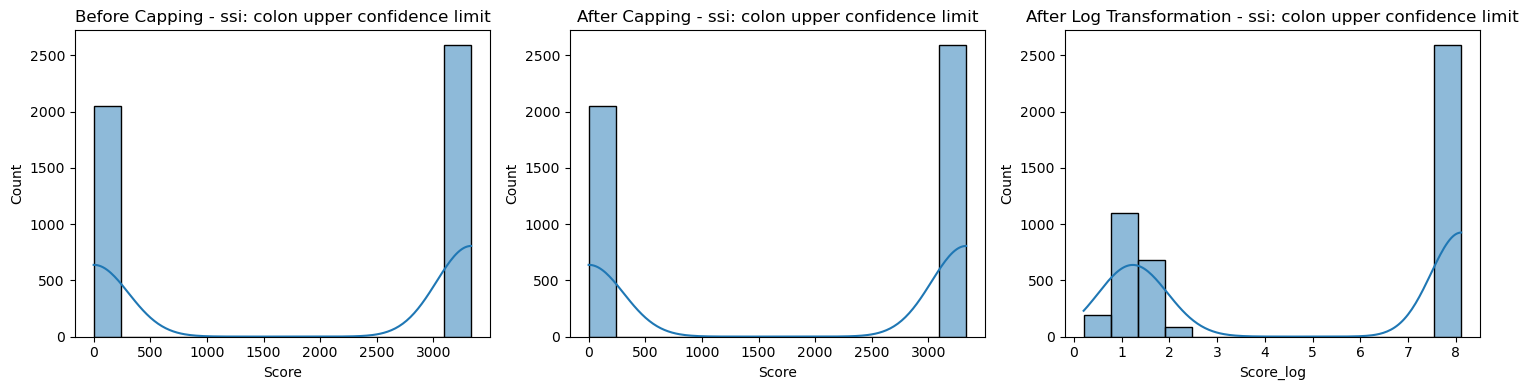

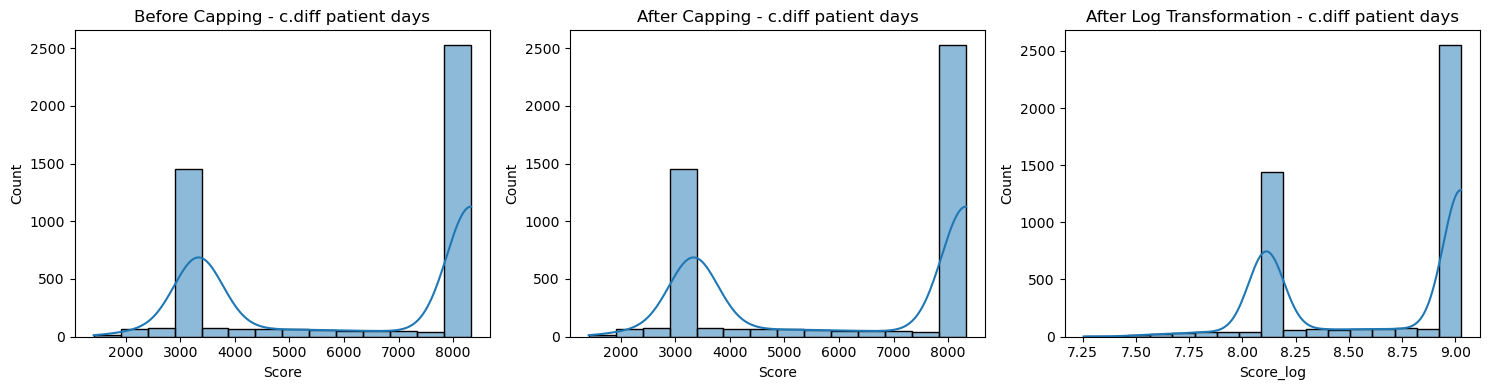

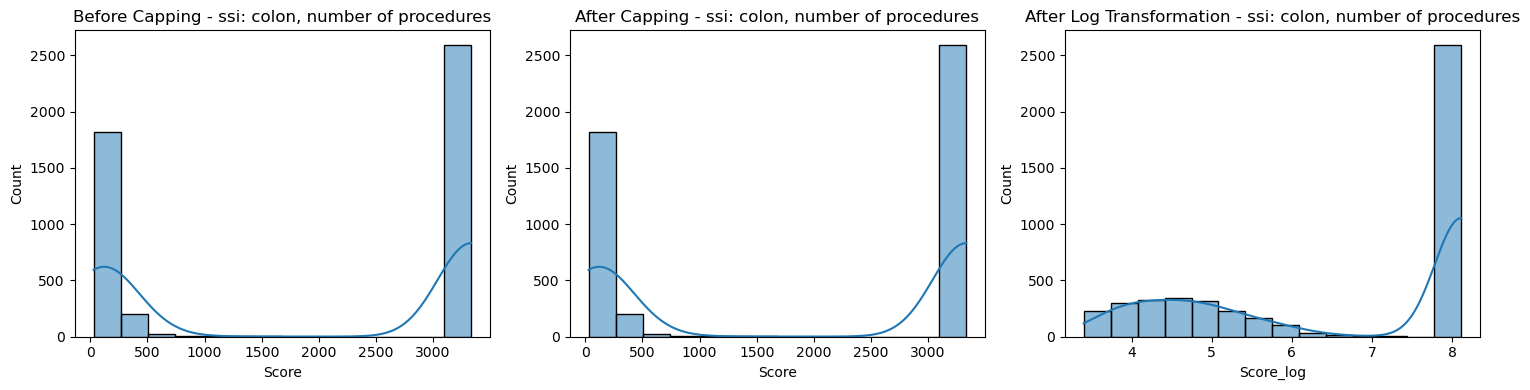

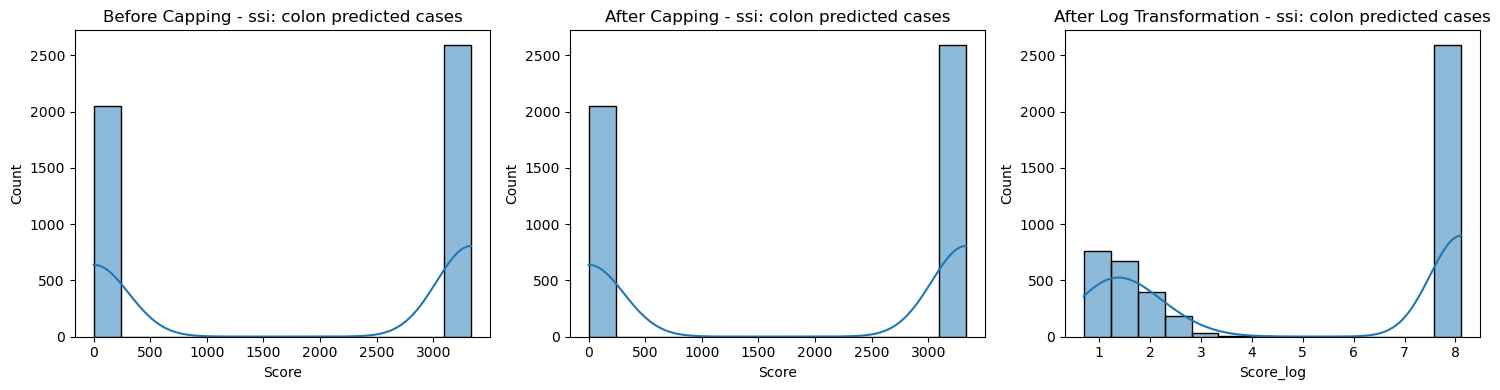

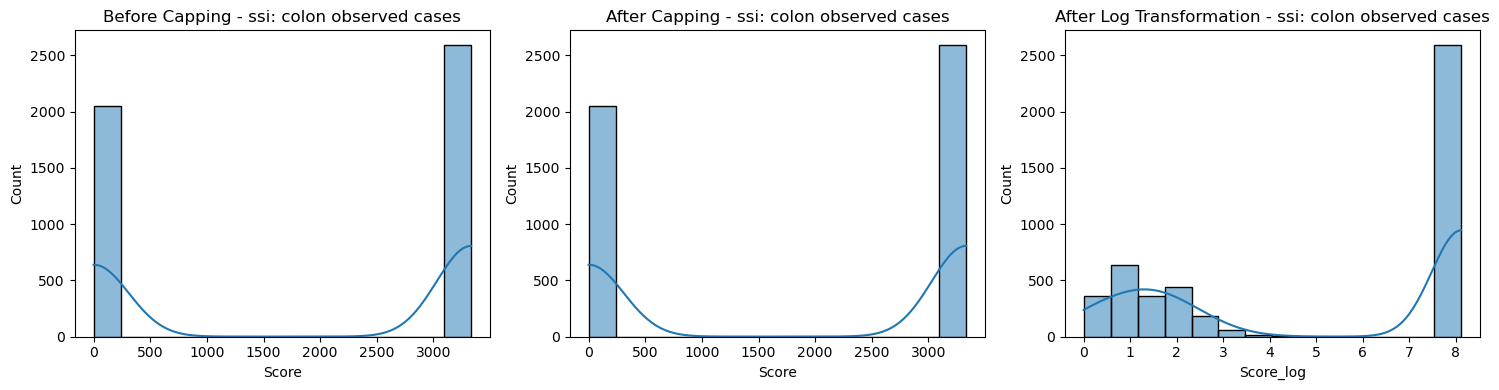

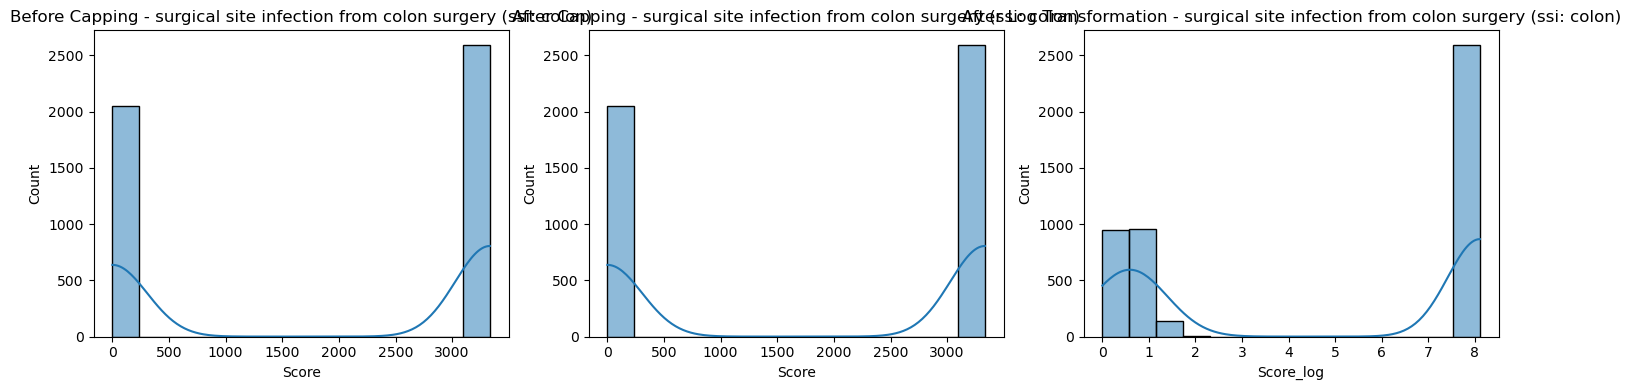

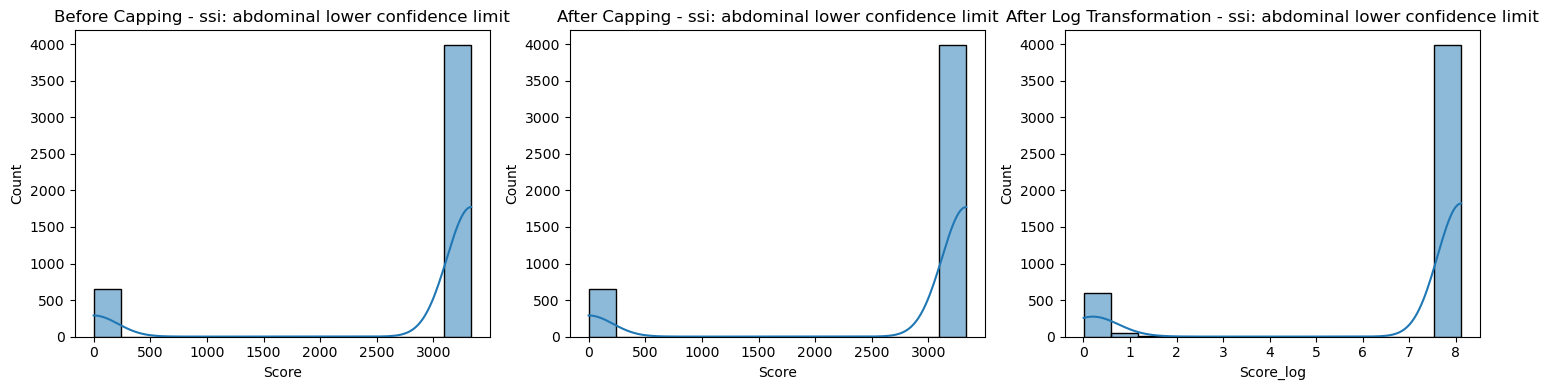

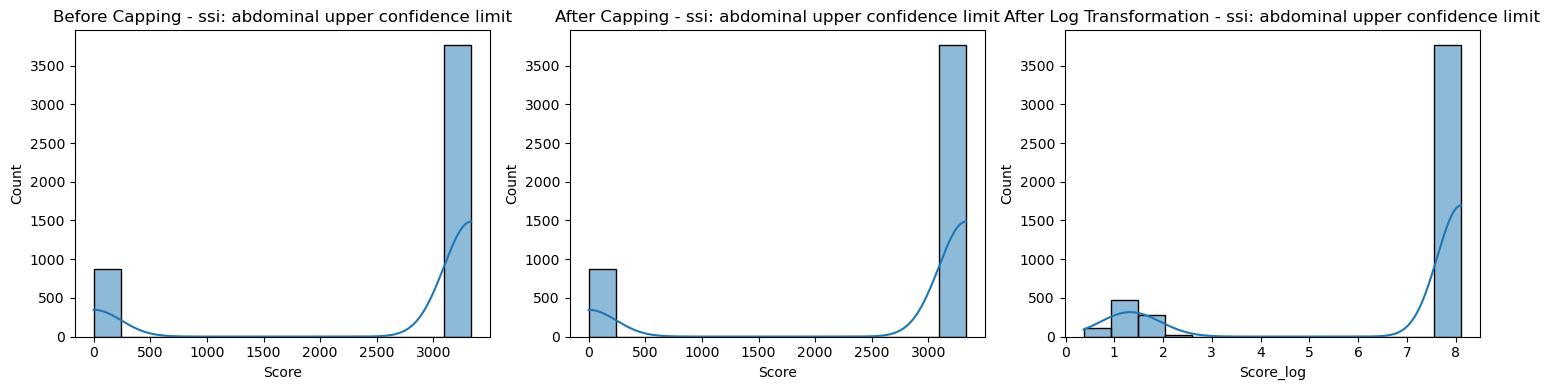

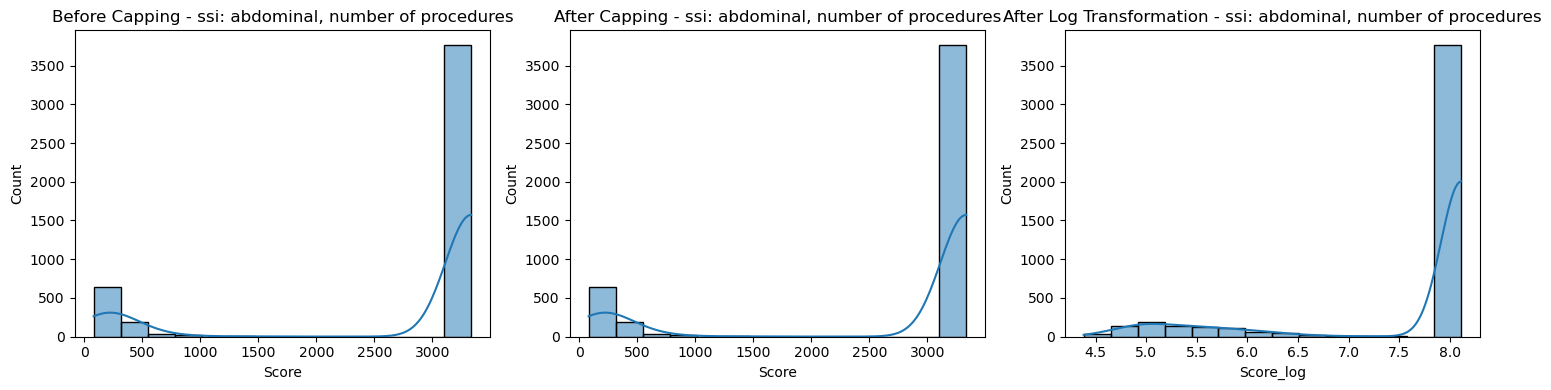

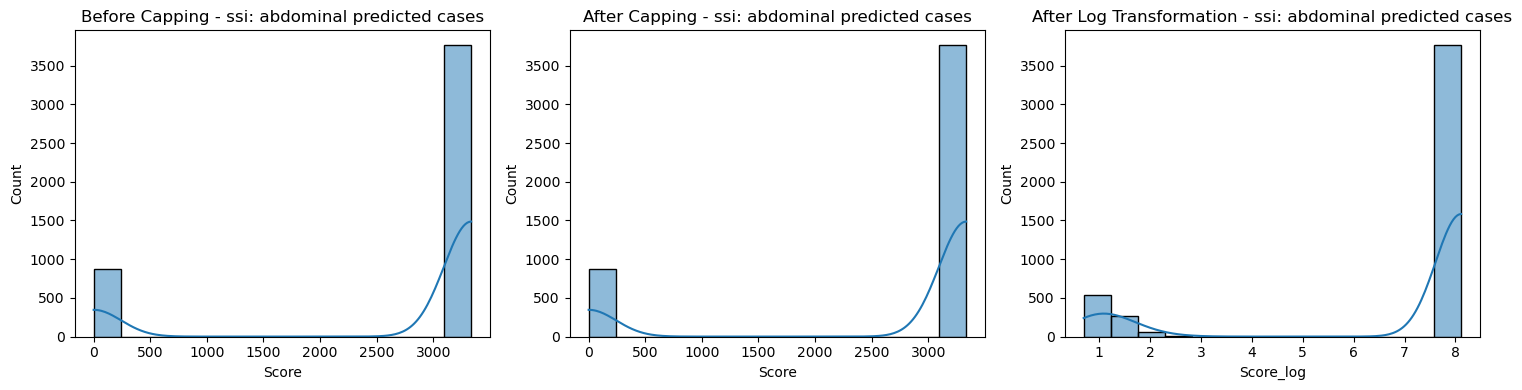

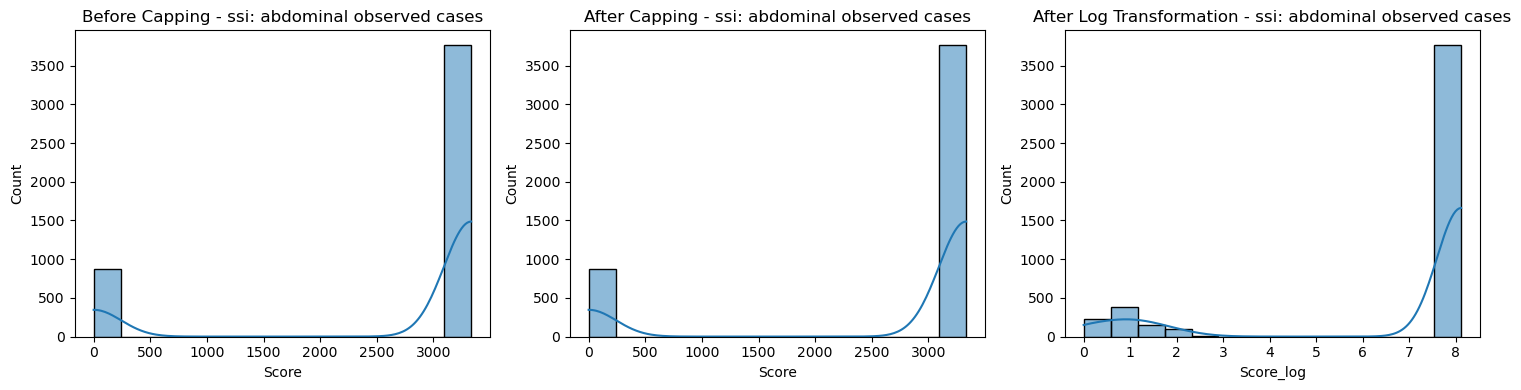

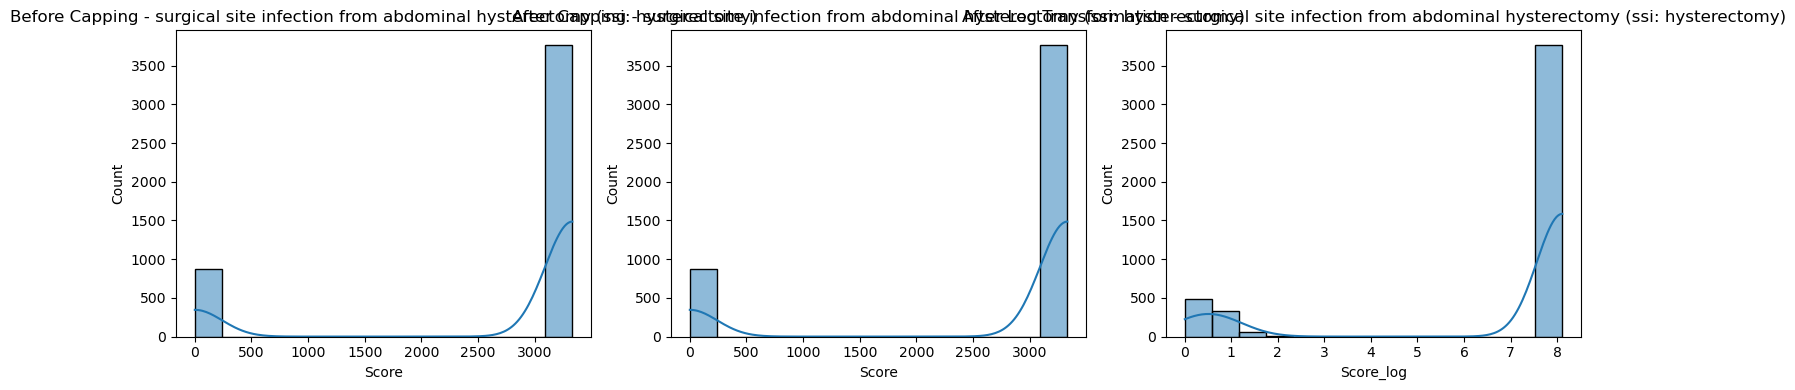

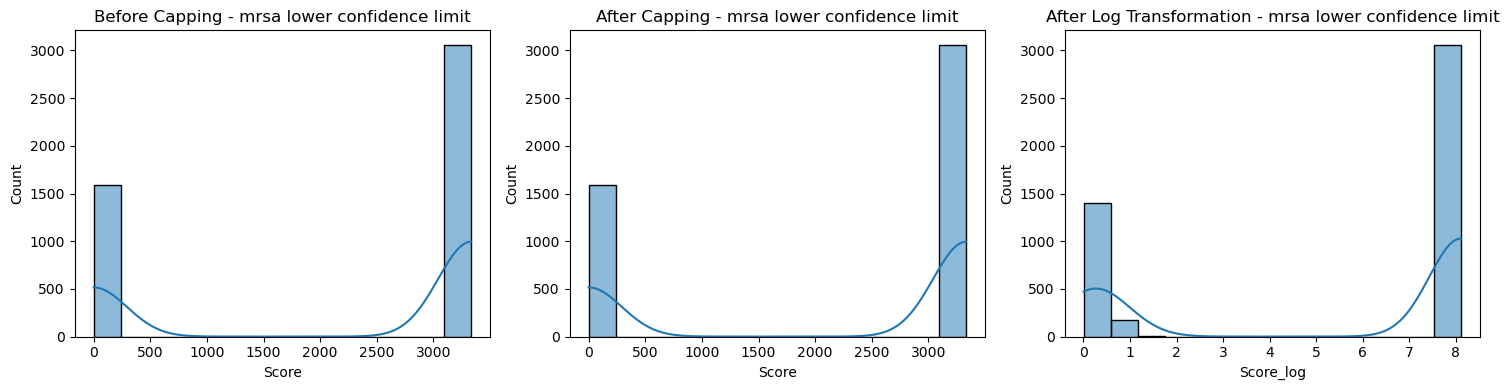

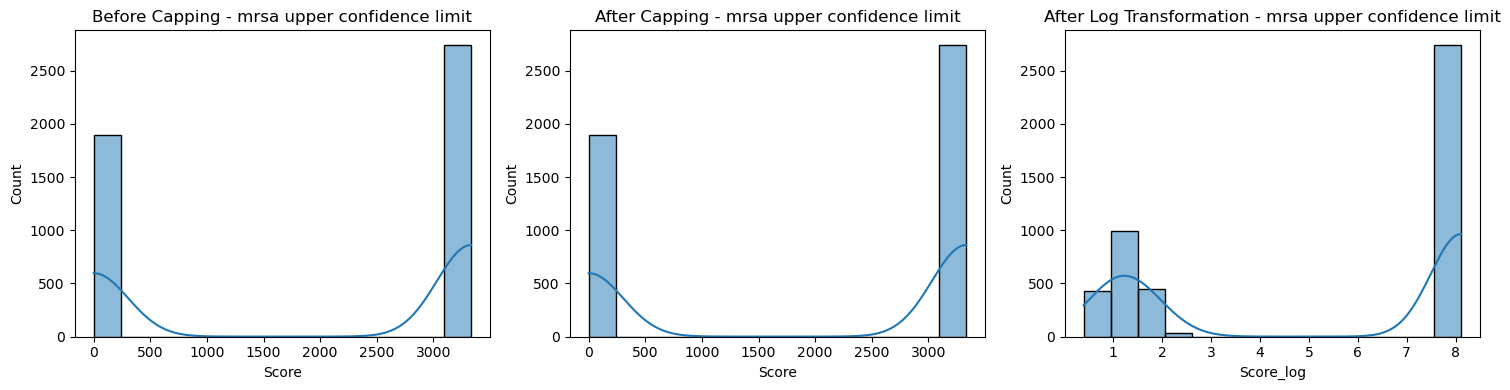

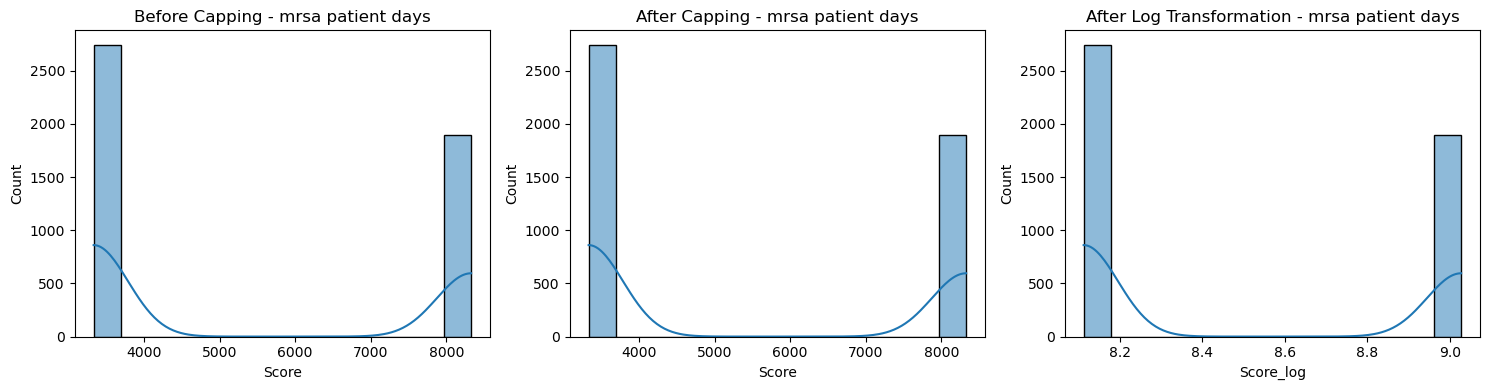

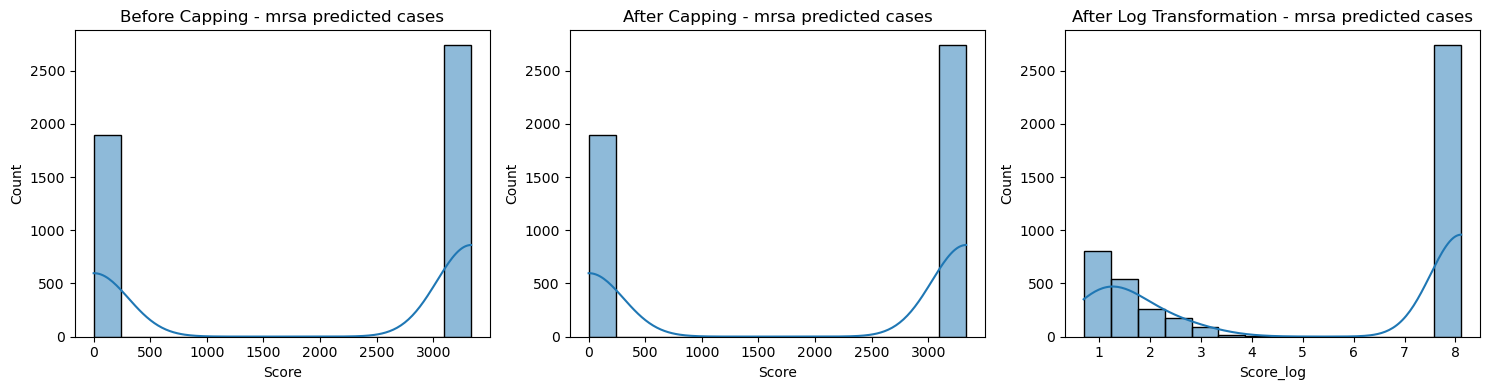

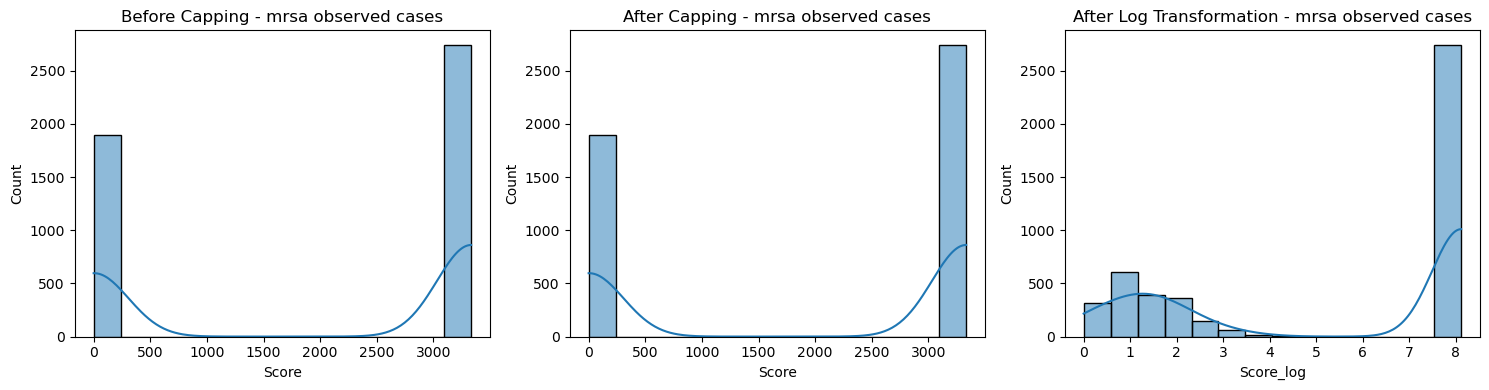

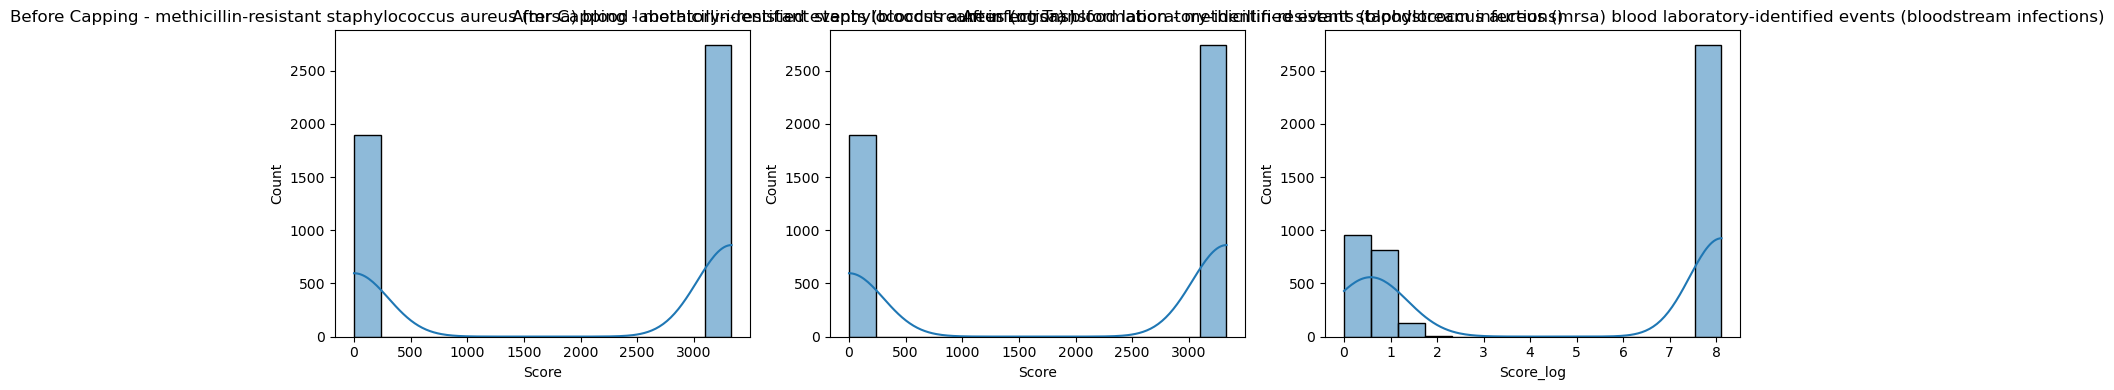

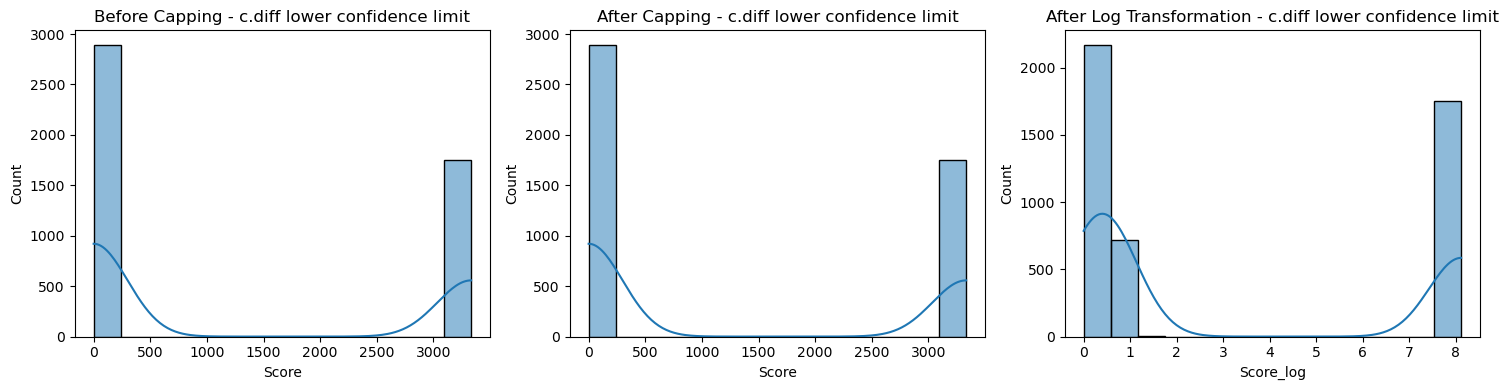

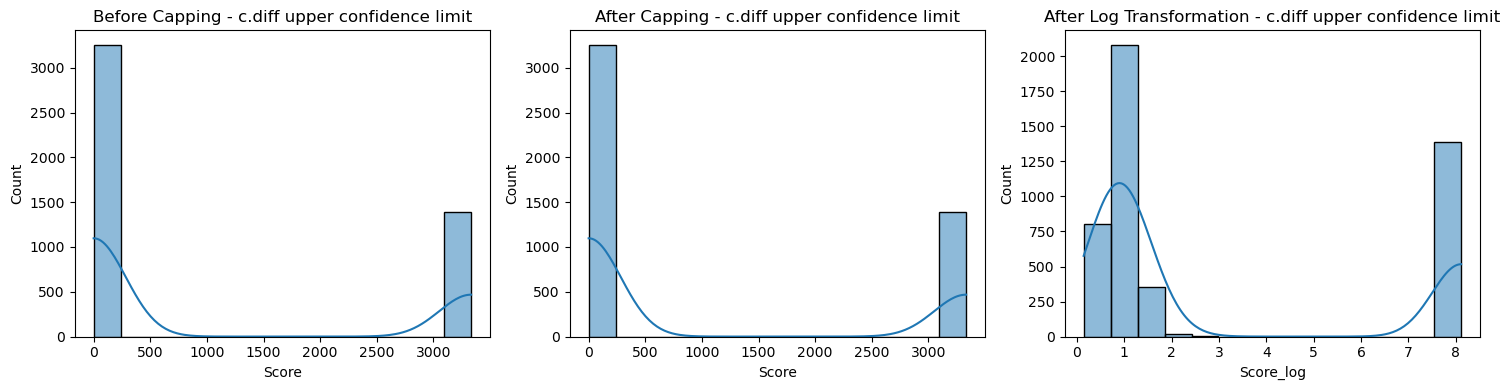

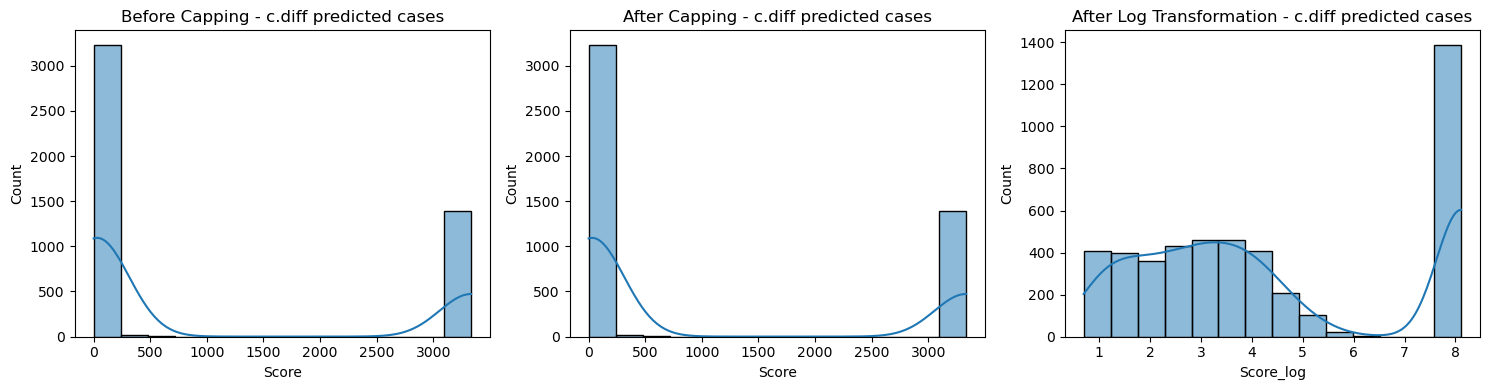

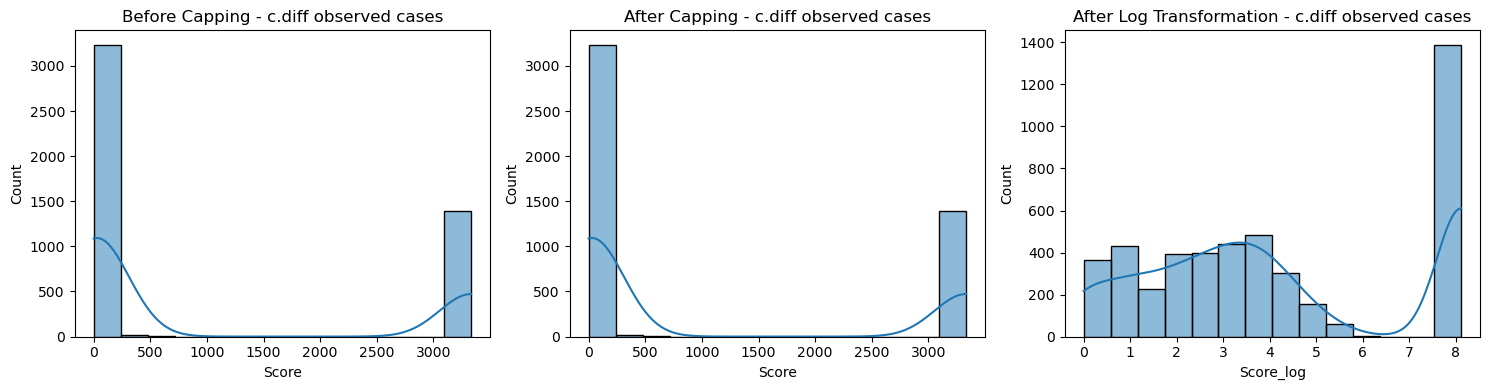

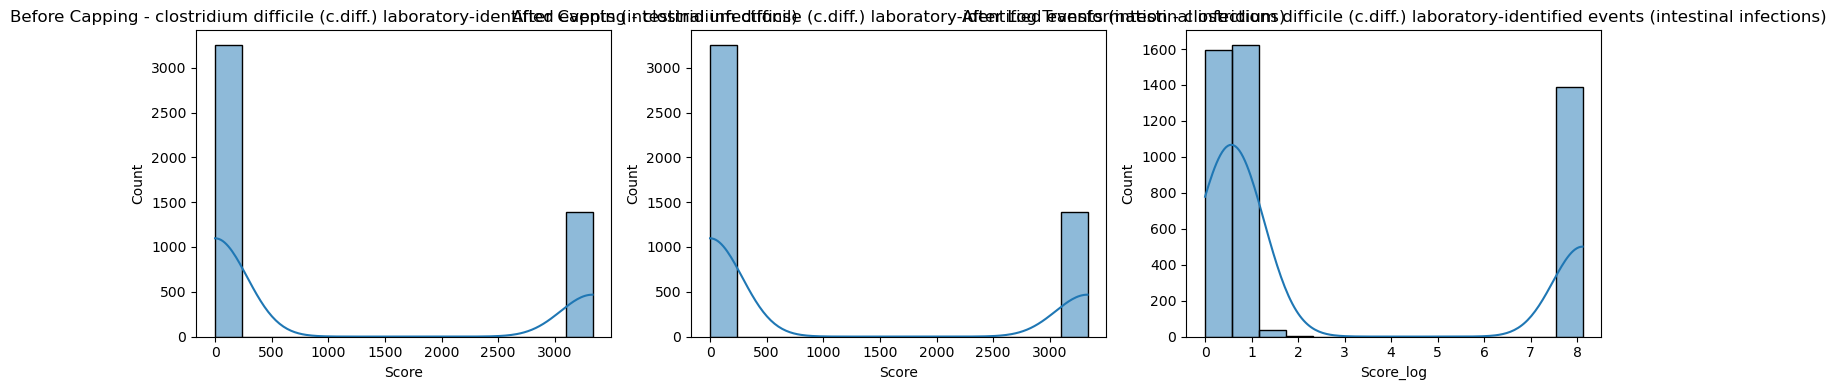

In [191]:
# Plot the distribution of Score before capping, after capping, and after log transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Get all unique measure names
unique_measures = df['Measure Name'].unique()

for measure in unique_measures:
    # Subsets for each stage
    subset_original = df_original[df_original['Measure Name'] == measure]['Score']  # Before capping
    subset_capped = df[df['Measure Name'] == measure]['Score']  # After capping
    subset_log = df[df['Measure Name'] == measure]['Score_log']  # After log transformation
    
    # Plot all in one figure
    plt.figure(figsize=(15,4))
    
    # Original
    plt.subplot(1, 3, 1)
    sns.histplot(subset_original, kde=True)
    plt.title(f'Before Capping - {measure}')
    plt.xlabel('Score')
    
    # After Capping
    plt.subplot(1, 3, 2)
    sns.histplot(subset_capped, kde=True)
    plt.title(f'After Capping - {measure}')
    plt.xlabel('Score')
    
    # After Log Transformation
    plt.subplot(1, 3, 3)
    sns.histplot(subset_log, kde=True)
    plt.title(f'After Log Transformation - {measure}')
    plt.xlabel('Score_log')
    
    plt.tight_layout()
    plt.show()


# Data analysis :

# What is the most frequent 'Measure Name' of infection ?

In [216]:
# Find the most frequent Measure Name and its count
most_common_measure = df['Measure Name'].value_counts().idxmax()
count = df['Measure Name'].value_counts().max()

print(f"The most frequent 'Measure Name' is: {most_common_measure} with {count} occurrences.")

The most frequent 'Measure Name' is: clabsi: lower confidence limit with 4643 occurrences.


# What are the top 10 locations (State and County Name) with this infection ?

In [222]:
# Filter data for the exact disease name
disease_data = df[df['Measure Name'] == 'clabsi: lower confidence limit']

# Group by State and County Name and count occurrences
location_counts = disease_data.groupby(['State', 'County Name']).size().reset_index(name='Count')

# Sort by count descending
location_counts_sorted = location_counts.sort_values(by='Count', ascending=False)

# Show top 10 locations
print(location_counts_sorted.head(10))


     State     County Name  Count
152     ca     los angeles     79
541     il            cook     46
127     az        maricopa     35
2094    tx          harris     35
2063    tx          dallas     27
163     ca          orange     23
2165    tx         tarrant     21
283     fl      miami-dade     19
1735    ok        oklahoma     18
169     ca  san bernardino     18


# Which state has the highest score for each Measure Name ?

In [196]:
# Group by state and get the max score per state
state_max_scores = df.groupby('State')['Score'].max().reset_index()

# Get the state with the highest score overall
top_state = state_max_scores.loc[state_max_scores['Score'].idxmax()]

# Get the row(s) in the original dataframe matching the top state and score
top_state_info = df[(df['State'] == top_state['State']) & (df['Score'] == top_state['Score'])]

# Select relevant columns
top_state_info = top_state_info[['State', 'Score', 'Measure Name']]

print("State with highest score and its Measure Name(s):")
print(top_state_info)


State with highest score and its Measure Name(s):
       State        Score              Measure Name
248       ak  8328.796739  clabsi central line days
278       ak  8328.796739         mrsa patient days
284       ak  8328.796739       c.diff patient days
28635     ak  8328.796739         mrsa patient days
32633     ak  8328.796739       c.diff patient days
72109     ak  8328.796739       c.diff patient days
90299     ak  8328.796739       c.diff patient days
127122    ak  8328.796739       c.diff patient days
193662    ak  8328.796739       c.diff patient days
202457    ak  8328.796739       c.diff patient days
220082    ak  8328.796739       c.diff patient days


# Which state has the highest average score across all measures ?

In [200]:
df.groupby("State")["Score"].mean().sort_values(ascending=False).head(1)

State
mp    3333.035495
Name: Score, dtype: float64

# Which hospitals have the highest infection rate ؟

In [245]:
# Filter rows where 'Measure Name' contains 'observed cases'
infection_df = df[df['Measure Name'].str.contains("observed cases", case=False, na=False)]

# Sort hospitals by infection score in descending order
highest_infection = infection_df.sort_values(by="Score", ascending=False)

# Display top 5 hospitals with the highest infection rates
print(highest_infection[['Hospital Name', 'Score']].head(5))

                                            Hospital Name        Score
111580                        kell west regional hospital  3333.035495
125868                             rice memorial hospital  3333.035495
126021                   stevens community medical center  3333.035495
125997                      niobrara health & life center  3333.035495
125994  lakeside women's hospital, a member of integri...  3333.035495


# Which hospitals performed better than the national benchmark?

In [251]:
# Filter hospitals that performed better than the national benchmark
better_than_national = df[df['Compared to National'].str.contains("Better", case=False, na=False)]

# Display the top 5 results
print(better_than_national[['Hospital Name', 'Compared to National']].head(5))

                    Hospital Name                Compared to National
26  marshall medical center south  better than the national benchmark
43  marshall medical center south  better than the national benchmark
44  marshall medical center south  better than the national benchmark
45  marshall medical center south  better than the national benchmark
46  marshall medical center south  better than the national benchmark


# What is the average infection measurement, in days ?

In [211]:
df['Duration_days'] = (df['Measure End Date'] - df['Measure Start Date']).dt.days

average_days = df['Duration_days'].mean()

print(f"Average duration of measurement period: {average_days:.2f} days")

Average duration of measurement period: 318.00 days


# What is the total number of predicted vs observed infection cases ?

In [254]:
# Filter rows that contain 'predicted cases' or 'observed cases' in Measure Name
predicted_df = df[df['Measure Name'].str.contains("predicted cases", case=False, na=False)]
observed_df = df[df['Measure Name'].str.contains("observed cases", case=False, na=False)]

# Calculate the total sum for each
total_predicted = predicted_df['Score'].sum()
total_observed = observed_df['Score'].sum()

print(f"Total Predicted Cases: {total_predicted}")
print(f"Total Observed Cases: {total_observed}")


Total Predicted Cases: 67641457.99286637
Total Observed Cases: 67604740.17986634


# Which infection measures have the highest variation in scores across hospitals ?.head(10))


In [257]:
# Filter rows with available infection scores
infection_df = df[df['Score'].notna()]

# Calculate standard deviation of scores per infection measure
variation_df = infection_df.groupby('Measure Name')['Score'].std().reset_index()

# Sort measures by variation in descending order
variation_df = variation_df.sort_values(by='Score', ascending=False)

# Display top 10 measures with highest score variation
print(variation_df.head(10))


                                         Measure Name        Score
33                                  mrsa patient days  2456.429478
2                                 c.diff patient days  2401.058784
13                        cauti: number of procedures  1856.168775
11                        cauti urinary catheter days  1828.525151
19                           clabsi central line days  1752.063143
25                       clabsi: number of procedures  1726.548248
6   catheter-associated urinary tract infections (...  1665.897896
10                       cauti upper confidence limit  1665.205673
8                                cauti observed cases  1662.313179
9                               cauti predicted cases  1661.724739


 # What percentage of hospitals are performing “Worse than the National Benchmark  ?

In [262]:
# Calculate the percentage of hospitals performing "Worse than the National Benchmark"
worse_percentage = (df['Compared to National'].eq('Worse than the National Benchmark').sum() / len(df)) * 100

# Display the result with two decimal places
print(f"Percentage of hospitals performing 'Worse than the National Benchmark': {worse_percentage:.2f}%")


Percentage of hospitals performing 'Worse than the National Benchmark': 0.00%


# Deployment

